In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
import os

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.lines as mlines
from scipy.stats import norm
from scipy.stats import skew, kurtosis
from scipy.stats import bootstrap


## Get coverage and width values

### Segmentation

In [2]:
metrics=['iou', 'boundary_iou','assd', 'cldice', 'hd', 'dsc', 'nsd', 'masd', 'hd_perc' ]
stats=['mean', 'median', 'std', 'trimmed_mean', 'iqr_length']
all_values=[]
for metric in metrics:
    print(metric)
    for stat in stats:

        file_path = f"../../données/segmentation/results_metrics_segm/aggregated_results_{metric}_{stat}.csv"
        data = pd.read_csv(file_path)
        n_subset=data['n'].unique()
        tasks=data['subtask'].unique()
 
        algos=data['alg_name'].unique()
        for task in tasks: 
            print(task)
            data_task=data[data['subtask']==task]
            for algo in algos: 
                data_algo=data_task[data_task['alg_name']==algo]
                
                for n in n_subset:  # Show only selected n values
                    data_n = data_algo[data_algo['n'] == n]
                    method_dict = {
                        'Basic': 'contains_true_stat_basic',
                        'bca': 'contains_true_stat_bca',
                        'percentile': 'contains_true_stat_percentile',
                    }

                    # Add parametric methods only for stat == 'mean'
                    if stat == 'mean':
                        method_dict.update({
                            'Parametric z': 'contains_true_stat_param_z',
                            'Parametric t': 'contains_true_stat_param_t'
                        })
                    for method, col in method_dict.items():
                        for val in data_n[col]:
                            
                            all_values.append({
                                'metric': metric,
                                'stat': stat,
                                'task':task, 
                                'algo':algo,
                                'n': n,
                                'method': method,
                                'coverage': val,
                                'x_group': f"{metric}\nn={n}"
                            })

iou
Task01_BrainTumour_L1
Task01_BrainTumour_L2
Task01_BrainTumour_L3
Task03_Liver_L1
Task03_Liver_L2
Task04_Hippocampus_L1
Task04_Hippocampus_L2
Task07_Pancreas_L1
Task07_Pancreas_L2
Task08_HepaticVessel_L1
Task08_HepaticVessel_L2
Task10_Colon_L1
Task01_BrainTumour_L1
Task01_BrainTumour_L2
Task01_BrainTumour_L3
Task03_Liver_L1
Task03_Liver_L2
Task04_Hippocampus_L1
Task04_Hippocampus_L2
Task07_Pancreas_L1
Task07_Pancreas_L2
Task08_HepaticVessel_L1
Task08_HepaticVessel_L2
Task10_Colon_L1
Task01_BrainTumour_L1
Task01_BrainTumour_L2
Task01_BrainTumour_L3
Task03_Liver_L1
Task03_Liver_L2
Task04_Hippocampus_L1
Task04_Hippocampus_L2
Task07_Pancreas_L1
Task07_Pancreas_L2
Task08_HepaticVessel_L1
Task08_HepaticVessel_L2
Task10_Colon_L1
Task01_BrainTumour_L1
Task01_BrainTumour_L2
Task01_BrainTumour_L3
Task03_Liver_L1
Task03_Liver_L2
Task04_Hippocampus_L1
Task04_Hippocampus_L2
Task07_Pancreas_L1
Task07_Pancreas_L2
Task08_HepaticVessel_L1
Task08_HepaticVessel_L2
Task10_Colon_L1
Task01_BrainTumour_L

In [3]:
df_segm=pd.DataFrame(all_values)

In [4]:
metrics=['iou', 'boundary_iou','assd', 'cldice', 'hd', 'dsc', 'nsd', 'masd', 'hd_perc' ]
stats=['mean', 'median', 'std', 'trimmed_mean', 'iqr_length']
all_values_width=[]
for metric in metrics:
    print(metric)
    for stat in stats:

        file_path = f"../../données/segmentation/results_metrics_segm/aggregated_results_{metric}_{stat}.csv"
        data = pd.read_csv(file_path)
        n_subset=data['n'].unique()
        tasks=data['subtask'].unique()
 
        algos=data['alg_name'].unique()
        for task in tasks: 
            print(task)
            data_task=data[data['subtask']==task]
            for algo in algos: 
                data_algo=data_task[data_task['alg_name']==algo]
                
                for n in n_subset:  # Show only selected n values
                    data_n = data_algo[data_algo['n'] == n]
                    method_dict = {
                        'Basic': 'width_basic',
                        'bca': 'width_bca',
                        'percentile': 'width_percentile',
                    }

                    # Add parametric methods only for stat == 'mean'
                    if stat == 'mean':
                        method_dict.update({
                            'Parametric z': 'width_param_z',
                            'Parametric t': 'width_param_t'
                        })
                    for method, col in method_dict.items():
                        for val in data_n[col]:
                            
                            all_values_width.append({
                                'metric': metric,
                                'stat': stat,
                                'task':task, 
                                'algo':algo,
                                'n': n,
                                'method': method,
                                'width': val,
                                'x_group': f"{metric}\nn={n}"
                            })

iou
Task01_BrainTumour_L1
Task01_BrainTumour_L2
Task01_BrainTumour_L3
Task03_Liver_L1
Task03_Liver_L2
Task04_Hippocampus_L1
Task04_Hippocampus_L2
Task07_Pancreas_L1
Task07_Pancreas_L2
Task08_HepaticVessel_L1
Task08_HepaticVessel_L2
Task10_Colon_L1
Task01_BrainTumour_L1
Task01_BrainTumour_L2
Task01_BrainTumour_L3
Task03_Liver_L1
Task03_Liver_L2
Task04_Hippocampus_L1
Task04_Hippocampus_L2
Task07_Pancreas_L1
Task07_Pancreas_L2
Task08_HepaticVessel_L1
Task08_HepaticVessel_L2
Task10_Colon_L1
Task01_BrainTumour_L1
Task01_BrainTumour_L2
Task01_BrainTumour_L3
Task03_Liver_L1
Task03_Liver_L2
Task04_Hippocampus_L1
Task04_Hippocampus_L2
Task07_Pancreas_L1
Task07_Pancreas_L2
Task08_HepaticVessel_L1
Task08_HepaticVessel_L2
Task10_Colon_L1
Task01_BrainTumour_L1
Task01_BrainTumour_L2
Task01_BrainTumour_L3
Task03_Liver_L1
Task03_Liver_L2
Task04_Hippocampus_L1
Task04_Hippocampus_L2
Task07_Pancreas_L1
Task07_Pancreas_L2
Task08_HepaticVessel_L1
Task08_HepaticVessel_L2
Task10_Colon_L1
Task01_BrainTumour_L

In [5]:
df_segm_width=pd.DataFrame(all_values_width)

 ### Classification micro

In [6]:

stats=['accuracy', 'ap', 'auc', 'f1_score']
all_values_micro=[]

for stat in stats:
    file_path = f"../../données/classif/results_metrics_classif/aggregated_results_{stat}.csv"
    data = pd.read_csv(file_path)
    
    n_subset=data['n'].unique()
    tasks=data['subtask'].unique()
    algos=data['alg_name'].unique()
    for task in tasks: 
        data_task=data[data['subtask']==task]
        for algo in algos: 
            data_algo=data_task[data_task['alg_name']==algo]
            for n in n_subset:  # Show only selected n values
                data_n = data_algo[data_algo['n'] == n]
      
                method_dict = {
                    'Basic': 'contains_true_stat_basic',
                    'bca': 'contains_true_stat_bca',
                    'percentile': 'contains_true_stat_percentile',
                }

                # Add parametric methods only for stat == 'mean'
                if stat == 'accuracy':
                    method_dict.update({
                        'agresti_coull':'contains_true_stat_agresti_coull',
                        'wilson':'contains_true_stat_wilson',
                        'exact':'contains_true_stat_exact',
                        'wald': 'contains_true_stat_wald'
                    })
                for method, col in method_dict.items():
                    for val in data_n[col]:
                        all_values_micro.append({
                            'subtask':task, 
                            'algo':algo,
                            'stat': stat,
                            'n': n,
                            'method': method,
                            'value': val,
                        
                            'x_group': f"n={n}"
                        })

In [7]:
df_micro=pd.DataFrame(all_values_micro)

In [8]:

stats=['accuracy', 'ap', 'auc', 'f1_score']
all_values_micro=[]

for stat in stats:
    file_path = f"../../données/classif/results_metrics_classif/aggregated_results_{stat}.csv"
    data = pd.read_csv(file_path)
    
    n_subset=data['n'].unique()
    tasks=data['subtask'].unique()
    algos=data['alg_name'].unique()
    for task in tasks: 
        data_task=data[data['subtask']==task]
        for algo in algos: 
            data_algo=data_task[data_task['alg_name']==algo]
            for n in n_subset:  # Show only selected n values
                data_n = data_algo[data_algo['n'] == n]
      
                method_dict = {
                    'Basic': 'width_basic',
                    'bca': 'width_bca',
                    'percentile': 'width_percentile',
                }

                # Add parametric methods only for stat == 'mean'
                if stat == 'accuracy':
                    method_dict.update({
                        'agresti_coull':'width_agresti_coull',
                        'wilson':'width_wilson',
                        'exact':'width_exact',
                        'wald': 'width_wald'
                    })
                for method, col in method_dict.items():
                    for val in data_n[col]:
                        all_values_micro.append({
                            'subtask':task, 
                            'algo':algo,
                            'stat': stat,
                            'n': n,
                            'method': method,
                            'width': val,
                        
                            'x_group': f"n={n}"
                        })

In [9]:
df_micro_width=pd.DataFrame(all_values_micro)

### classification macro

In [10]:

stats=['balanced_accuracy', 'ap', 'auc', 'f1_score']
all_values_macro=[]

for stat in stats:
    file_path = f"../../données/classif/results_metrics_macro/aggregated_results_{stat}.csv"
    data = pd.read_csv(file_path)
    
    n_subset=data['n'].unique()
    tasks=data['subtask'].unique()
    algos=data['alg_name'].unique()
    for task in tasks: 
        data_task=data[data['subtask']==task]
        for algo in algos: 
            data_algo=data_task[data_task['alg_name']==algo]
            for n in n_subset:  # Show only selected n values
                data_n = data_algo[data_algo['n'] == n]
      
                method_dict = {
                    'Basic': 'contains_true_stat_basic',
                    'bca': 'contains_true_stat_bca',
                    'percentile': 'contains_true_stat_percentile',
                }

                # Add parametric methods only for stat == 'mean'
                if stat == 'accuracy':
                    method_dict.update({
                        'agresti_coull':'contains_true_stat_agresti_coull',
                        'wilson':'contains_true_stat_wilson',
                        'exact':'contains_true_stat_exact',
                        'wald': 'contains_true_stat_wald'
                    })
                for method, col in method_dict.items():
                    for val in data_n[col]:
                        all_values_macro.append({
                            'subtask':task, 
                            'algo':algo,
                            'stat': stat,
                            'n': n,
                            'method': method,
                            'value': val,
                        
                            'x_group': f"n={n}"
                        })

In [11]:
df_macro=pd.DataFrame(all_values_macro)

In [12]:

stats=['balanced_accuracy', 'ap', 'auc', 'f1_score']
all_values_macro=[]

for stat in stats:
    file_path = f"../../données/classif/results_metrics_macro/aggregated_results_{stat}.csv"
    data = pd.read_csv(file_path)
    
    n_subset=data['n'].unique()
    tasks=data['subtask'].unique()
    algos=data['alg_name'].unique()
    for task in tasks: 
        data_task=data[data['subtask']==task]
        for algo in algos: 
            data_algo=data_task[data_task['alg_name']==algo]
            for n in n_subset:  # Show only selected n values
                data_n = data_algo[data_algo['n'] == n]
      
                method_dict = {
                    'Basic': 'width_basic',
                    'bca': 'width_bca',
                    'percentile': 'width_percentile',
                }

                # Add parametric methods only for stat == 'mean'
                if stat == 'accuracy':
                    method_dict.update({
                        'agresti_coull':'width_agresti_coull',
                        'wilson':'width_wilson',
                        'exact':'width_exact',
                        'wald': 'width_wald'
                    })
                for method, col in method_dict.items():
                    for val in data_n[col]:
                        all_values_macro.append({
                            'subtask':task, 
                            'algo':algo,
                            'stat': stat,
                            'n': n,
                            'method': method,
                            'width': val,
                        
                            'x_group': f"n={n}"
                        })

In [13]:
df_macro_width=pd.DataFrame(all_values_macro)

## Message 1: Impact of metrics

In [14]:
metric_order =['dsc', 'iou', 'nsd', 'boundary_iou', 'cldice', 'assd', 'masd', 'hd', 'hd_perc' ]


### Use hierarchical bootstrap for 1 level: tasks

In [44]:


def bootstrap_hierarchique_one_level(df, n_iterations, score, level_name):
  
   
    bootstrap_samples = []
    
    
    levels = df[level_name].unique()
    
    
    for _ in range(n_iterations):
       
        bootstrap_data = []
        
        sampled_level_1 = np.random.choice(levels, size=len(levels), replace=True)
        
      
        for level in sampled_level_1:
            
            level_data = df[df[level_name] == level]
            
            
            sampled_dsc = np.random.choice(level_data[score].values, size=len(level_data[score]), replace=True)
            
           
            bootstrap_data.extend(sampled_dsc)
        
       
        bootstrap_sample = pd.DataFrame({score: bootstrap_data})
        
       
        bootstrap_samples.append(np.median(bootstrap_sample))
    CI_lower=np.percentile(bootstrap_samples, 25)
    CI_upper=np.percentile(bootstrap_samples, 75)
    return CI_lower, CI_upper


### Compute median coverage across instances and its CI

In [48]:
all_metrics = df_segm['metric'].unique()
CIs=[]

for n in df_segm['n'].unique():
    data_n=df_segm[df_segm['n']==n]
    for method in data_n['method'].unique():

        data_method=data_n[data_n['method']==method]
    
        for metric in data_method['metric'].unique():
            data_metric=data_method[data_method['metric']==metric]
            for stat in data_metric['stat'].unique():
                data_stat=data_metric[data_metric['stat']==stat]
        
                median_cov=np.median(data_stat['coverage'])
                CI=bootstrap_hierarchique_one_level(df=data_stat, n_iterations=999, score='coverage', level_name='task')
                print(median_cov, CI)
                CIs.append({'method':method, 
                                'n':n, 
                                'median':median_cov,
                                'upper_bound':CI[1],
                                'lower_bound':CI[0],
                                'metric':metric,
                                'stat':stat})
        

0.87985 (np.float64(0.8769), np.float64(0.8816))
0.78285 (np.float64(0.7565500000000001), np.float64(0.7956000000000001))
0.7911 (np.float64(0.7781), np.float64(0.8055))
0.8471 (np.float64(0.817025), np.float64(0.870975))
0.76125 (np.float64(0.7516), np.float64(0.76585))
0.88565 (np.float64(0.883), np.float64(0.8882))
0.78615 (np.float64(0.764175), np.float64(0.7966))
0.8121 (np.float64(0.8048), np.float64(0.8183))
0.85055 (np.float64(0.81705), np.float64(0.8702))
0.7651 (np.float64(0.7569), np.float64(0.7723))
0.774 (np.float64(0.7573), np.float64(0.7868))
0.8212 (np.float64(0.8132), np.float64(0.8261000000000001))
0.5375 (np.float64(0.513725), np.float64(0.5647))
0.8774 (np.float64(0.8729), np.float64(0.880525))
0.7305 (np.float64(0.7192), np.float64(0.743475))
0.87235 (np.float64(0.8705), np.float64(0.8771500000000001))
0.7618 (np.float64(0.743), np.float64(0.7962))
0.75465 (np.float64(0.7448), np.float64(0.778))
0.85615 (np.float64(0.8319249999999999), np.float64(0.8717999999999999

In [49]:
CI_segm=pd.DataFrame(CIs)
CI_segm

method      n   median  upper_bound  lower_bound   metric  \
0            Basic   10.0  0.87985     0.881600     0.876900      iou   
1            Basic   10.0  0.78285     0.795600     0.756550      iou   
2            Basic   10.0  0.79110     0.805500     0.778100      iou   
3            Basic   10.0  0.84710     0.870975     0.817025      iou   
4            Basic   10.0  0.76125     0.765850     0.751600      iou   
...            ...    ...      ...          ...          ...      ...   
1372  Parametric t  250.0  0.94700     0.947600     0.946700       hd   
1373  Parametric t  250.0  0.94840     0.948750     0.948100      dsc   
1374  Parametric t  250.0  0.94740     0.947700     0.947000      nsd   
1375  Parametric t  250.0  0.94320     0.944200     0.942050     masd   
1376  Parametric t  250.0  0.94560     0.946300     0.945000  hd_perc   

              stat  
0             mean  
1           median  
2              std  
3     trimmed_mean  
4       iqr_length  
...            ...  
1372          mean  
1373          mean  
1374          mean  
1375          mean  
1376          mean  

[1377 rows x 7 columns]

### Same for median width

In [51]:
all_metrics = df_segm_width['metric'].unique()
CIs_width=[]

for n in df_segm_width['n'].unique():
    print(n)
    data_n=df_segm_width[df_segm_width['n']==n]
    for method in data_n['method'].unique():

        data_method=data_n[data_n['method']==method]
    
        for metric in data_method['metric'].unique():
            data_metric=data_method[data_method['metric']==metric]
            for stat in data_metric['stat'].unique():
                data_stat=data_metric[data_metric['stat']==stat]

                median_w=np.median(data_stat['width'])
                CI=bootstrap_hierarchique_one_level(df=data_stat, n_iterations=999, score='width', level_name='task')
                
                CIs_width.append({'method':method, 
                                'n':n, 
                                'median_width':median_w,
                                'upper_bound':CI[1],
                                'lower_bound':CI[0],
                                'metric':metric,
                                'stat':stat})
        

10.0
25.0
50.0
75.0
100.0
125.0
150.0
200.0
250.0


In [52]:
CI_segm_width=pd.DataFrame(CIs_width)
CI_segm_width

method      n  median_width  upper_bound  lower_bound   metric  \
0            Basic   10.0      0.199588     0.245192     0.152436      iou   
1            Basic   10.0      0.250505     0.319282     0.192997      iou   
2            Basic   10.0      0.145617     0.159641     0.109307      iou   
3            Basic   10.0      0.228462     0.279705     0.173165      iou   
4            Basic   10.0      0.398785     0.450194     0.274894      iou   
...            ...    ...           ...          ...          ...      ...   
1372  Parametric t  250.0      6.892549     7.890532     6.190957       hd   
1373  Parametric t  250.0      0.052980     0.057537     0.038032      dsc   
1374  Parametric t  250.0      0.051405     0.062550     0.040358      nsd   
1375  Parametric t  250.0      1.181144     1.670617     0.945781     masd   
1376  Parametric t  250.0      5.097782     5.933442     4.527866  hd_perc   

              stat  
0             mean  
1           median  
2              std  
3     trimmed_mean  
4       iqr_length  
...            ...  
1372          mean  
1373          mean  
1374          mean  
1375          mean  
1376          mean  

[1377 rows x 7 columns]

### Plot of median coverage by metric width CIs

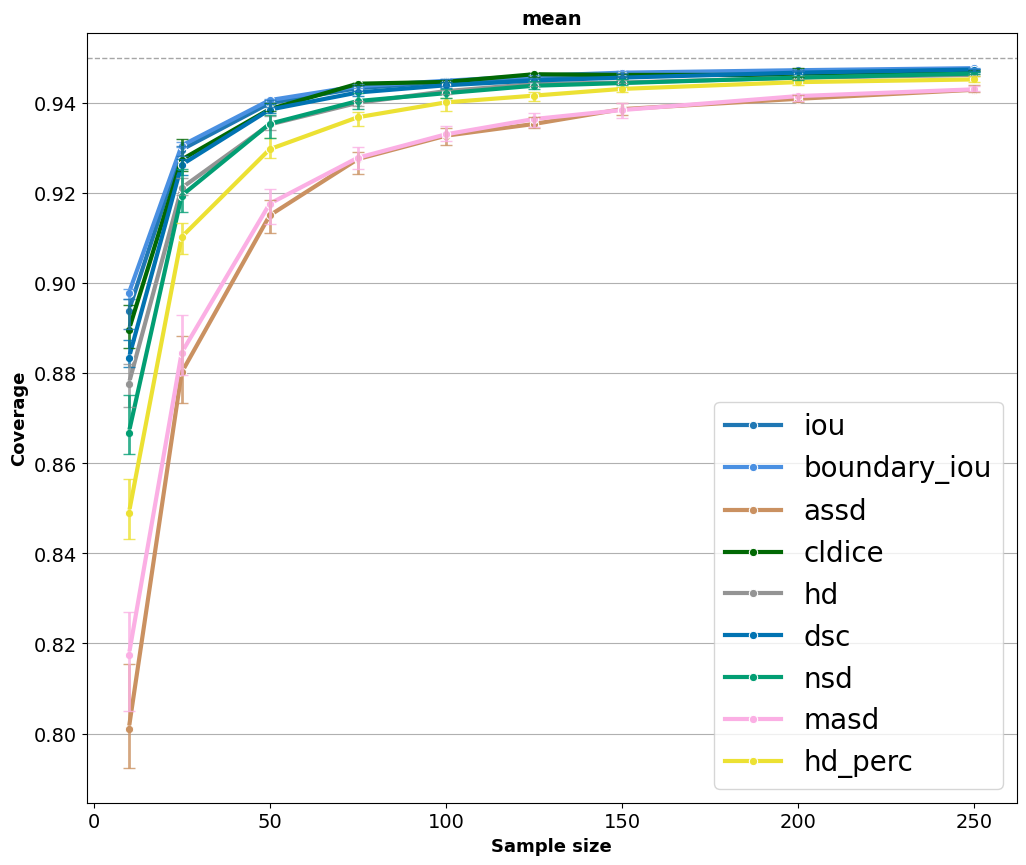

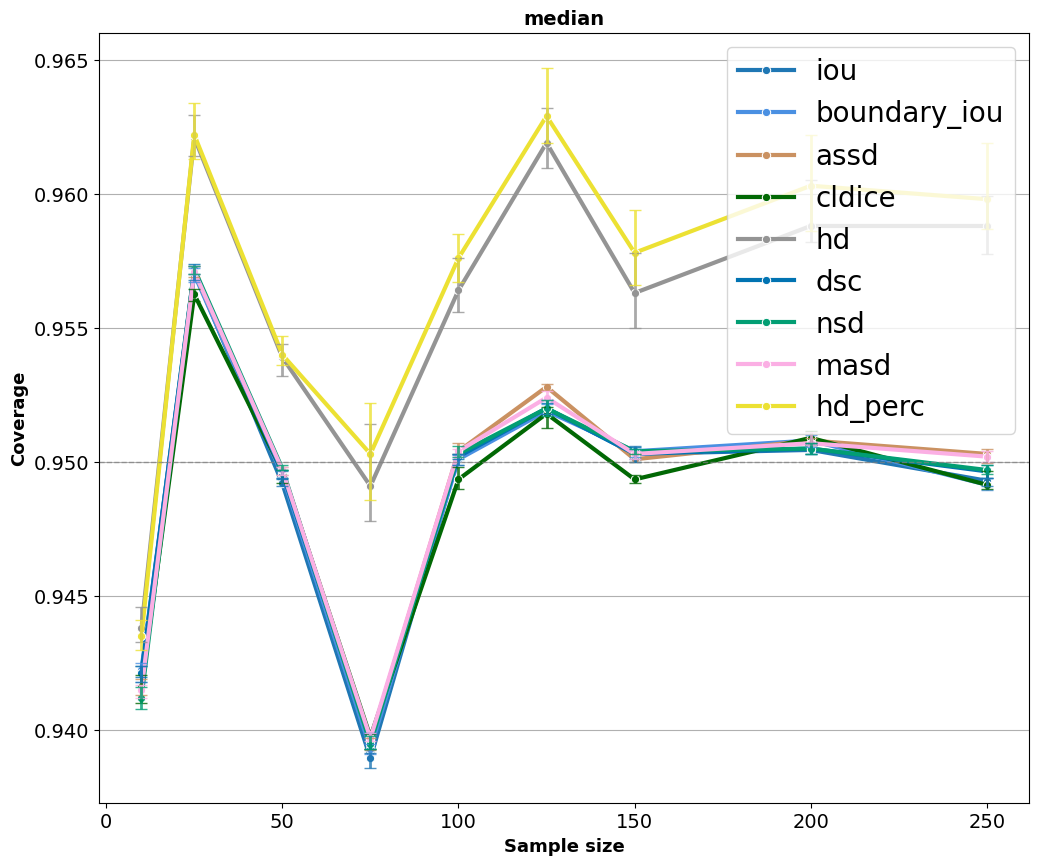

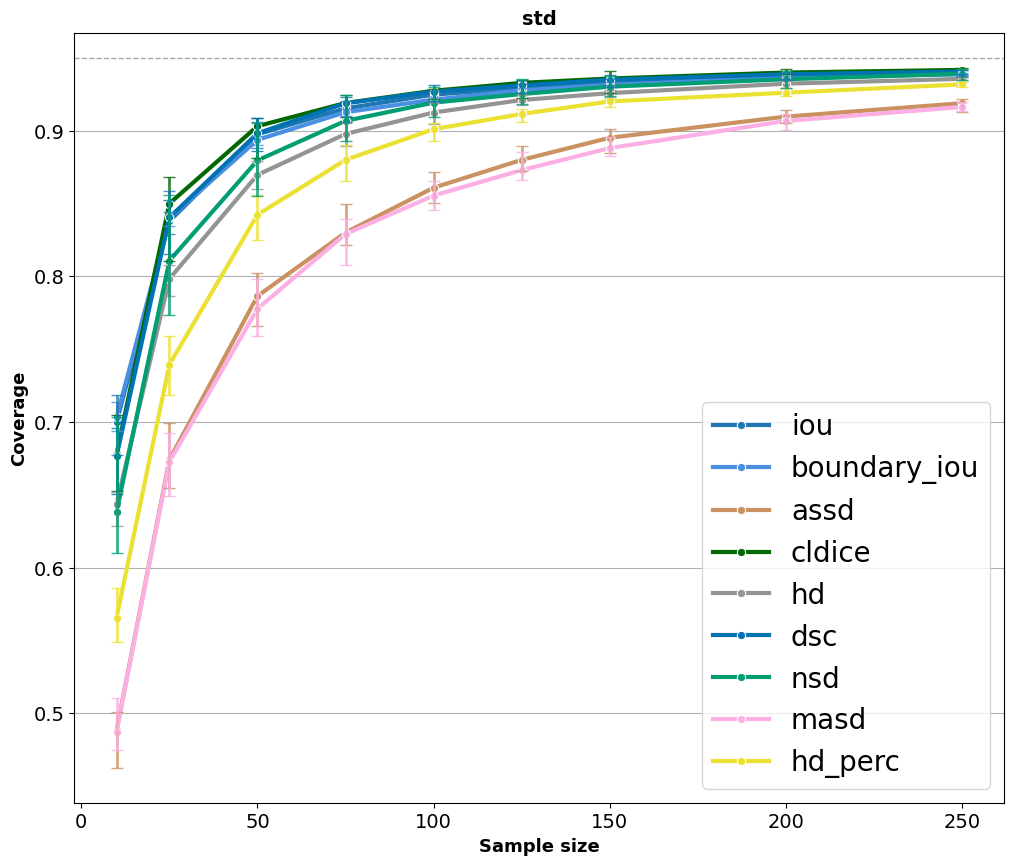

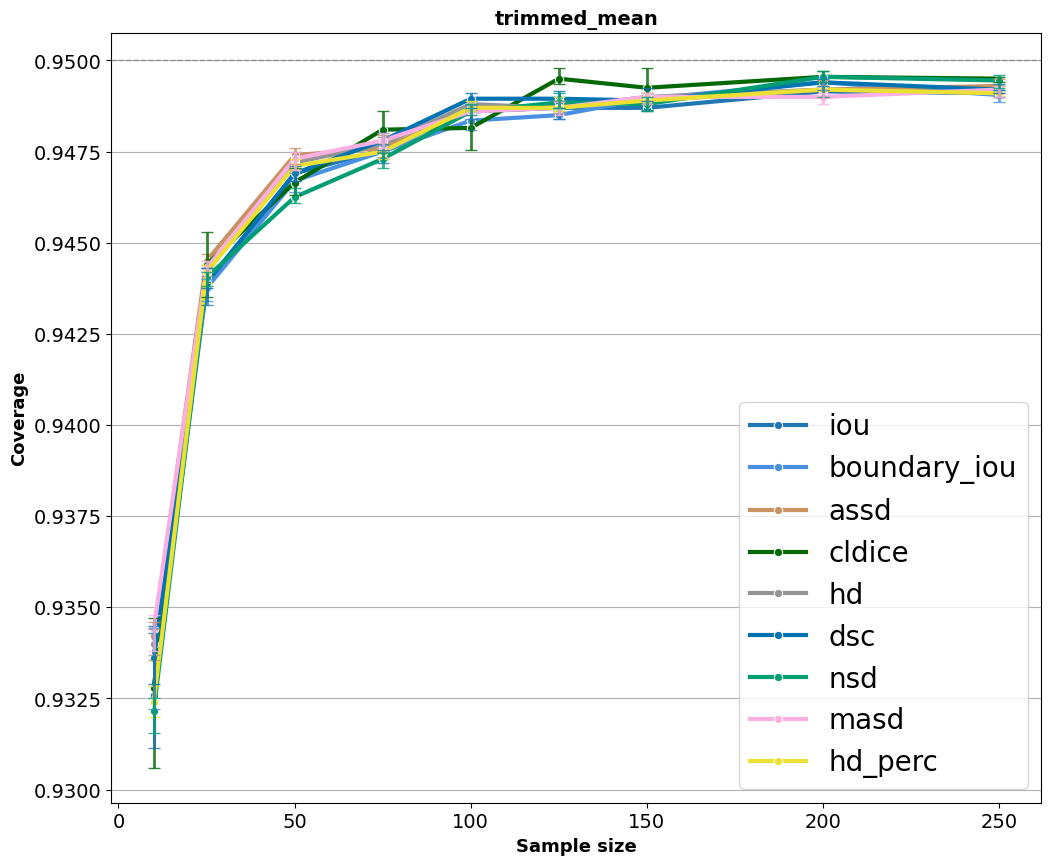

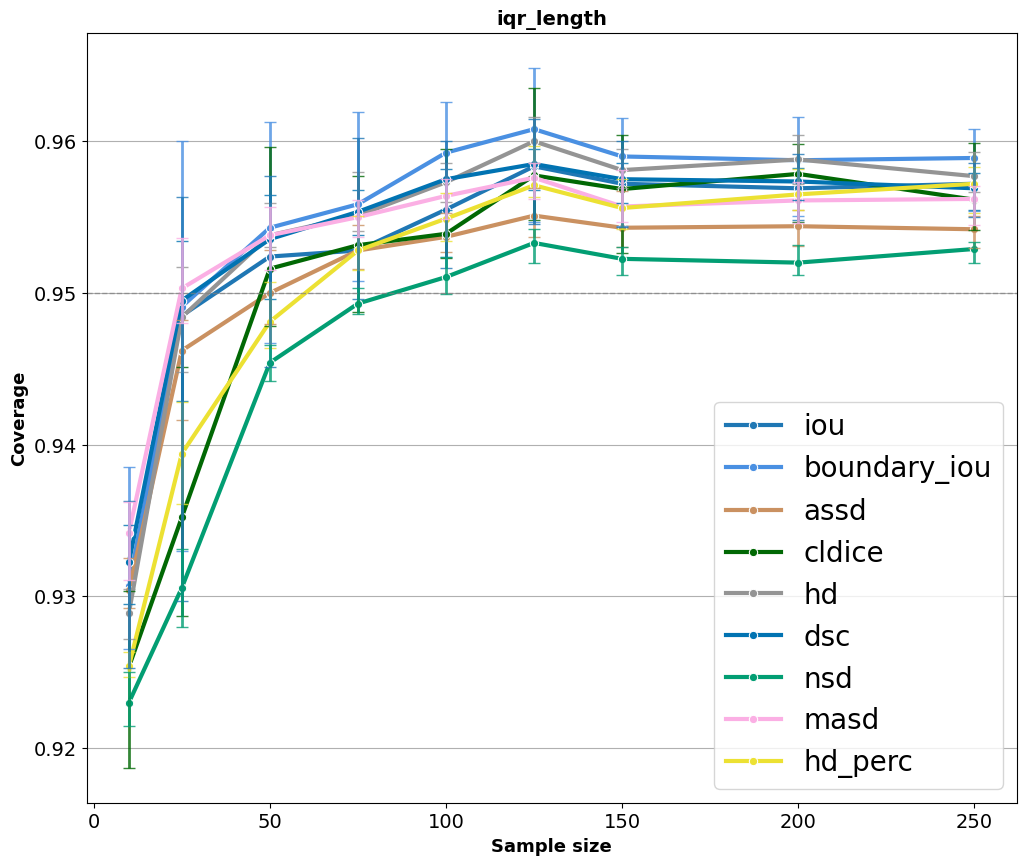

In [53]:


palette = sns.color_palette("colorblind", len(metric_order))
color_dict = dict(zip(metric_order, palette))
color_dict.update({"iou": "#1f77b4",          # standard seaborn/matplotlib blue
    "boundary_iou": "#4a90e2", 
    "cldice":  "#016804"})
stats=CI_segm['stat'].unique()


for stat in stats:
    data_stat=CI_segm[CI_segm['stat']==stat]
    data_method=data_stat[data_stat['method']=='percentile']

    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    sns.lineplot(
    data=data_method,
    x='n', y='median', hue='metric',
    marker='o', ax=ax, palette=color_dict, linewidth=3)
    for metric, df_metric in data_method.groupby('metric'):
        ax.errorbar(
        df_metric['n'],
        df_metric['median'],
        yerr=[df_metric['median'] - df_metric['lower_bound'],
              df_metric['upper_bound'] - df_metric['median']],
        fmt='none',                   # no markers (just error bars)
        ecolor=color_dict[metric],    # match line color
        elinewidth=2, capsize=4, alpha=0.8
    )

    ax.set_title(f'{stat}', weight='bold', fontsize=14)
    ax.axhline(0.95, linestyle='--', color='gray', linewidth=1, alpha=0.7)
    ax.set_xlabel('Sample size', weight='bold', fontsize=13)
    ax.set_ylabel('Coverage', weight='bold',fontsize=13)
    ax.grid(True, axis='y')
    ax.legend(fontsize=20)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    plt.savefig(f'../../journal paper plots/segmentation/message 2 metrics/plot by stat/impact_metric_{stat}.pdf')
    # plt.show()



In [54]:
CI_segm['method'].unique()

array(['Basic', 'bca', 'percentile', 'Parametric z', 'Parametric t'],
      dtype=object)

### Fit function: coverage $= \frac{\beta_1 }{n} + \frac{\beta_2}{\sqrt{n}}$

In [55]:


fitted_list=[]
alphas=[]
df_method=CI_segm[CI_segm['method']=='Parametric t']

df_stat=df_method[df_method['stat']=='mean']
for metric in df_method['metric'].unique(): 

    df_metric=df_stat[df_stat['metric']==metric]
    values=df_metric['median']
    n_values=np.array(df_metric['n'])
    y_values=0.95-values
    Z=1/np.sqrt(n_values)
    X = np.column_stack([Z, Z**2])
    XtX = X.T @ X
    Xty = X.T @ y_values
    beta_hat = np.linalg.inv(XtX) @ Xty
    alpha1, alpha2 = beta_hat
    y_pred = alpha1 * Z + alpha2*Z**2
    print(y_pred)
    df_metric['y_pred'] = -y_pred +0.95


    alphas.append({'metric':metric,
                   'beta_1': alpha1, 
                   'beta_2':alpha2})
    fitted_list.append(df_metric)

alpha_df = pd.concat(fitted_list, ignore_index=True)
coef_df=pd.DataFrame(alphas)

[0.01444946 0.0067701  0.00394308 0.00291418 0.00236613 0.00202011
 0.00177927 0.00146208 0.00125962]
[0.00882715 0.00417073 0.00244592 0.00181506 0.00147791 0.00126453
 0.0011157  0.00091924 0.00079351]
[0.11299144 0.0541616  0.03213248 0.02400585 0.01963832 0.01686227
 0.01491951 0.012345   0.01069032]
[0.0164801  0.00778105 0.00456051 0.00338308 0.00275401 0.00235595
 0.00207836 0.001712   0.0014776 ]
[0.03608469 0.01622106 0.00911758 0.00659355 0.00527089 0.00444628
 0.0038782  0.00313897 0.00267351]
[0.02437347 0.01085645 0.00605204 0.00435381 0.00346712 0.00291591
 0.00253706 0.00204547 0.00173693]
[0.04762023 0.02021762 0.01076782 0.00751567 0.00584991 0.00483016
 0.00413832 0.00325446 0.0027098 ]
[0.09617527 0.04833743 0.02972883 0.0226635  0.01879601 0.01630433
 0.01454188 0.01217806 0.01063872]
[0.07126664 0.03088603 0.01678376 0.01187504 0.00933993 0.00777759
 0.0067116  0.00534034 0.0044884 ]


/var/folders/4w/1glyl09x27jfg8kpgbdzrwv40000gp/T/ipykernel_24554/71444638.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric['y_pred'] = -y_pred +0.95
/var/folders/4w/1glyl09x27jfg8kpgbdzrwv40000gp/T/ipykernel_24554/71444638.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric['y_pred'] = -y_pred +0.95
/var/folders/4w/1glyl09x27jfg8kpgbdzrwv40000gp/T/ipykernel_24554/71444638.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

### Show coverage + fitted function

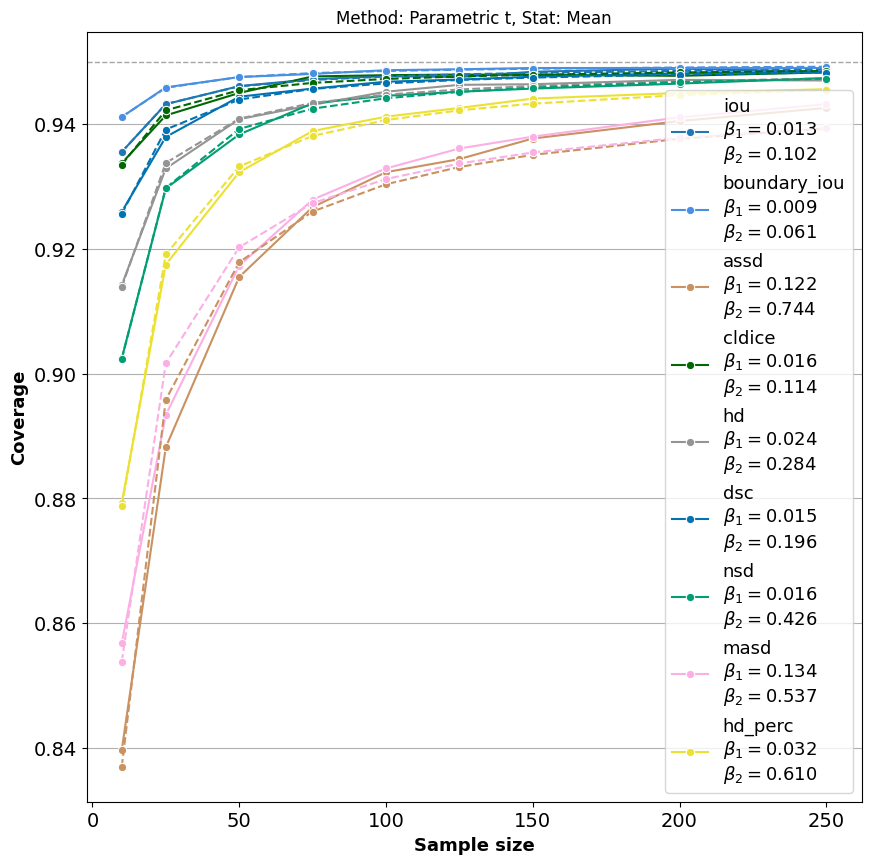

In [56]:


stats=CI_segm['stat'].unique()
methods=CI_segm['method'].unique()

fig, ax = plt.subplots(1, 1, figsize=(10, 10), sharey=True)


sns.lineplot(
    data=alpha_df,
    x='n', y='median', hue='metric',
    marker='o', ax=ax, palette=color_dict
)
sns.lineplot(
    data=alpha_df,
    x='n', y='y_pred', hue='metric',
    marker='o', ax=ax, palette=color_dict, linestyle='--', legend=False
)
ax.axhline(0.95, linestyle='--', color='gray', linewidth=1, alpha=0.7)
ax.set_title(f'Method: Parametric t, Stat: Mean')
ax.set_xlabel('Sample size', fontsize=13, weight='bold')
ax.set_ylabel( 'Coverage', weight='bold', fontsize=13)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.grid(True, axis='y')
# ax.set_ylim(-0.01, 0.17)
handles, labels = ax.get_legend_handles_labels()
new_labels = []

for label in labels:
    if label in coef_df['metric'].values:
        param_value_1 = coef_df.loc[coef_df['metric'] == label, 'beta_1'].iloc[0]
        param_value_2 = coef_df.loc[coef_df['metric'] == label, 'beta_2'].iloc[0]

 
        new_labels.append(
            f"{label}\n"
            f"$\\beta_1={param_value_1:.3f}$\n"
            f"$\\beta_2={param_value_2:.3f}$"
        )
    else:
        new_labels.append(label)

ax.legend(handles=handles, labels=new_labels, loc='lower right', fontsize=13)


plt.savefig('../../journal paper plots/segmentation/message 2 metrics/impact_metrics_fit.pdf')

plt.show()


### Compute correlation $\beta_1$ vs skewness, $\beta_2$ vs squared skewness and $\beta_2$ vs kurtosis

In [23]:
skew=pd.read_csv('../../journal paper plots/segmentation/skewness_medians.csv')
kurt=pd.read_csv('../../journal paper plots/segmentation/kurtosis_medians.csv')

skew['squared skewness']=skew['skewness']**2
coef_df=pd.DataFrame(alphas)


merged = pd.merge(skew, coef_df, on="metric", how="inner")

merged = pd.merge(kurt, merged, on="metric", how="inner")

corr_value_1=merged[['skewness', 'beta_1']].corr().loc['skewness', 'beta_1']
corr_value_2=merged[['squared skewness', 'beta_2']].corr().loc['squared skewness', 'beta_2']
corr_value_3=merged[['kurtosis', 'beta_2']].corr().loc['kurtosis', 'beta_2']
print(rf"Correlation skewness vs beta_1: {corr_value_1}")
print(rf"Correlation squared skewness vs beta_2: {corr_value_2}")
print(rf"Correlation kurtosis vs beta_2: {corr_value_3}")

Correlation skewness vs beta_1: 0.836158074589259
Correlation squared skewness vs beta_2: 0.8716016864907206
Correlation kurtosis vs beta_2: 0.8504357086081944


# Micro vs macro

In [25]:
df_macro


subtask   algo               stat       n  \
0      aptos19_blindness_detection  alg_1  balanced_accuracy    10.0   
1      aptos19_blindness_detection  alg_1  balanced_accuracy    10.0   
2      aptos19_blindness_detection  alg_1  balanced_accuracy    10.0   
3      aptos19_blindness_detection  alg_1  balanced_accuracy    25.0   
4      aptos19_blindness_detection  alg_1  balanced_accuracy    25.0   
...                            ...    ...                ...     ...   
28381              mura_xr_forearm  alg_9           f1_score   500.0   
28382              mura_xr_forearm  alg_9           f1_score   500.0   
28383              mura_xr_forearm  alg_9           f1_score  1000.0   
28384              mura_xr_forearm  alg_9           f1_score  1000.0   
28385              mura_xr_forearm  alg_9           f1_score  1000.0   

           method     value   x_group  
0           Basic  0.480100    n=10.0  
1             bca  0.409600    n=10.0  
2      percentile  0.431300    n=10.0  
3           Basic  0.639000    n=25.0  
4             bca  0.728900    n=25.0  
...           ...       ...       ...  
28381         bca  0.953600   n=500.0  
28382  percentile  0.949700   n=500.0  
28383       Basic  0.946000  n=1000.0  
28384         bca  0.946571  n=1000.0  
28385  percentile  0.946571  n=1000.0  

[28386 rows x 7 columns]

## Compute median coverage and width with CIs for macro

In [26]:
all_stats = df_macro['stat'].unique()

means_macro=[]
for n in df_macro['n'].unique():
    data_n=df_macro[df_macro['n']==n]
    data_method=data_n[data_n['method']=='percentile']
    data_n_width=df_macro_width[df_macro_width['n']==n]
    data_method_width=data_n_width[data_n_width['method']=='percentile']
    for stat in all_stats:
        print(stat)

        data_stat=data_method[data_method['stat']==stat]
        data_stat_width=data_method_width[data_method_width['stat']==stat]

        median=np.median(data_stat['value'])
        CI= bootstrap_hierarchique_one_level(data_stat, n_iterations=999,level_name='subtask', score='value')
        median_width=np.median(data_stat_width['width'])
        CI_width= bootstrap_hierarchique_one_level(data_stat_width, n_iterations=999,level_name='subtask', score='width')
        means_macro.append({'n':n,
                        'method':'percentile', 
                        'metric':stat,
                        'median':median, 
                        'lower_bound':CI[0],
                        'upper_bound':CI[1],
                        'median_width': median_width, 
                        'lower_bound_width':CI_width[0],
                        'upper_bound_width':CI_width[1] })
       

balanced_accuracy
ap
auc
f1_score
balanced_accuracy
ap
auc
f1_score
balanced_accuracy
ap
auc
f1_score
balanced_accuracy
ap
auc
f1_score
balanced_accuracy
ap
auc
f1_score
balanced_accuracy
ap
auc
f1_score
balanced_accuracy
ap
auc
f1_score
balanced_accuracy
ap
auc
f1_score
balanced_accuracy
ap
auc
f1_score
balanced_accuracy
ap
auc


/Users/pascaline.andre/miniforge3/envs/newenv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/pascaline.andre/miniforge3/envs/newenv/lib/python3.10/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


f1_score
balanced_accuracy
ap
auc
f1_score


In [27]:
means_macro_df=pd.DataFrame(means_macro)
means_macro_df

n      method             metric    median  lower_bound  upper_bound  \
0     10.0  percentile  balanced_accuracy  0.744750     0.726300     0.771825   
1     10.0  percentile                 ap  0.821100     0.791100     0.837400   
2     10.0  percentile                auc  0.802200     0.717800     0.848500   
3     10.0  percentile           f1_score  0.768750     0.739475     0.786000   
4     25.0  percentile  balanced_accuracy  0.874800     0.829125     0.888300   
5     25.0  percentile                 ap  0.824900     0.764625     0.847000   
6     25.0  percentile                auc  0.922200     0.910450     0.933600   
7     25.0  percentile           f1_score  0.881900     0.860100     0.906100   
8     50.0  percentile  balanced_accuracy  0.924950     0.903300     0.928400   
9     50.0  percentile                 ap  0.841400     0.789400     0.870000   
10    50.0  percentile                auc  0.942800     0.939350     0.944100   
11    50.0  percentile           f1_score  0.913550     0.902550     0.927650   
12    75.0  percentile  balanced_accuracy  0.934950     0.927400     0.938600   
13    75.0  percentile                 ap  0.863800     0.825075     0.890450   
14    75.0  percentile                auc  0.944400     0.943200     0.946100   
15    75.0  percentile           f1_score  0.925850     0.918950     0.934050   
16   100.0  percentile  balanced_accuracy  0.940450     0.938200     0.941500   
17   100.0  percentile                 ap  0.876700     0.835800     0.901425   
18   100.0  percentile                auc  0.946100     0.945100     0.947100   
19   100.0  percentile           f1_score  0.931350     0.927700     0.937400   
20   125.0  percentile  balanced_accuracy  0.942350     0.940850     0.944025   
21   125.0  percentile                 ap  0.888400     0.856300     0.905100   
22   125.0  percentile                auc  0.946500     0.945700     0.947000   
23   125.0  percentile           f1_score  0.935500     0.932300     0.940000   
24   150.0  percentile  balanced_accuracy  0.943750     0.942900     0.945000   
25   150.0  percentile                 ap  0.891500     0.869300     0.910300   
26   150.0  percentile                auc  0.947400     0.946925     0.947700   
27   150.0  percentile           f1_score  0.937950     0.934700     0.940300   
28   200.0  percentile  balanced_accuracy  0.944800     0.943400     0.945600   
29   200.0  percentile                 ap  0.902850     0.878500     0.917400   
30   200.0  percentile                auc  0.947750     0.947200     0.948100   
31   200.0  percentile           f1_score  0.941100     0.938800     0.943675   
32   250.0  percentile  balanced_accuracy  0.946000     0.945300     0.946500   
33   250.0  percentile                 ap  0.908600     0.889650     0.920600   
34   250.0  percentile                auc  0.947550     0.947150     0.947900   
35   250.0  percentile           f1_score  0.942400     0.941000     0.943950   
36   500.0  percentile  balanced_accuracy  0.947100     0.946700     0.947600   
37   500.0  percentile                 ap       NaN          NaN          NaN   
38   500.0  percentile                auc  0.947700     0.947400     0.948000   
39   500.0  percentile           f1_score  0.944900     0.944000     0.945700   
40  1000.0  percentile  balanced_accuracy  0.947714     0.947143     0.948000   
41  1000.0  percentile                 ap       NaN          NaN          NaN   
42  1000.0  percentile                auc  0.946571     0.945714     0.947429   
43  1000.0  percentile           f1_score  0.946000     0.945143     0.946571   

    median_width  lower_bound_width  upper_bound_width  
0       0.296732           0.277845           0.360073  
1       0.332207           0.306868           0.357926  
2       0.561279           0.487339           0.611642  
3       0.287249           0.259218           0.352391  
4       0.276579           0.267407           0.296200  
5       0.253110     

### Same for micro

In [28]:
all_stats = df_micro['stat'].unique()

means_micro=[]
for n in df_micro['n'].unique():
    print(n)
    data_n=df_micro[df_micro['n']==n]
    
    data_n_width=df_micro_width[df_micro_width['n']==n]
    for method in data_n_width['method'].unique():
        print(method)
        data_method=data_n[data_n['method']==method]
        data_method_width=data_n_width[data_n_width['method']==method]
        for stat in all_stats:
          

            data_stat=data_method[data_method['stat']==stat]
            data_stat_width=data_method_width[data_method_width['stat']==stat]

            median=np.median(data_stat['value'])
            CI= bootstrap_hierarchique_one_level(data_stat, n_iterations=999,level_name='subtask', score='value')
            median_width=np.median(data_stat_width['width'])
            CI_width= bootstrap_hierarchique_one_level(data_stat_width, n_iterations=999,level_name='subtask', score='width')
            means_micro.append({'n':n,
                            'method':method, 
                            'metric':stat,
                            'median':median, 
                            'lower_bound':CI[0],
                            'upper_bound':CI[1],
                            'median_width': median_width, 
                            'lower_bound_width':CI_width[0],
                            'upper_bound_width':CI_width[1] })
       

10.0
Basic
bca
percentile
agresti_coull


/Users/pascaline.andre/miniforge3/envs/newenv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/pascaline.andre/miniforge3/envs/newenv/lib/python3.10/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


wilson
exact
wald
25.0
Basic
bca
percentile
agresti_coull
wilson
exact
wald
50.0
Basic
bca
percentile
agresti_coull
wilson
exact
wald
75.0
Basic
bca
percentile
agresti_coull
wilson
exact
wald
100.0
Basic
bca
percentile
agresti_coull
wilson
exact
wald
125.0
Basic
bca
percentile
agresti_coull
wilson
exact
wald
150.0
Basic
bca
percentile
agresti_coull
wilson
exact
wald
200.0
Basic
bca
percentile
agresti_coull
wilson
exact
wald
250.0
Basic
bca
percentile
agresti_coull
wilson
exact
wald


In [29]:
means_micro_df=pd.DataFrame(means_micro)
means_micro_df

n method    metric   median  lower_bound  upper_bound  median_width  \
0     10.0  Basic  accuracy  0.85480      0.84950      0.86200      0.553690   
1     10.0  Basic        ap  0.78735      0.77195      0.81480      0.399763   
2     10.0  Basic       auc  0.81310      0.80810      0.84360      0.476803   
3     10.0  Basic  f1_score  0.85495      0.84830      0.86480      0.551636   
4     10.0    bca  accuracy  0.88075      0.87585      0.88795      0.541235   
..     ...    ...       ...      ...          ...          ...           ...   
247  250.0  exact  f1_score      NaN          NaN          NaN           NaN   
248  250.0   wald  accuracy  0.94650      0.94620      0.94700      0.118202   
249  250.0   wald        ap      NaN          NaN          NaN           NaN   
250  250.0   wald       auc      NaN          NaN          NaN           NaN   
251  250.0   wald  f1_score      NaN          NaN          NaN           NaN   

     lower_bound_width  upper_bound_width  
0             0.537267           0.564649  
1             0.371372           0.438285  
2             0.460222           0.560102  
3             0.535793           0.565214  
4             0.519960           0.559320  
..                 ...                ...  
247                NaN                NaN  
248           0.115326           0.120255  
249                NaN                NaN  
250                NaN                NaN  
251                NaN                NaN  

[252 rows x 9 columns]

### Plot coverage by metric with CIs

/var/folders/4w/1glyl09x27jfg8kpgbdzrwv40000gp/T/ipykernel_24554/2475279862.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  means_micro_df_method["Aggregation"] = "Classification micro"


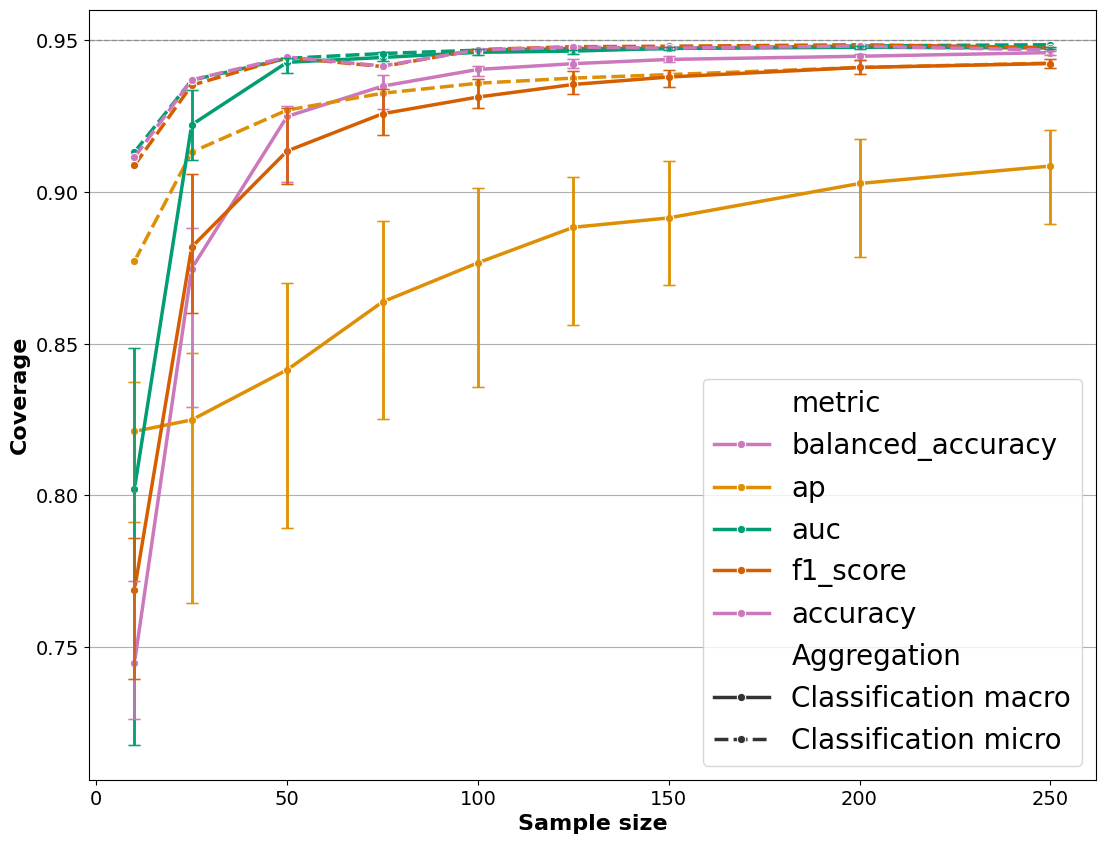

In [33]:
means_macro_df_n=means_macro_df[(means_macro_df['n']<=250)]
means_micro_df_method=means_micro_df[means_micro_df['method']=='percentile']
metrics_classif=np.append(means_macro_df_n['metric'].unique(), 'accuracy')
palette_classif = sns.color_palette("colorblind", len(metrics_classif))
color_dict_classif = dict(zip(metrics_classif, palette))

color_dict_classif.update({'balanced_accuracy':color_dict_classif['accuracy']})


fig, ax = plt.subplots(1, 1, figsize=(13, 10), sharey=True)

means_macro_df_n['Aggregation']= "Classification macro"
means_micro_df_method["Aggregation"] = "Classification micro"
df_all = pd.concat([means_macro_df_n, means_micro_df_method])

# Other plot
sns.lineplot(
    data=df_all,
    x='n', y='median', hue='metric',
    marker='o', palette=color_dict_classif, ax=ax, linewidth=2.5,  style='Aggregation'
)

for metric, df_metric in means_macro_df_n.groupby('metric'):
        ax.errorbar(
        df_metric['n'],
        df_metric['median'],
        yerr=[df_metric['median'] - df_metric['lower_bound'],
              df_metric['upper_bound'] - df_metric['median']],
        fmt='none',                   # no markers (just error bars)
        ecolor=color_dict_classif[metric],    # match line color
        elinewidth=2, capsize=4, alpha=0.8
    )
for metric, df_metric in means_macro_df_n.groupby('metric'):
        ax.errorbar(
        df_metric['n'],
        df_metric['median'],
        yerr=[df_metric['median'] - df_metric['lower_bound'],
              df_metric['upper_bound'] - df_metric['median']],
        fmt='none',                   # no markers (just error bars)
        ecolor=color_dict_classif[metric],    # match line color
        elinewidth=2, capsize=4, alpha=0.8
    )
ax.axhline(0.95, linestyle='--', color='gray', linewidth=1, alpha=0.7)
ax.set_title('', weight='bold')
ax.set_xlabel('Sample size',weight='bold', fontsize=16)
ax.set_ylabel('Coverage', weight='bold', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

ax.grid(True, axis='y')

ax.legend(prop={'weight':'bold'}, fontsize= 20)
plt.legend(fontsize= 20)

plt.savefig("../../journal paper plots/classification/message 1 metrics/micro_macro.pdf") # leave room for suptitle
plt.show()


### Same for width

/var/folders/4w/1glyl09x27jfg8kpgbdzrwv40000gp/T/ipykernel_24554/2458485335.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  means_micro_df_method["Aggregation"] = "Classification micro"


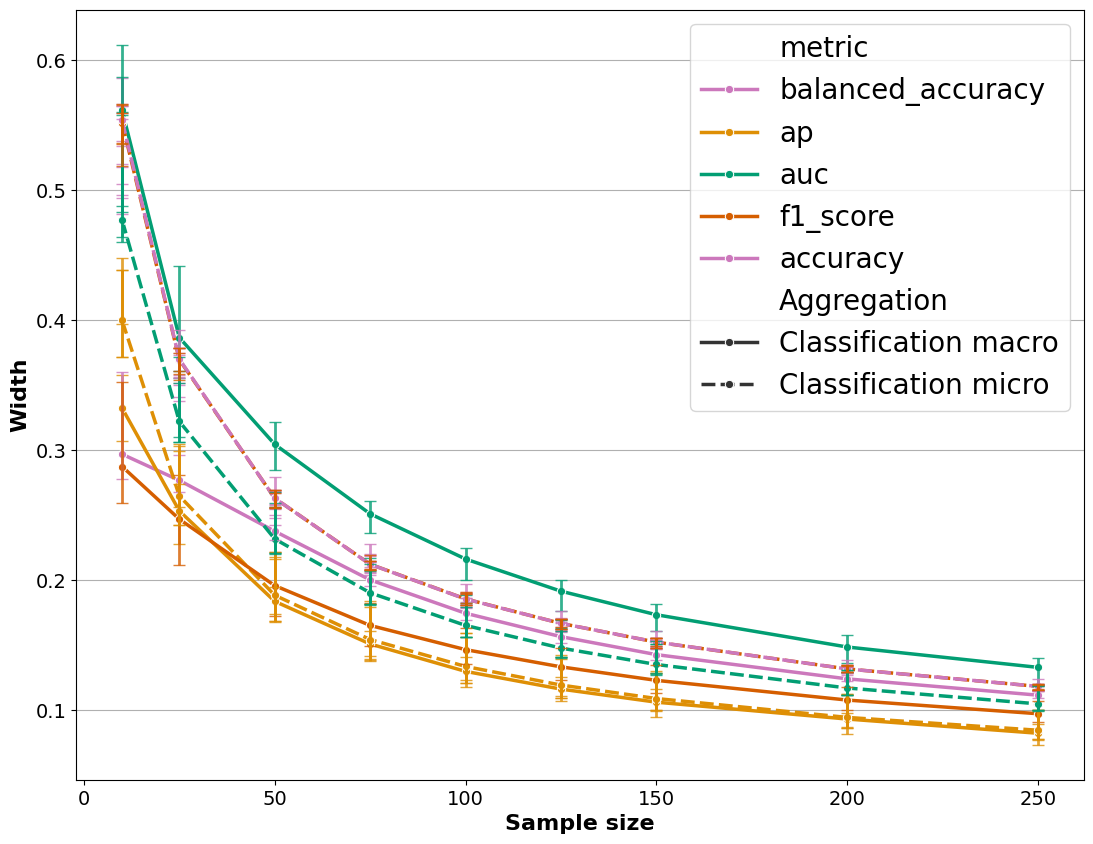

In [34]:

metrics_classif=np.append(means_macro_df['metric'].unique(), 'accuracy')
palette = sns.color_palette("colorblind", len(metrics_classif))
color_dict_classif = dict(zip(metrics_classif, palette))

color_dict_classif.update({'balanced_accuracy':color_dict_classif['accuracy']})

fig, ax = plt.subplots(1, 1, figsize=(13, 10), sharey=True)

means_macro_df_n['Aggregation']= "Classification macro"
means_micro_df_method["Aggregation"] = "Classification micro"
df_all = pd.concat([means_macro_df_n, means_micro_df_method])

# Other plot
sns.lineplot(
    data=df_all,
    x='n', y='median_width', hue='metric',
    marker='o', palette=color_dict_classif, ax=ax, linewidth=2.5,  style='Aggregation'
)

for metric, df_metric in means_macro_df.groupby('metric'):
        ax.errorbar(
        df_metric['n'],
        df_metric['median_width'],
        yerr=[df_metric['median_width'] - df_metric['lower_bound_width'],
              df_metric['upper_bound_width'] - df_metric['median_width']],
        fmt='none',                   # no markers (just error bars)
        ecolor=color_dict_classif[metric],    # match line color
        elinewidth=2, capsize=4, alpha=0.8
    )
for metric, df_metric in means_micro_df.groupby('metric'):
        ax.errorbar(
        df_metric['n'],
        df_metric['median_width'],
        yerr=[df_metric['median_width'] - df_metric['lower_bound_width'],
              df_metric['upper_bound_width'] - df_metric['median_width']],
        fmt='none',                   # no markers (just error bars)
        ecolor=color_dict_classif[metric],    # match line color
        elinewidth=2, capsize=4, alpha=0.8
    )
ax.set_title('', weight='bold')
ax.set_xlabel('Sample size',weight='bold', fontsize=16)
ax.set_ylabel('Width', weight='bold', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

ax.grid(True, axis='y')

ax.legend(prop={'weight':'bold'}, fontsize= 20)
plt.legend(fontsize= 20)

plt.savefig("../../journal paper plots/classification/message 1 metrics/micro_macro_width.pdf") # leave room for suptitle
plt.show()


# Impact of sample size

In [35]:
df_macro=df_macro[df_macro['n']<=250]

### Plot median coverage of segmentation metrics vs classification metric, 1 plot by summary stat

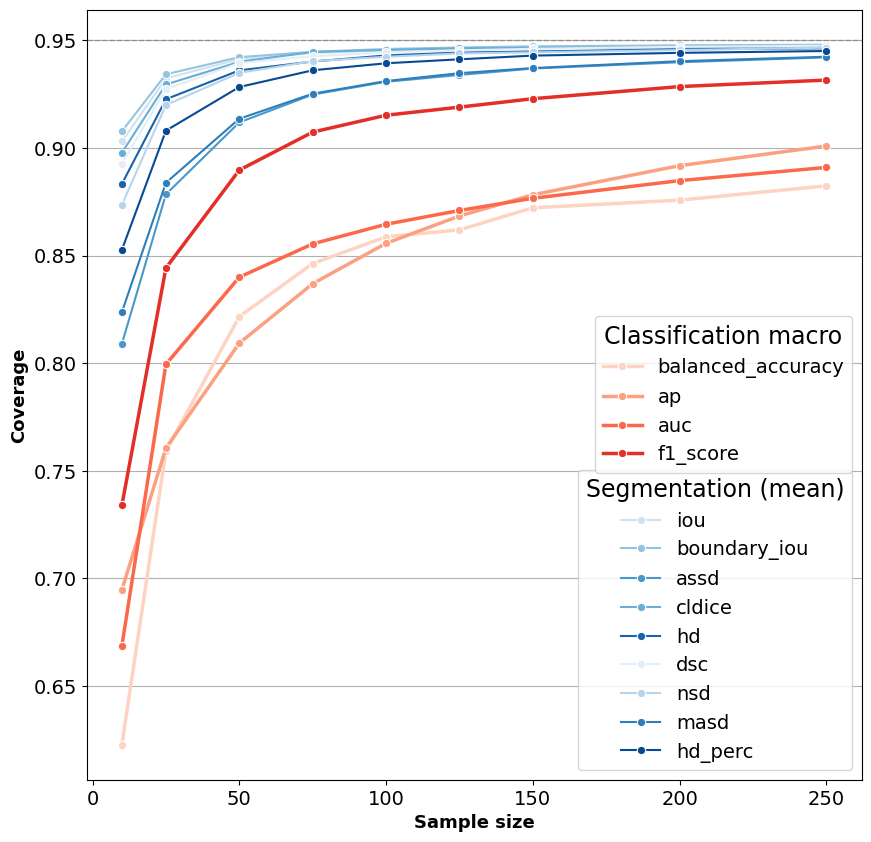

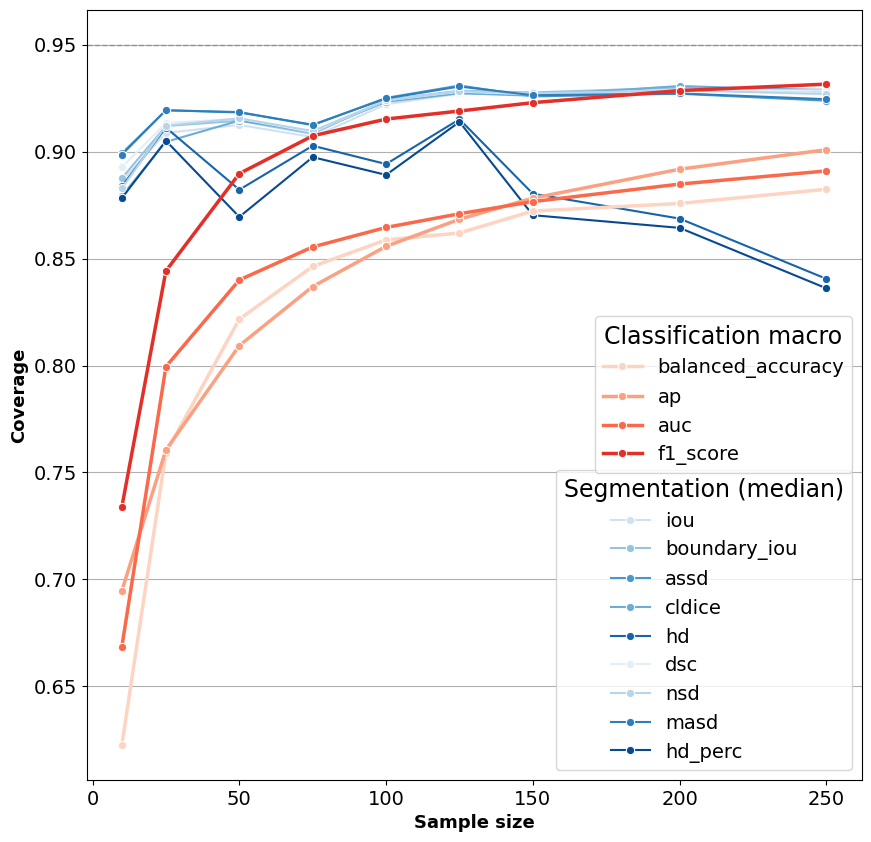

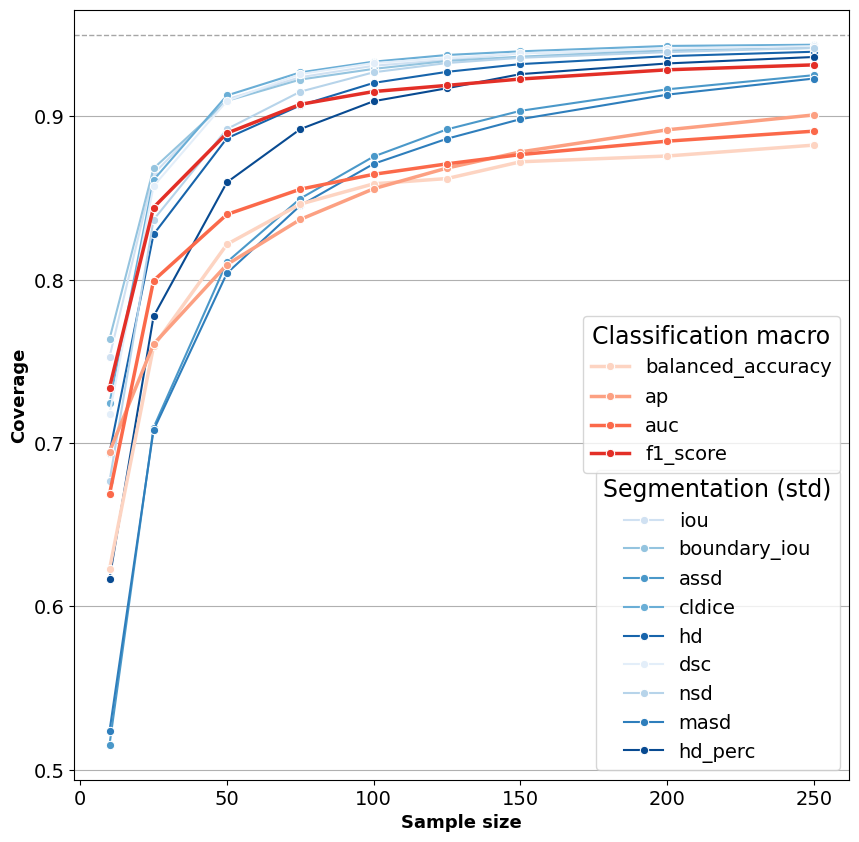

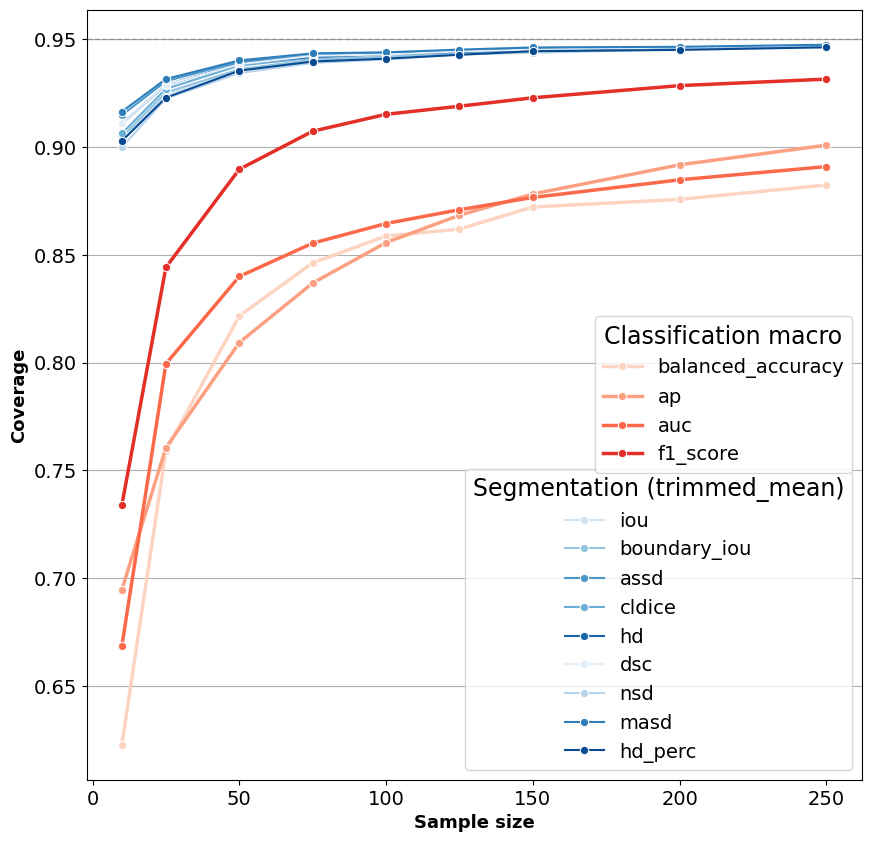

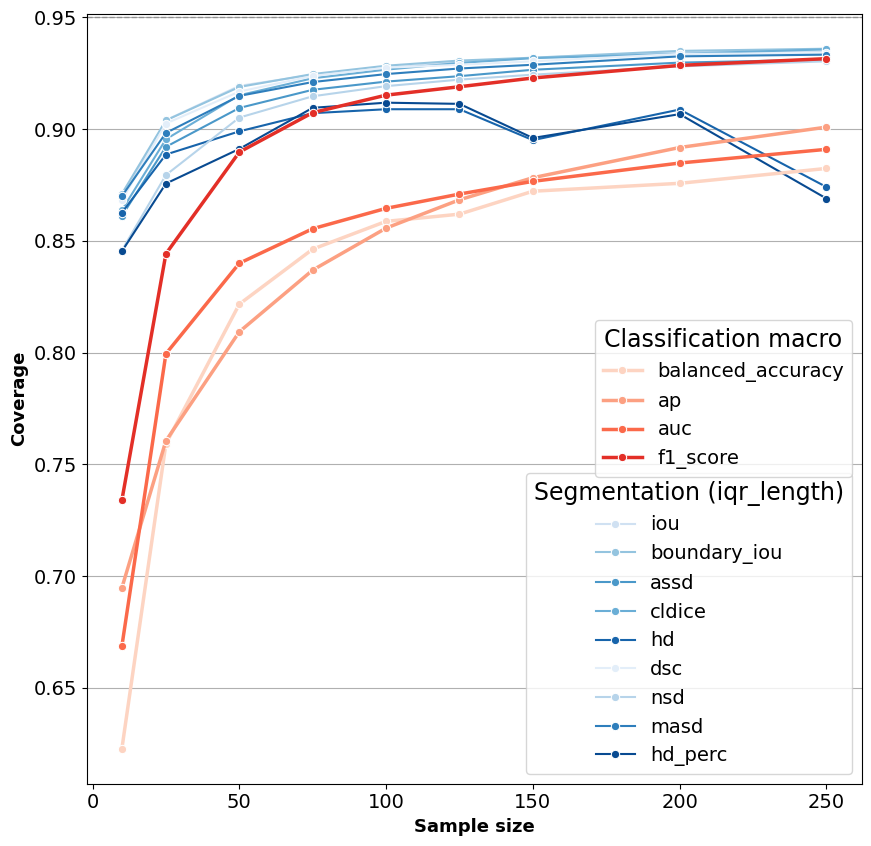

In [36]:

# Color palettes
palette = sns.color_palette("Blues", len(metric_order))
color_dict = dict(zip(metric_order, palette))
palette_classif = sns.color_palette("Reds", len(metrics_classif))
color_dict_classif = dict(zip(metrics_classif, palette_classif))
# Segmentation plot
for stat in CI_segm['stat'].unique():
    fig, ax = plt.subplots(1, 1, figsize=(10, 10), sharey=True)

    CI_segm_mean=CI_segm[CI_segm['stat']==stat]

    line1 = sns.lineplot(
        data=CI_segm_mean,
        x='n', y='median', hue='metric',
        marker='o', ax=ax, palette=color_dict,errorbar=None
    )

    # Classification plot
    line2 = sns.lineplot(
        data=df_macro,
        x='n', y='value', hue='stat',
        marker='o', palette=color_dict_classif, ax=ax, linewidth=2.5,errorbar=None
    )

    # Formatting
    ax.axhline(0.95, linestyle='--', color='gray', linewidth=1, alpha=0.7)
    ax.set_xlabel('Sample size', fontsize=13, weight='bold')
    ax.set_ylabel('Coverage', weight='bold', fontsize=13)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(True, axis='y')

    # --- Build two legends ---
    # 1) Segmentation
    handles1, labels1 = ax.get_legend_handles_labels()
    n_seg = len(metric_order)  # how many items belong to segmentation
    leg1 = ax.legend(
        handles1[:n_seg], labels1[:n_seg],
        title=f"Segmentation ({stat})", fontsize=14, title_fontsize=17, 
        loc='lower right'
    )

    # 2) Classification
    leg2 = ax.legend(
        handles1[n_seg:], labels1[n_seg:],
        title="Classification macro", fontsize=14, title_fontsize=17,
        loc='center right'
    )

    ax.add_artist(leg1)  # keep both legends
    plt.savefig(f'../../journal paper plots/message 2 sample size/plot by segm stat/classif_macro_{stat}.pdf')

    plt.show()


### Same for width

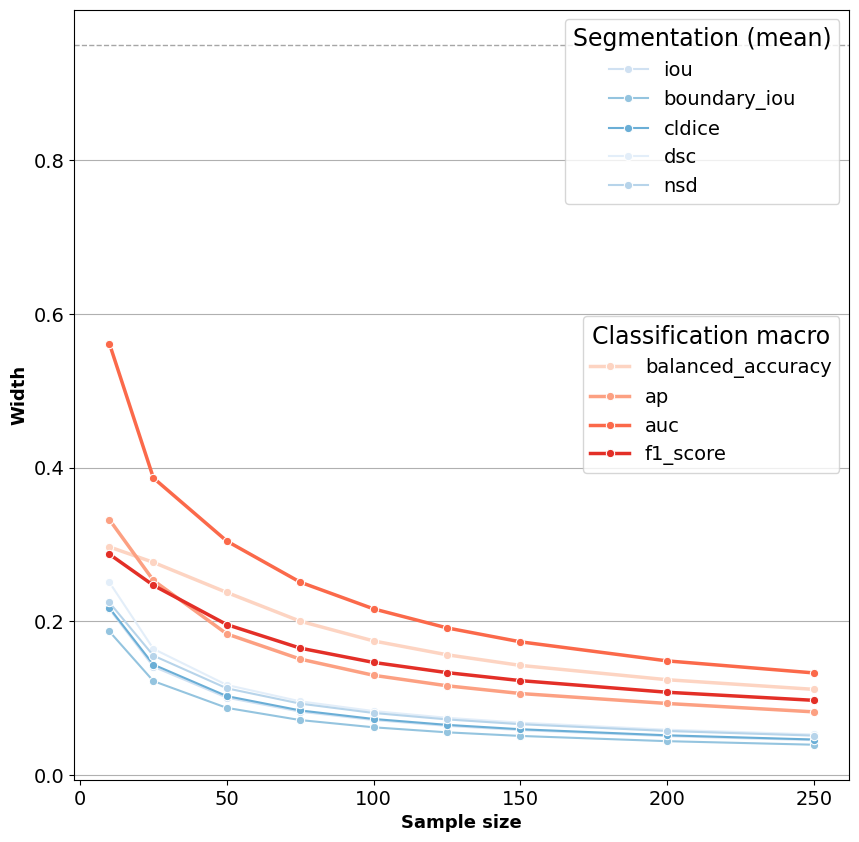

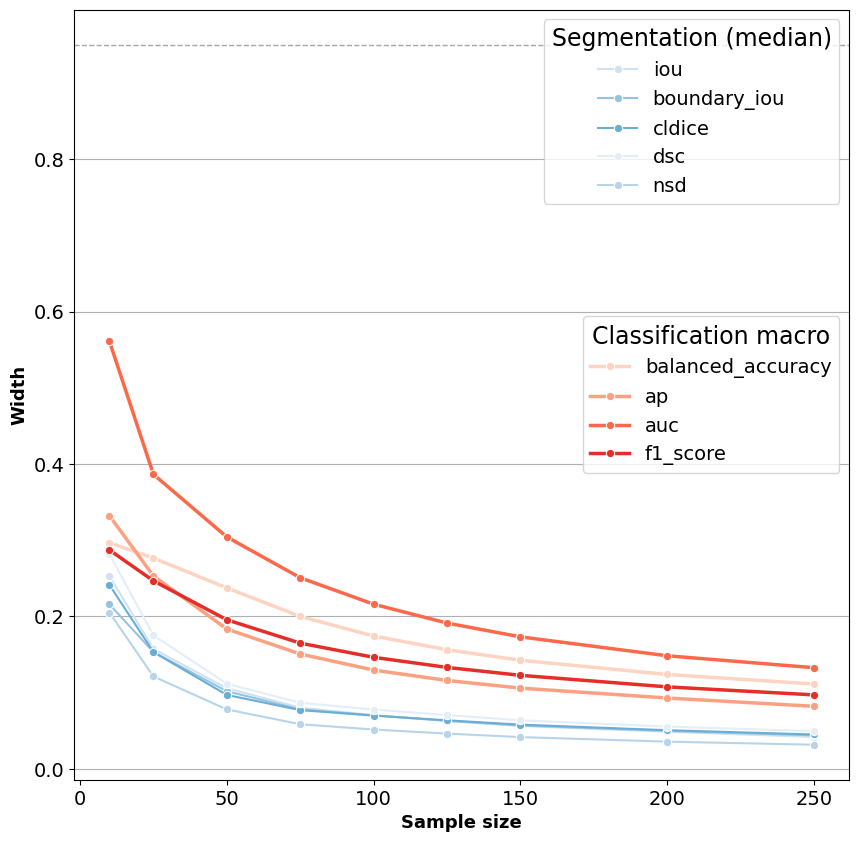

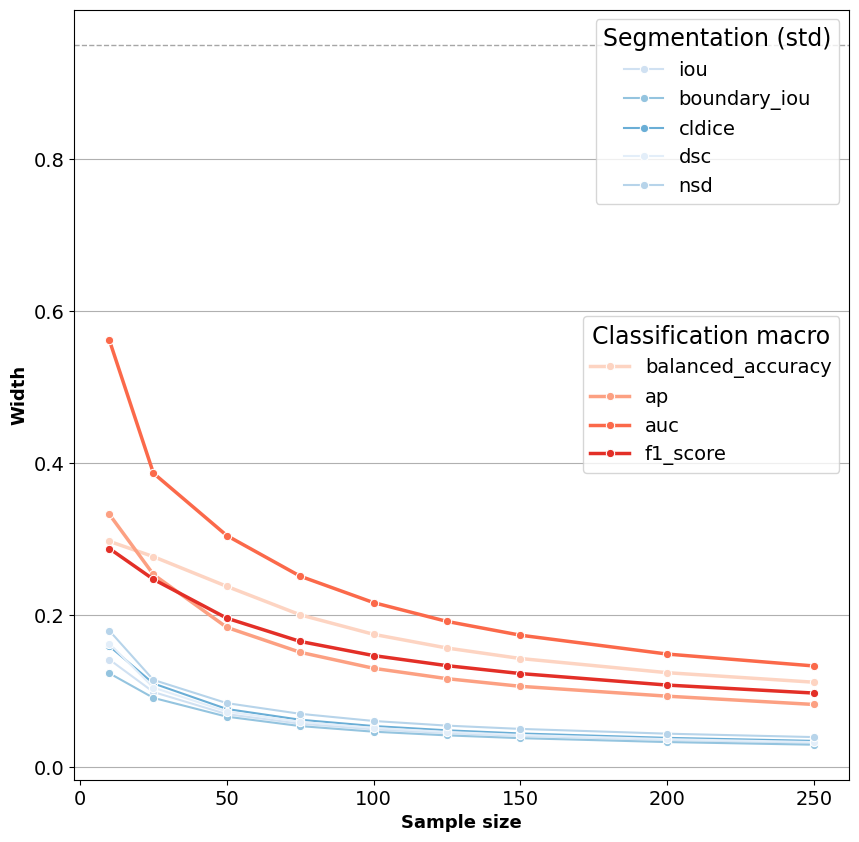

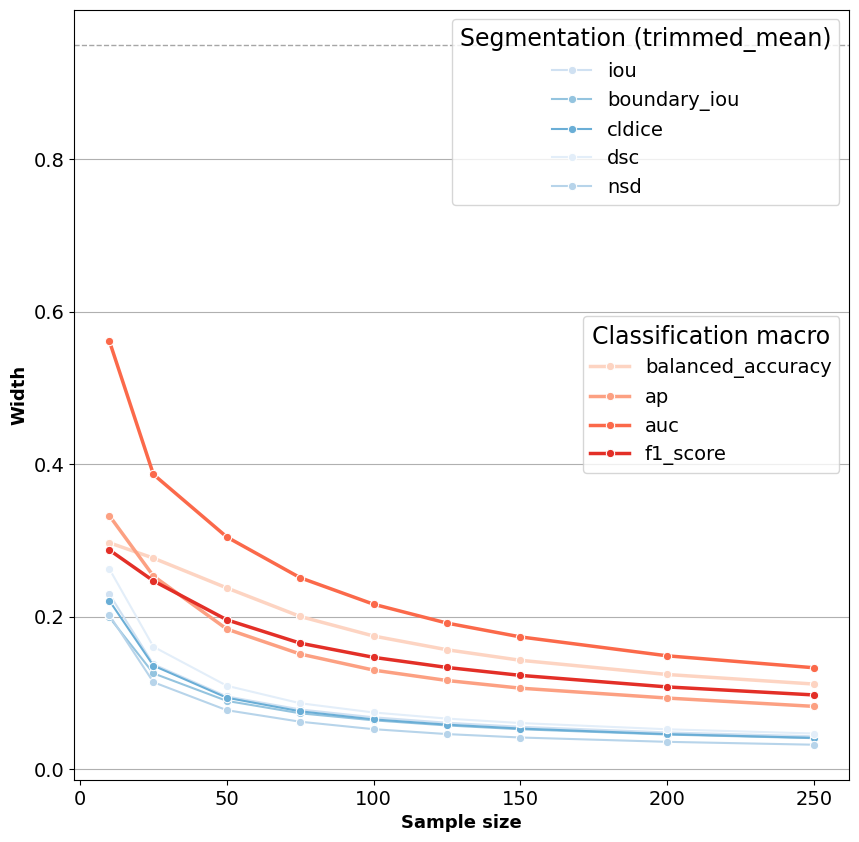

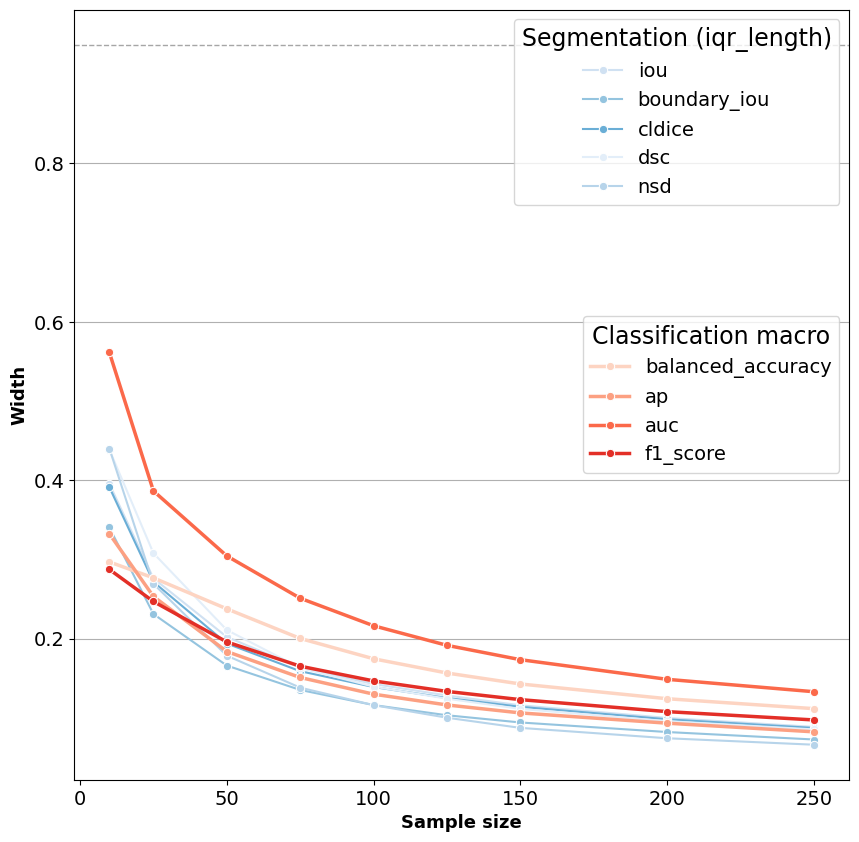

In [37]:

# Color palettes
palette = sns.color_palette("Blues", len(metric_order))
color_dict = dict(zip(metric_order, palette))
palette_classif = sns.color_palette("Reds", len(metrics_classif))
color_dict_classif = dict(zip(metrics_classif, palette_classif))
# Segmentation plot
bounded_metrics=['iou', 'boundary_iou', 'dsc','nsd','cldice']
CI_segm_width=CI_segm_width[CI_segm_width['metric'].isin(bounded_metrics)]
for stat in CI_segm['stat'].unique():
    fig, ax = plt.subplots(1, 1, figsize=(10, 10), sharey=True)

    CI_segm_mean=CI_segm_width[CI_segm_width['stat']==stat]

    line1 = sns.lineplot(
        data=CI_segm_mean,
        x='n', y='median_width', hue='metric',
        marker='o', ax=ax, palette=color_dict,errorbar=None 
    )

    # Classification plot
    line2 = sns.lineplot(
        data=means_macro_df,
        x='n', y='median_width', hue='metric',
        marker='o', palette=color_dict_classif, ax=ax, linewidth=2.5,errorbar=None
    )

    # Formatting
    ax.axhline(0.95, linestyle='--', color='gray', linewidth=1, alpha=0.7)
    ax.set_xlabel('Sample size', fontsize=13, weight='bold')
    ax.set_ylabel('Width', weight='bold', fontsize=13)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(True, axis='y')

    # --- Build two legends ---
    # 1) Segmentation
    handles1, labels1 = ax.get_legend_handles_labels()
    n_seg = len(bounded_metrics)  # how many items belong to segmentation
    leg1 = ax.legend(
        handles1[:n_seg], labels1[:n_seg],
        title=f"Segmentation ({stat})", fontsize=14, title_fontsize=17, 
        loc='upper right'
    )

    # 2) Classification
    leg2 = ax.legend(
        handles1[n_seg:], labels1[n_seg:],
        title="Classification macro", fontsize=14, title_fontsize=17,
        loc='center right'
    )

    ax.add_artist(leg1)  # keep both legends
    plt.savefig(f'../../journal paper plots/message 2 sample size/plot by segm stat/classif_macro_{stat}_width.pdf')

    plt.show()


# Message 3: Impact of CI methods

In [38]:
CI_segm.columns

Index(['method', 'n', 'median', 'upper_bound', 'lower_bound', 'metric',
       'stat'],
      dtype='object')

### Plot median coverage for method bootstrap BCa and percentile averaged across order metrics, one plot by segmentation metric

          method      n  upper_bound  lower_bound        metric   median  \
0          Basic   10.0       0.5652      0.51330          assd  0.53750   
1          Basic   10.0       0.5834      0.52090          masd  0.54970   
2          Basic   10.0       0.6887      0.63600       hd_perc  0.66620   
3          Basic   10.0       0.7280      0.68000           nsd  0.70090   
4          Basic   10.0       0.7478      0.70370            hd  0.72760   
...          ...    ...          ...          ...           ...      ...   
1372  percentile  250.0       0.9597      0.95800            hd  0.95880   
1373  percentile  250.0       0.9600      0.95620            hd  0.95770   
1374  percentile  250.0       0.9606      0.95340        cldice  0.95615   
1375  percentile  250.0       0.9608      0.95665  boundary_iou  0.95890   
1376  percentile  250.0       0.9619      0.95870       hd_perc  0.95980   

     Stat type  
0        Other  
1        Other  
2        Other  
3        Other  
4 

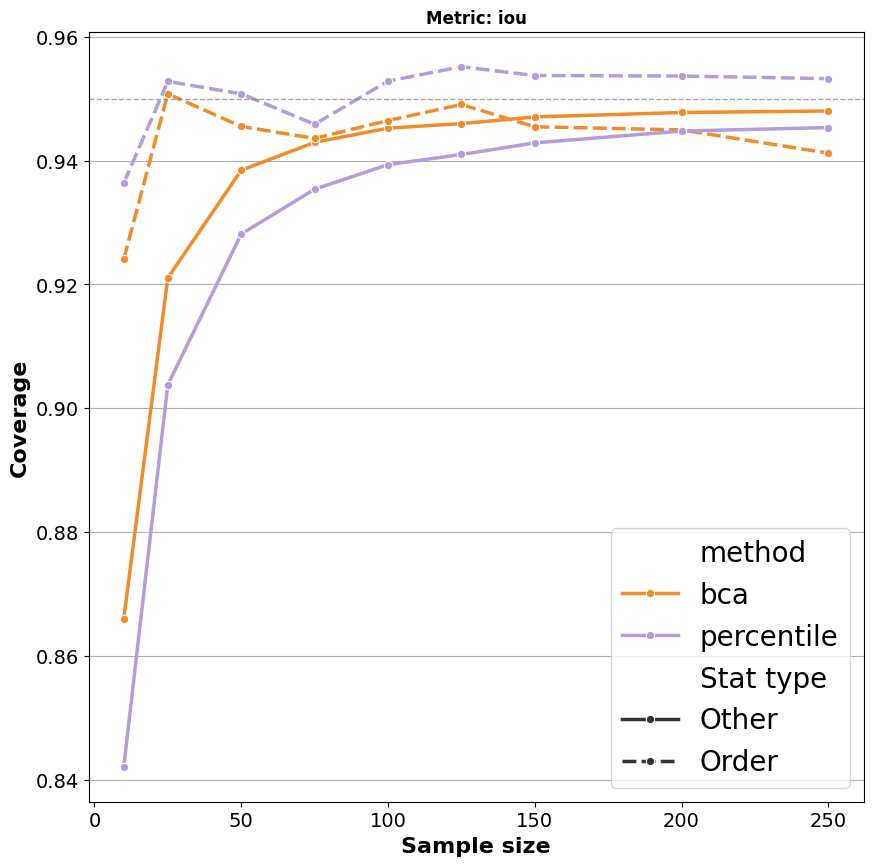

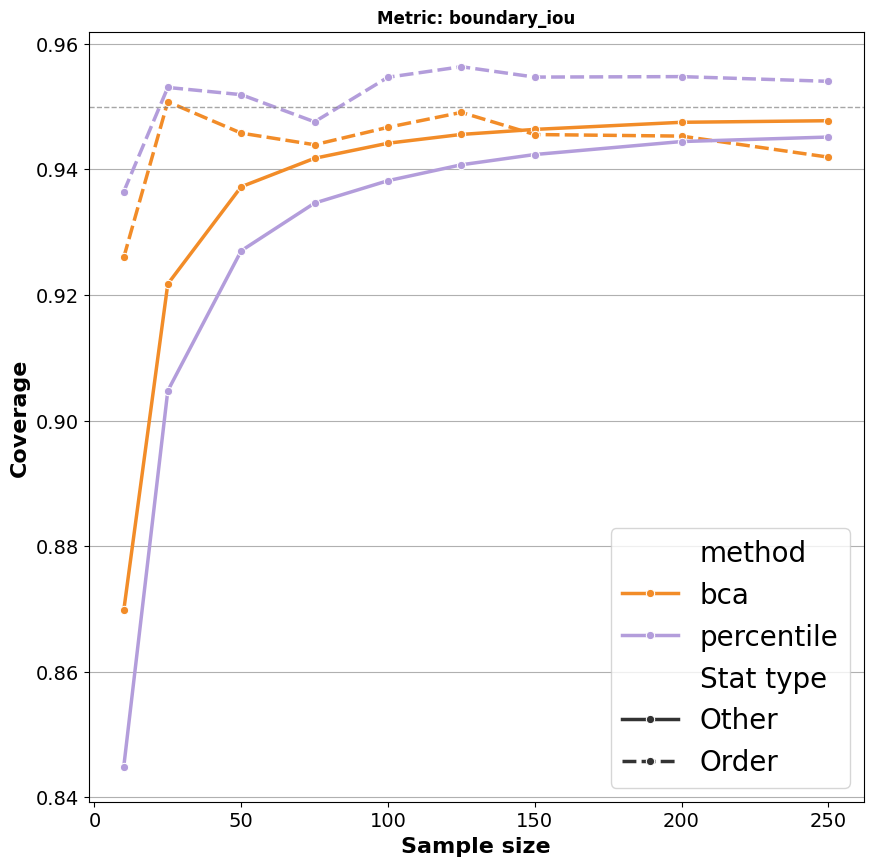

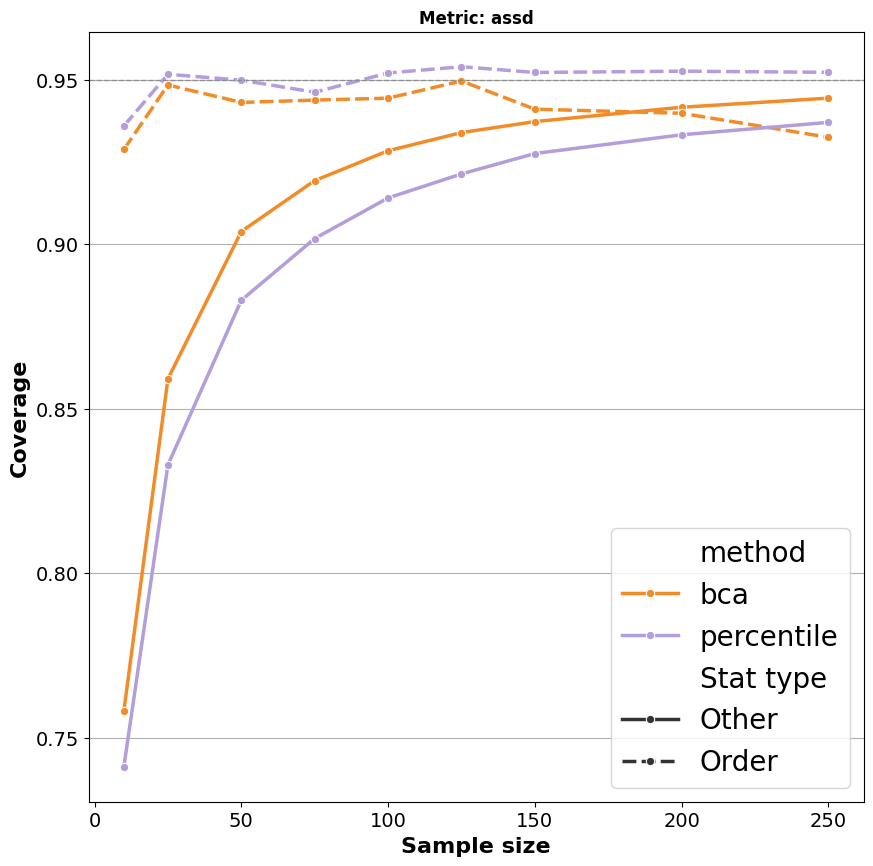

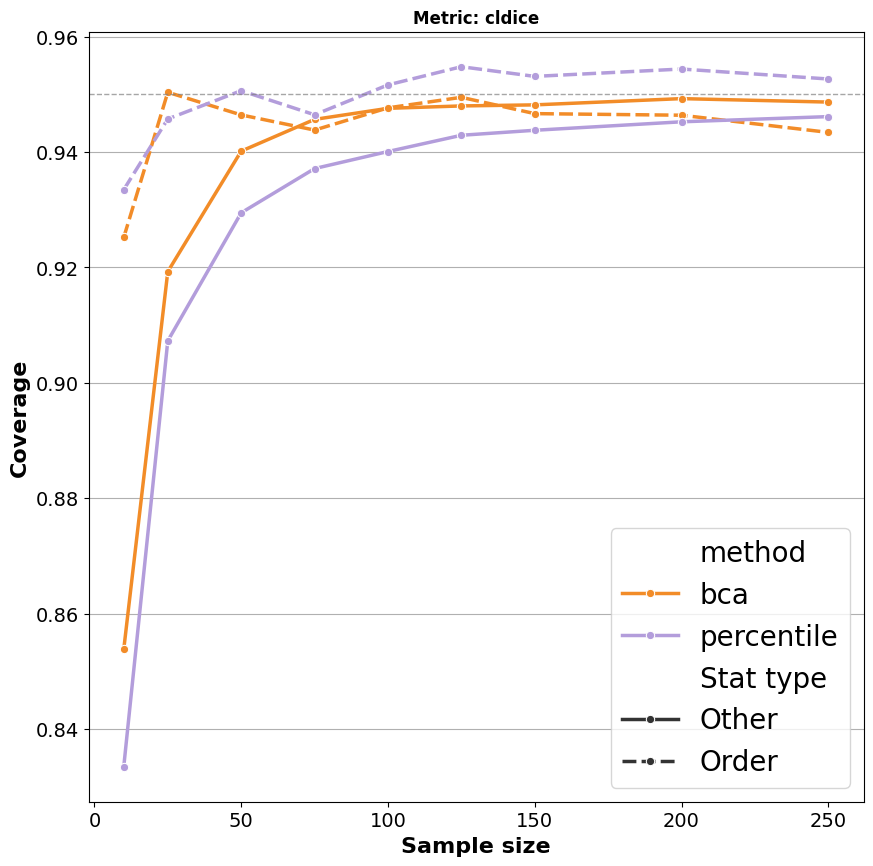

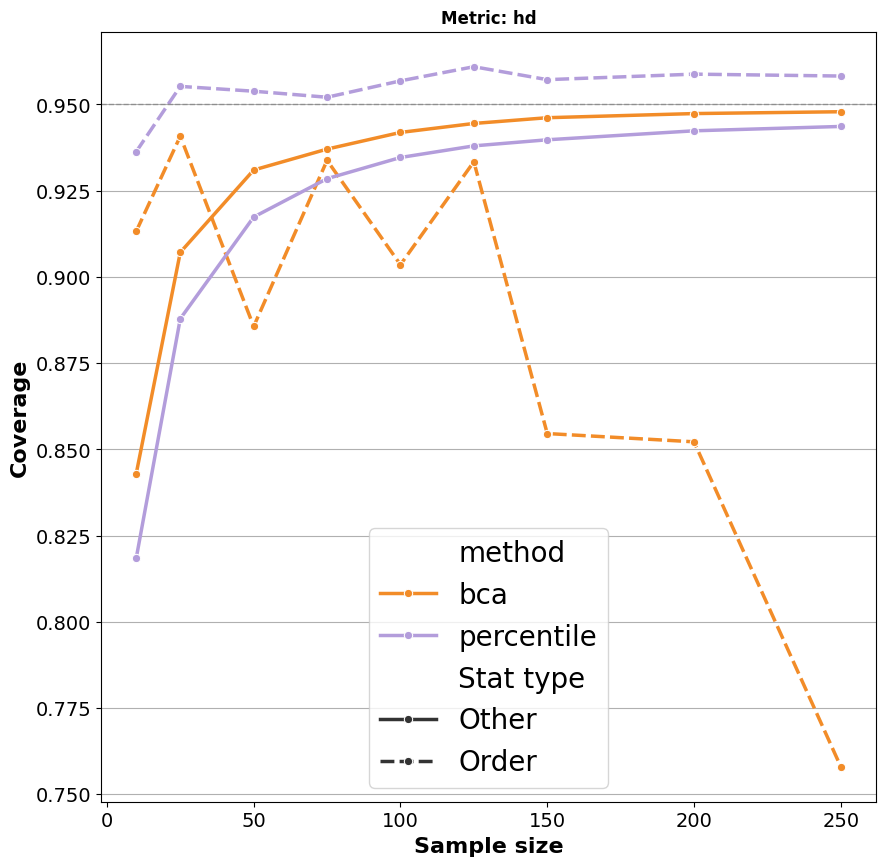

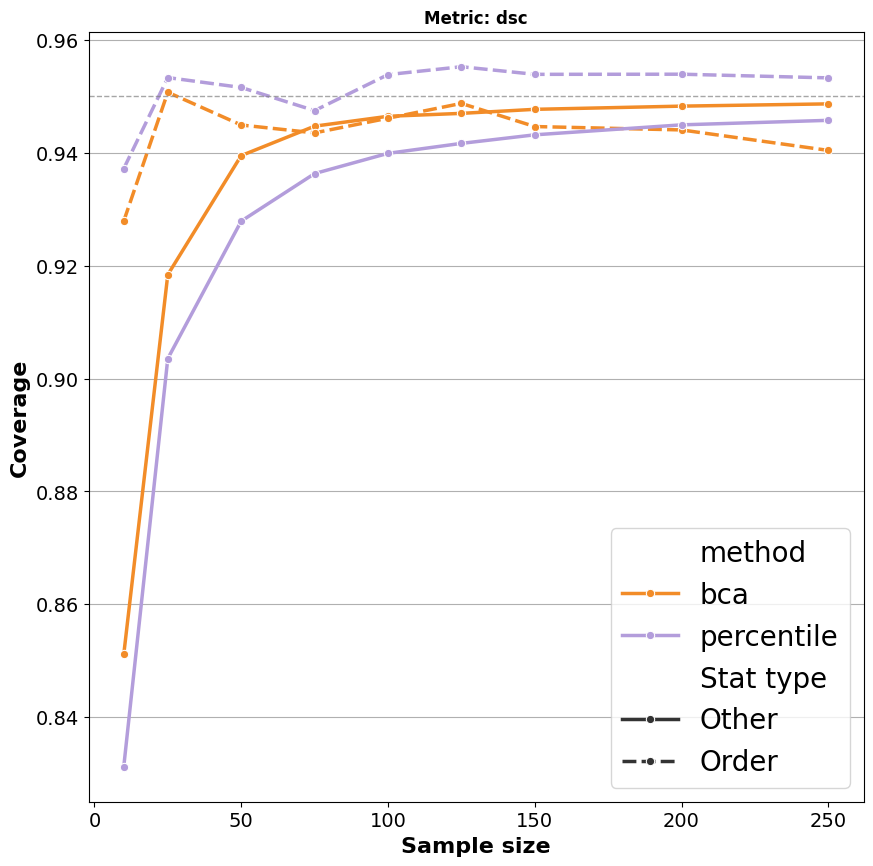

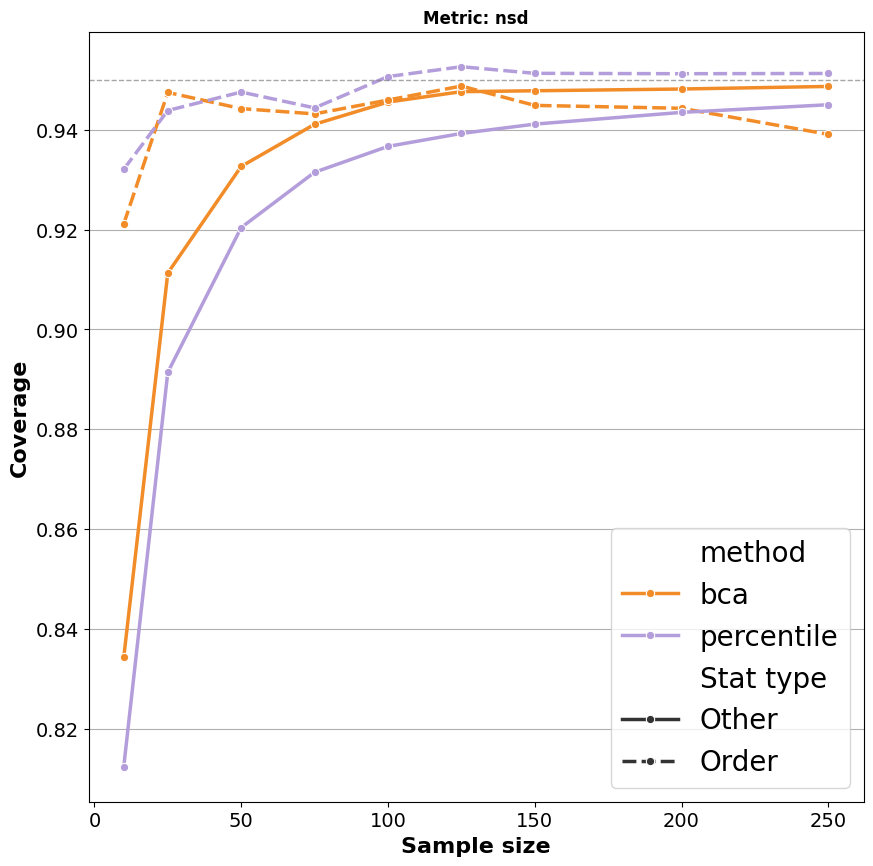

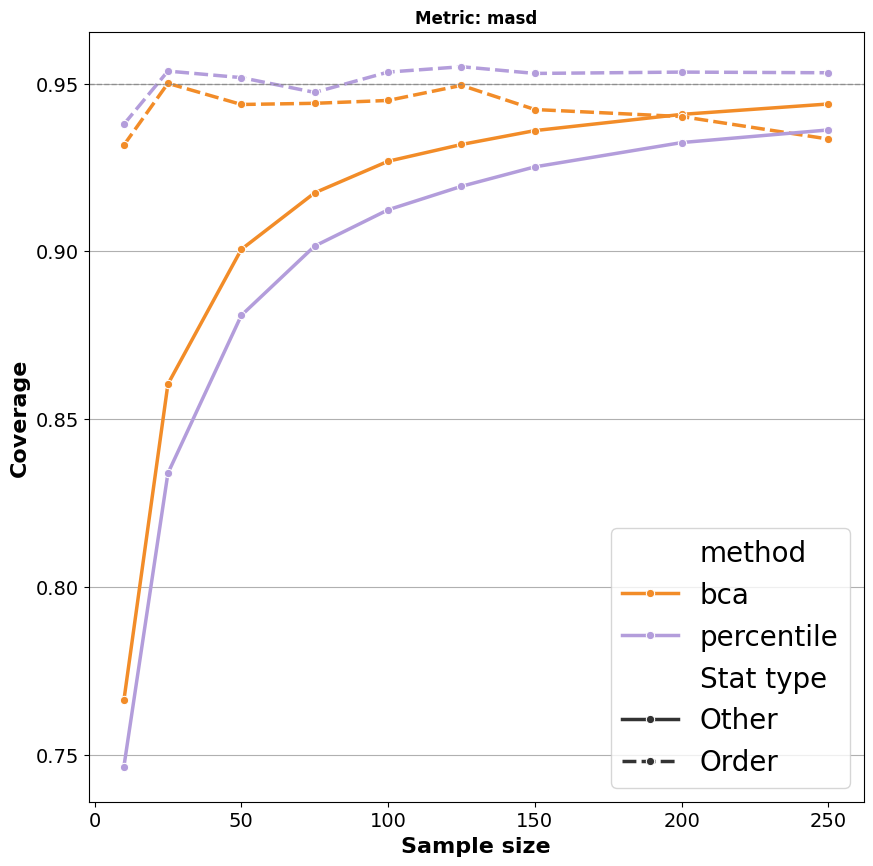

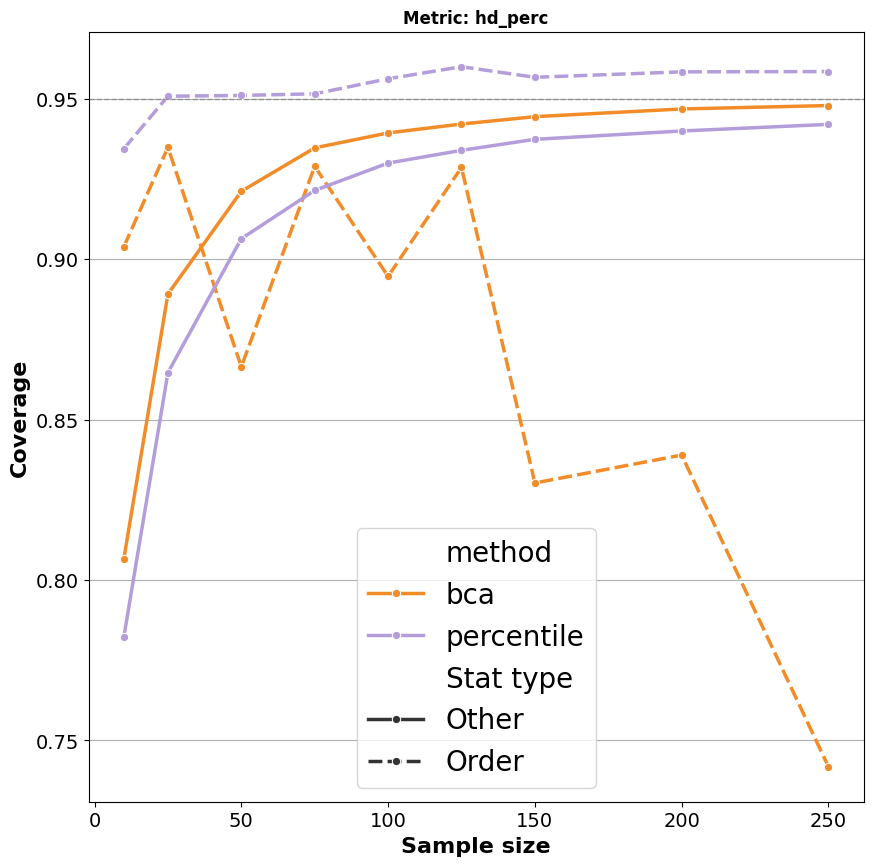

In [39]:

method_colors = {
    'Basic': '#e26b5b',
    'percentile': '#b39ddb',
    'bca': '#f28c28',
    'Parametric t': '#9e9e9e',
    'Parametric z': '#90caf9'
}
# palette_order = sns.color_palette("Reds",2)
# color_dict_order = dict(zip(['iqr_length','median'], palette_order))
# palette_other = sns.color_palette("Blues",3)
# color_dict_other = dict(zip(['mean', 'std', 'trimmed_mean'], palette_other))
metrics = CI_segm['metric'].unique()
# Identify all columns except 'stat' and 'median'
other_cols = [c for c in CI_segm.columns if c not in ["stat", "median"]]

# --- Order stats ---
data_order = CI_segm[CI_segm['stat'].isin(['median', 'iqr_length'])]
avg_by_stat_order = (
    data_order.groupby(other_cols, as_index=False)["median"].mean()
)
avg_by_stat_order["Stat type"] = "Order"

# --- Other stats ---
data_other = CI_segm[CI_segm['stat'].isin(['mean', 'std', 'trimmed_mean'])]
avg_by_stat_other = (
    data_other.groupby(other_cols, as_index=False)["median"].mean()
)
avg_by_stat_other["Stat type"] = "Other"

# --- Combine ---
df_all = pd.concat([avg_by_stat_other, avg_by_stat_order], ignore_index=True)

print(df_all)


for metric in metrics:
    df_all_metric=df_all[df_all['metric']==metric]
    data_method=df_all_metric[df_all_metric['method'].isin(['bca', 'percentile'])]
    fig, ax = plt.subplots(1, 1, figsize=(10, 10), sharey=True)


# Other plot
    sns.lineplot(
        data=data_method,
        x='n', y='median', hue='method',
        marker='o', palette=method_colors, ax=ax, linewidth=2.5,  style='Stat type', errorbar=None
    )

    ax.axhline(0.95, linestyle='--', color='gray', linewidth=1, alpha=0.7)
    ax.set_title(f'Metric: {metric}', weight='bold')
    ax.set_xlabel('Sample size',weight='bold', fontsize=16)
    ax.set_ylabel('Coverage', weight='bold', fontsize=16)
    ax.tick_params(axis='y', labelsize=14)
    ax.tick_params(axis='x', labelsize=14)

    ax.grid(True, axis='y')

    ax.legend(prop={'weight':'bold'}, fontsize= 20)
    plt.legend(fontsize= 20)

    plt.savefig(f"../../journal paper plots/segmentation/message 3 stats/fail_bca_{metric}.pdf") # leave room for suptitle
    plt.show()


# Fail basic

### Plot the median coverage of all methods for each couple metric, stat

/var/folders/4w/1glyl09x27jfg8kpgbdzrwv40000gp/T/ipykernel_24554/4105594324.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(10, 10), sharey=True)


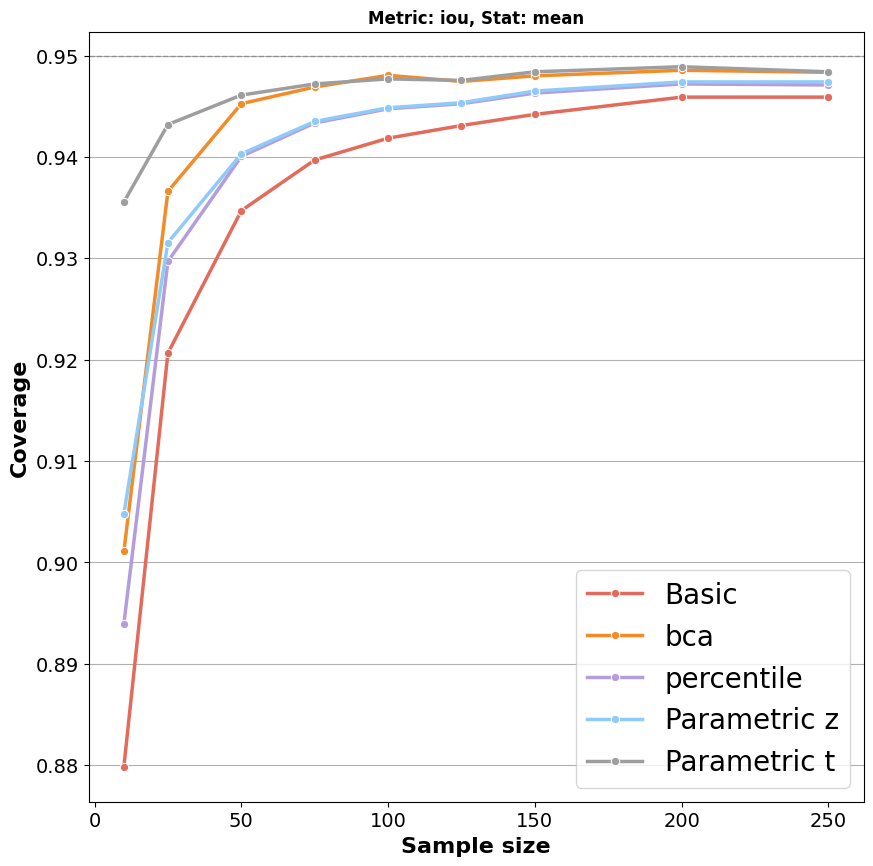

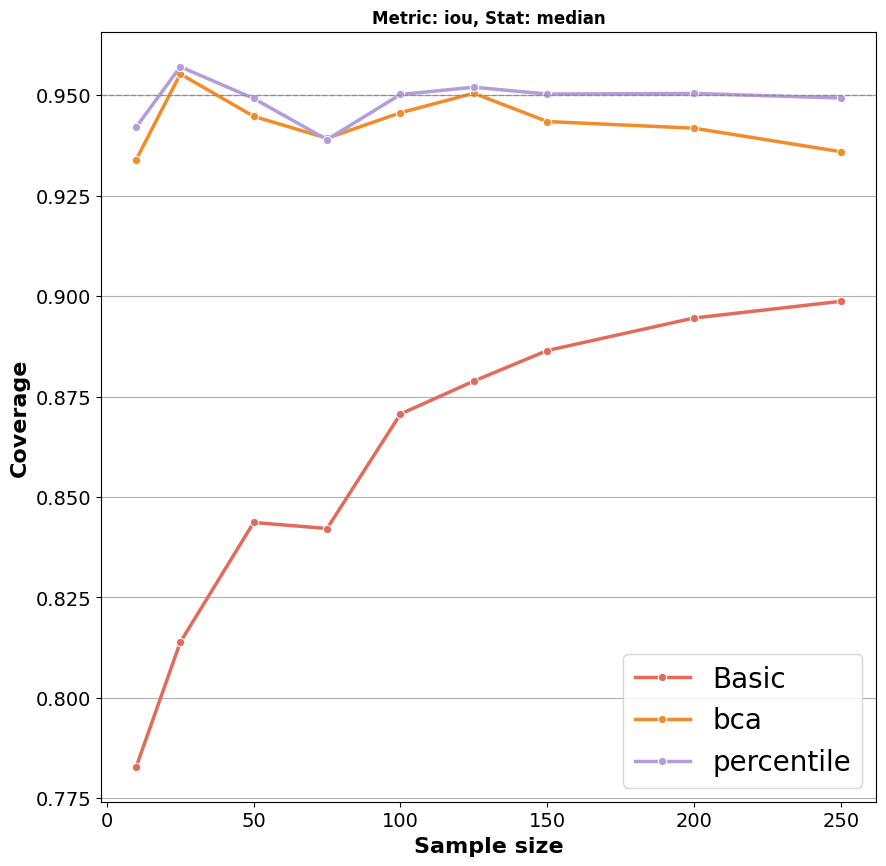

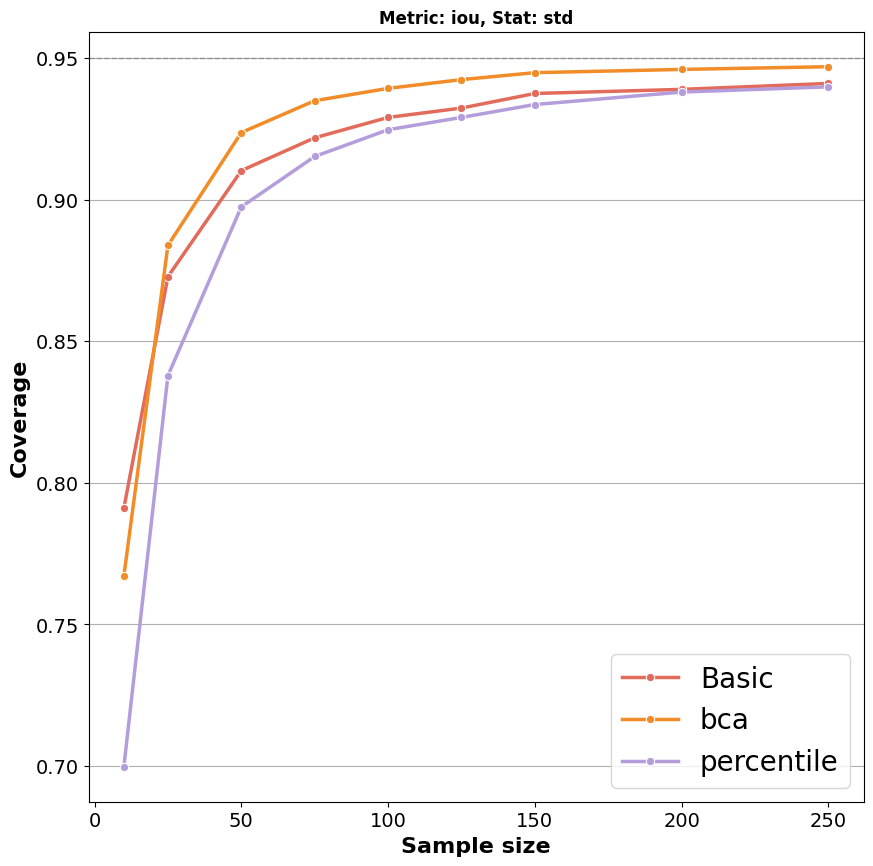

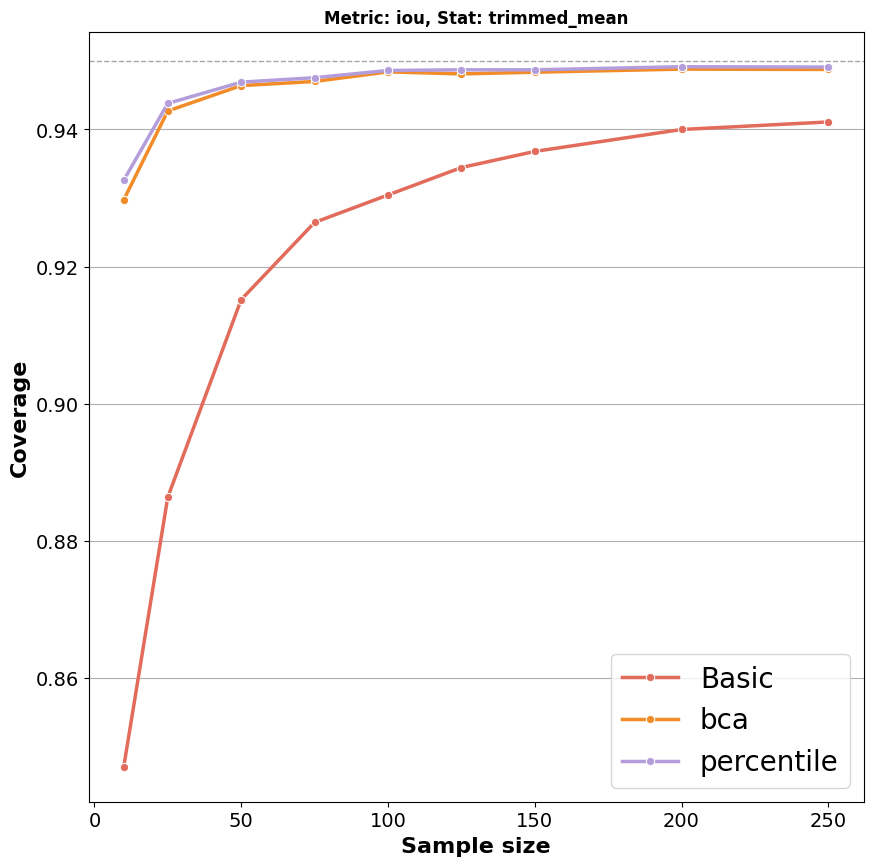

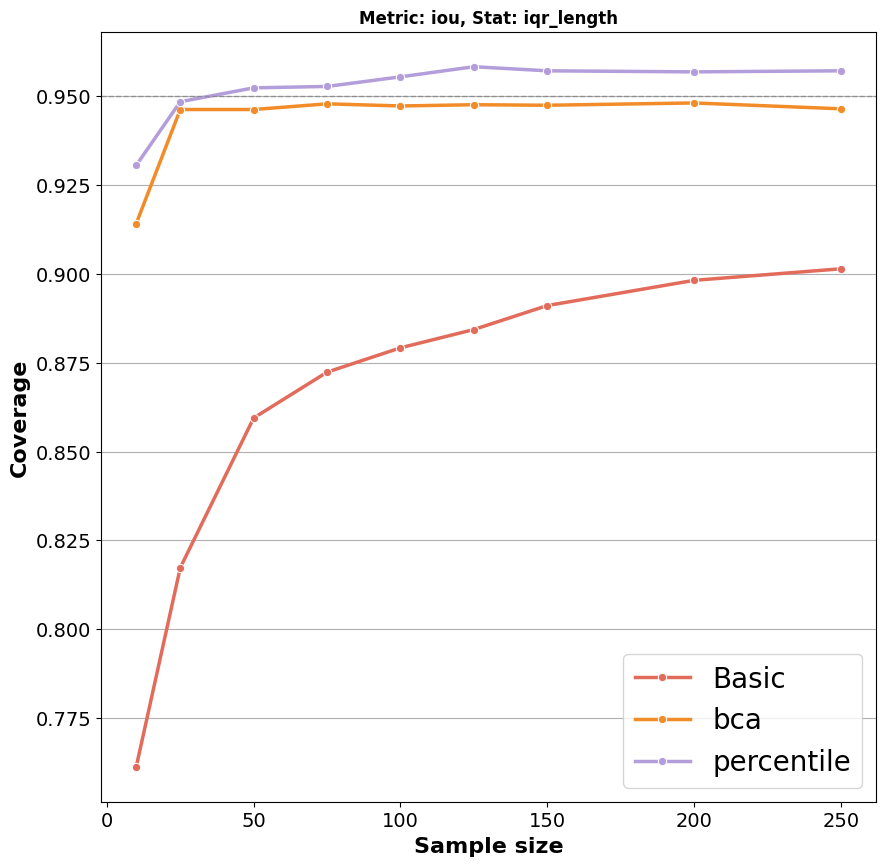

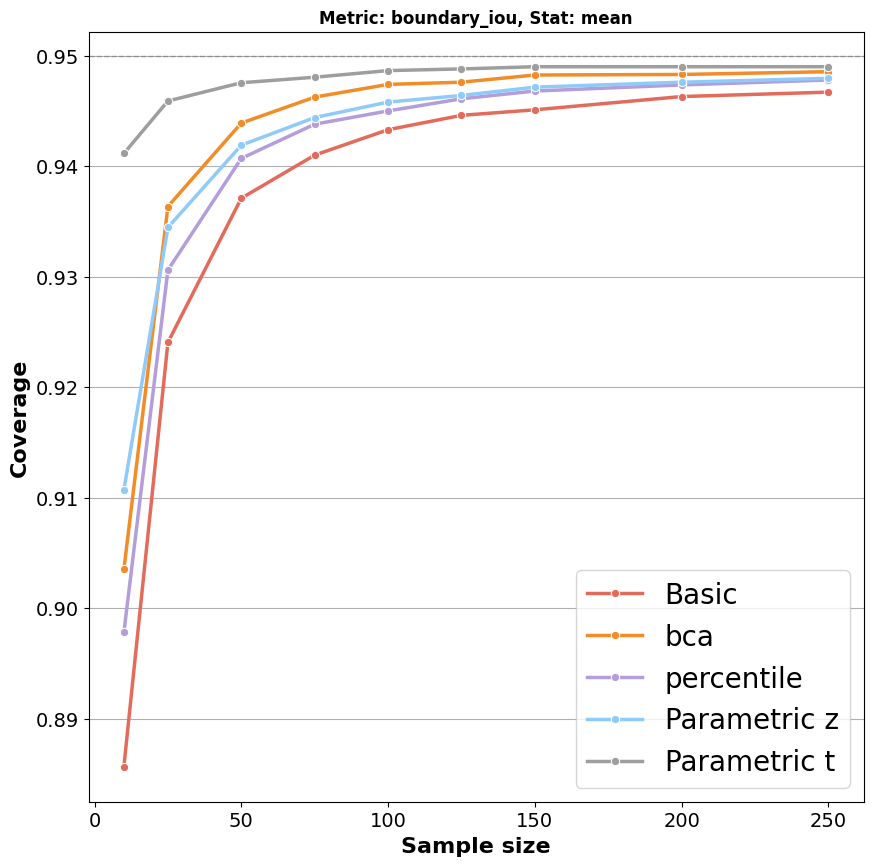

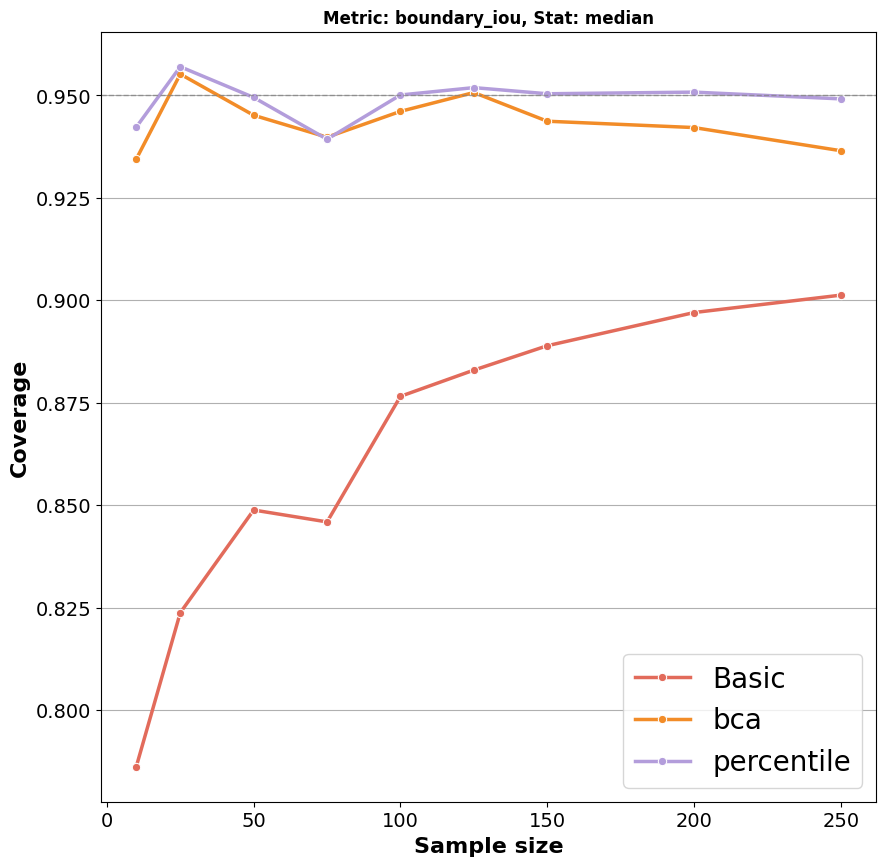

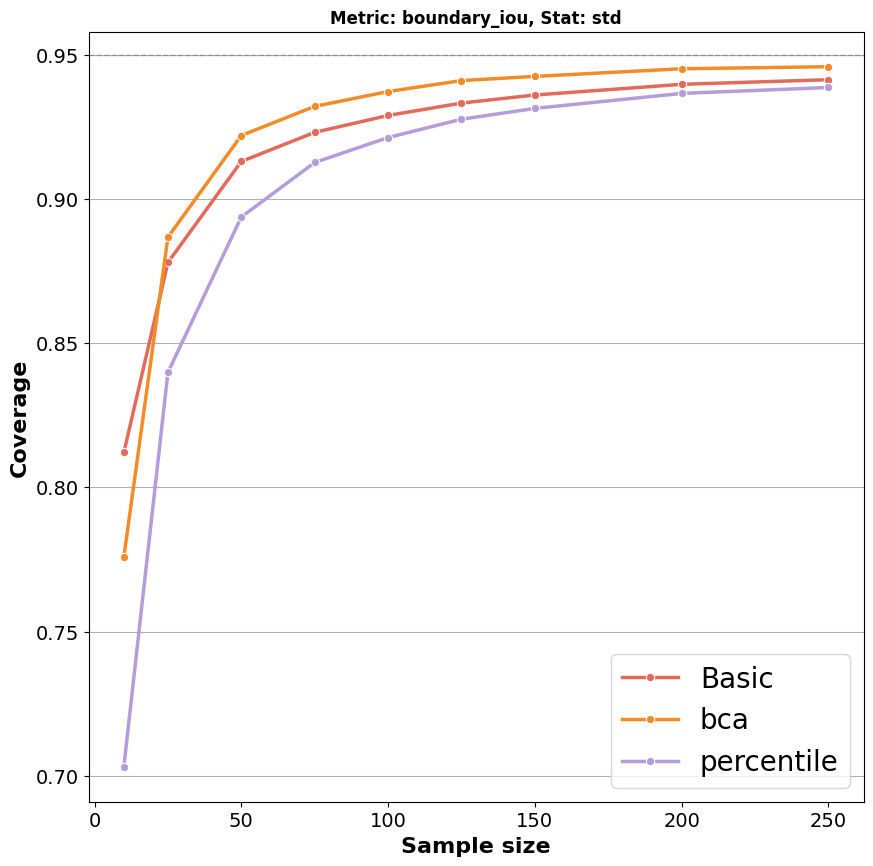

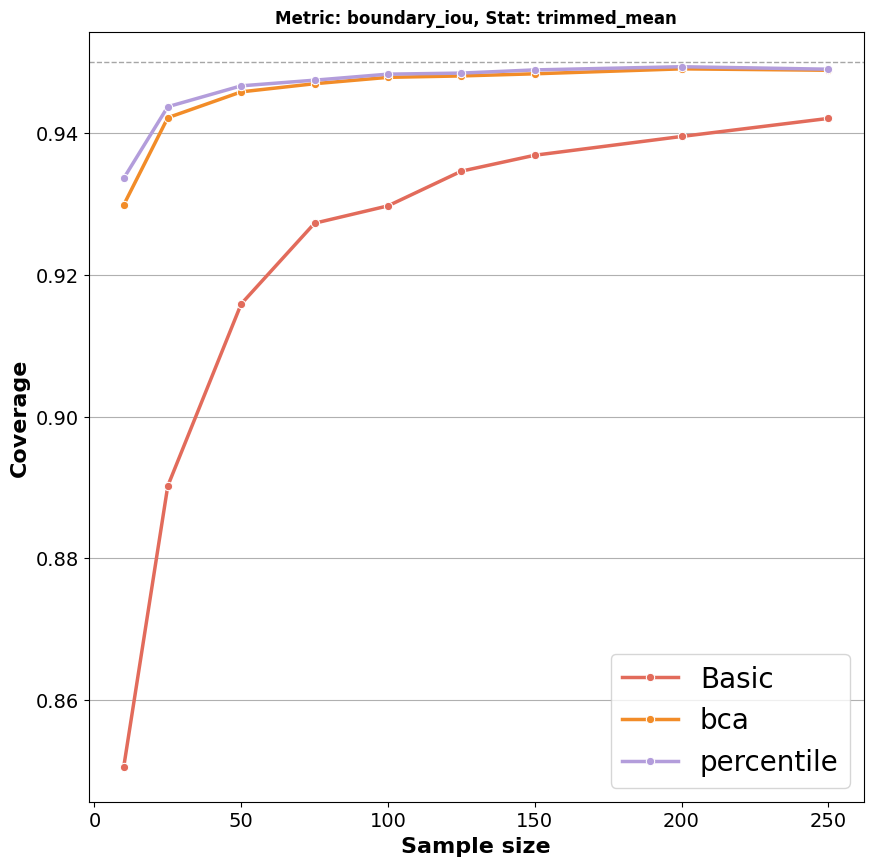

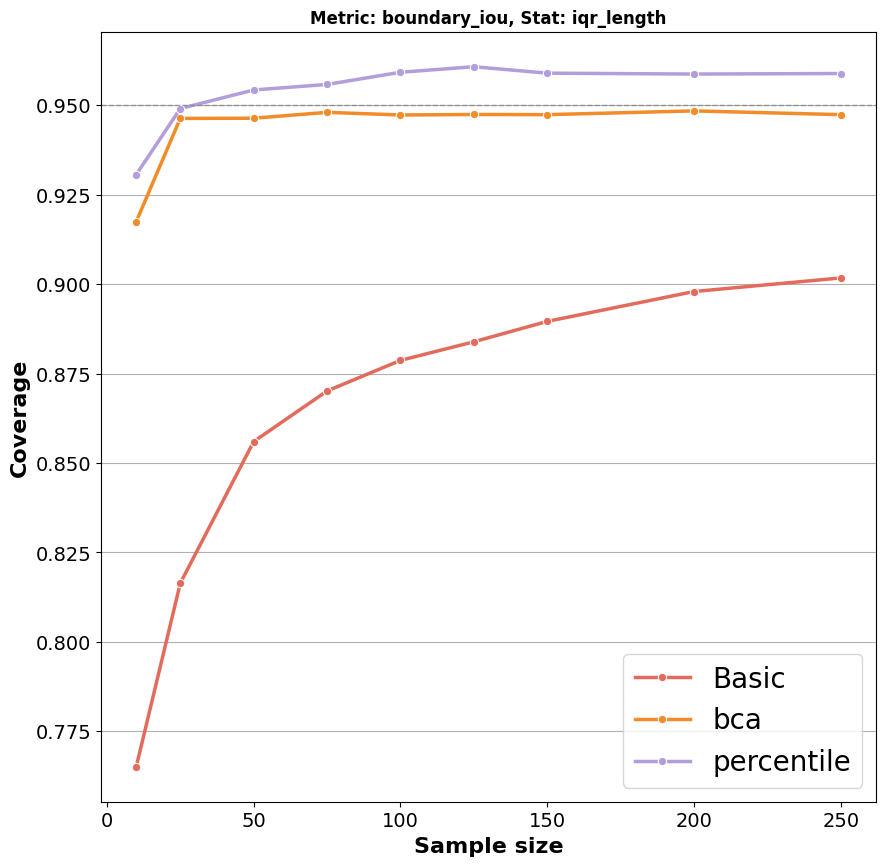

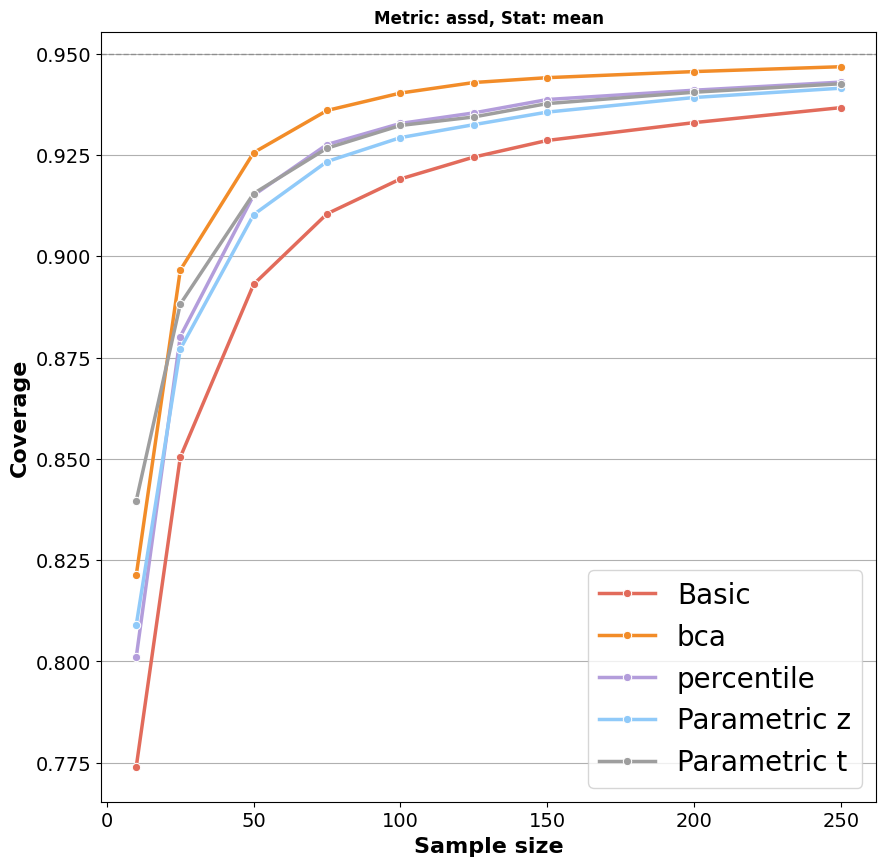

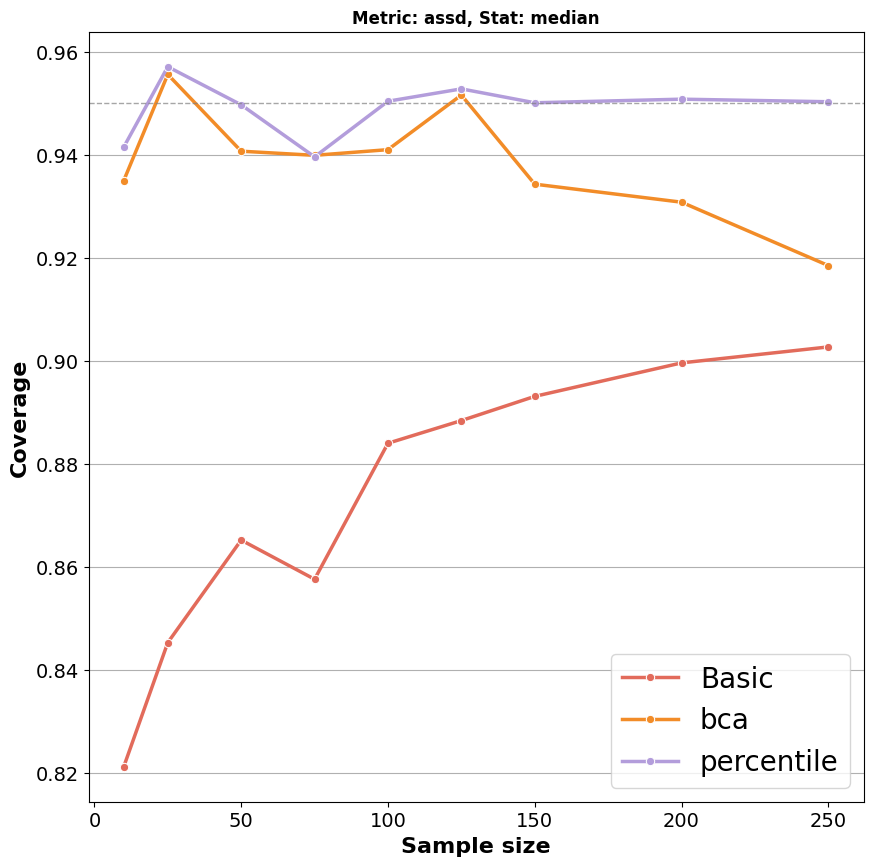

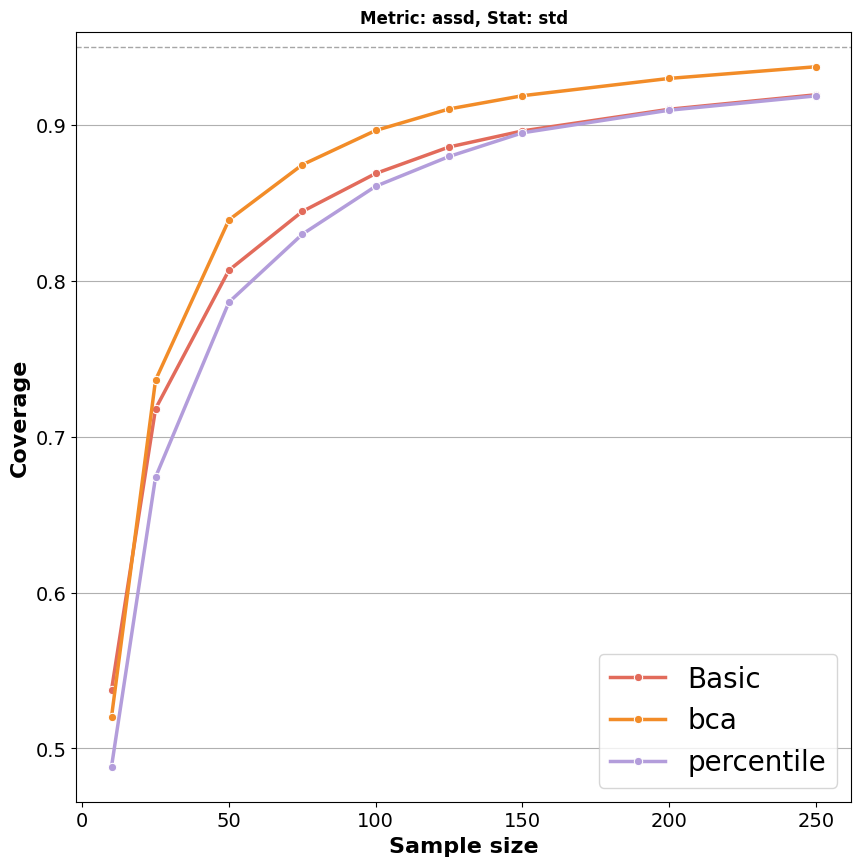

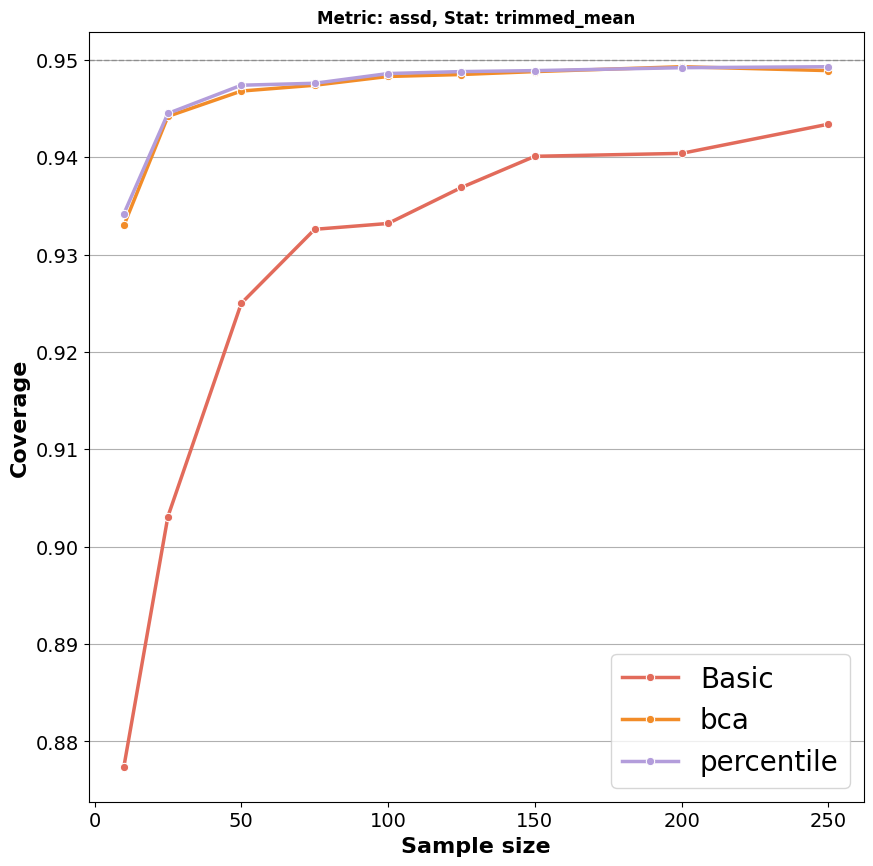

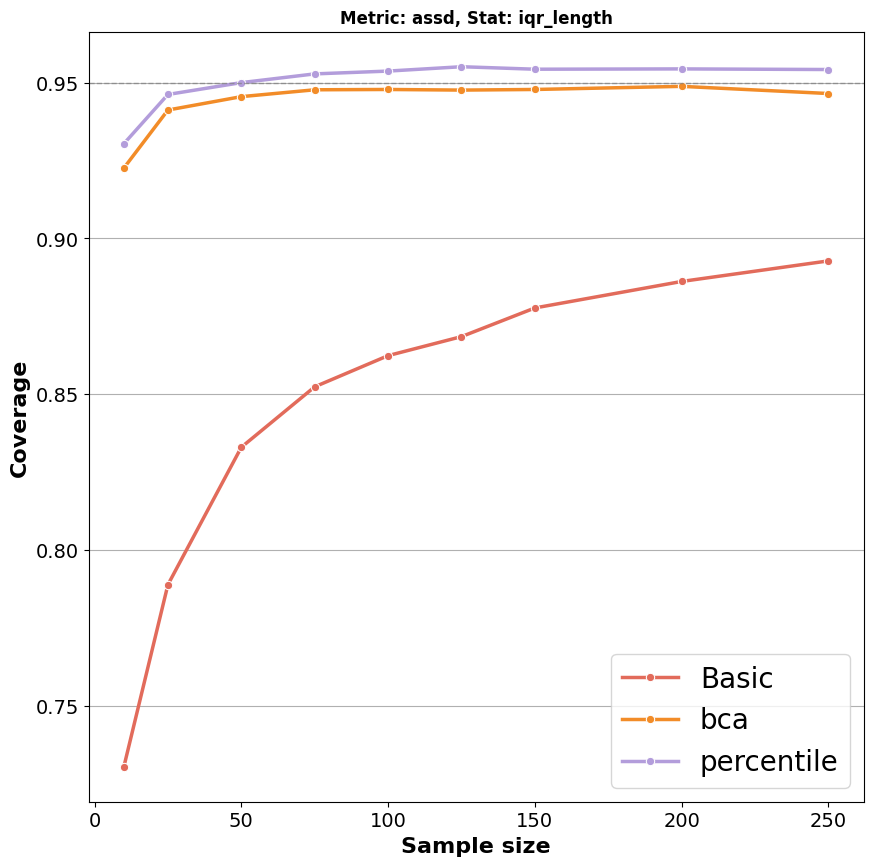

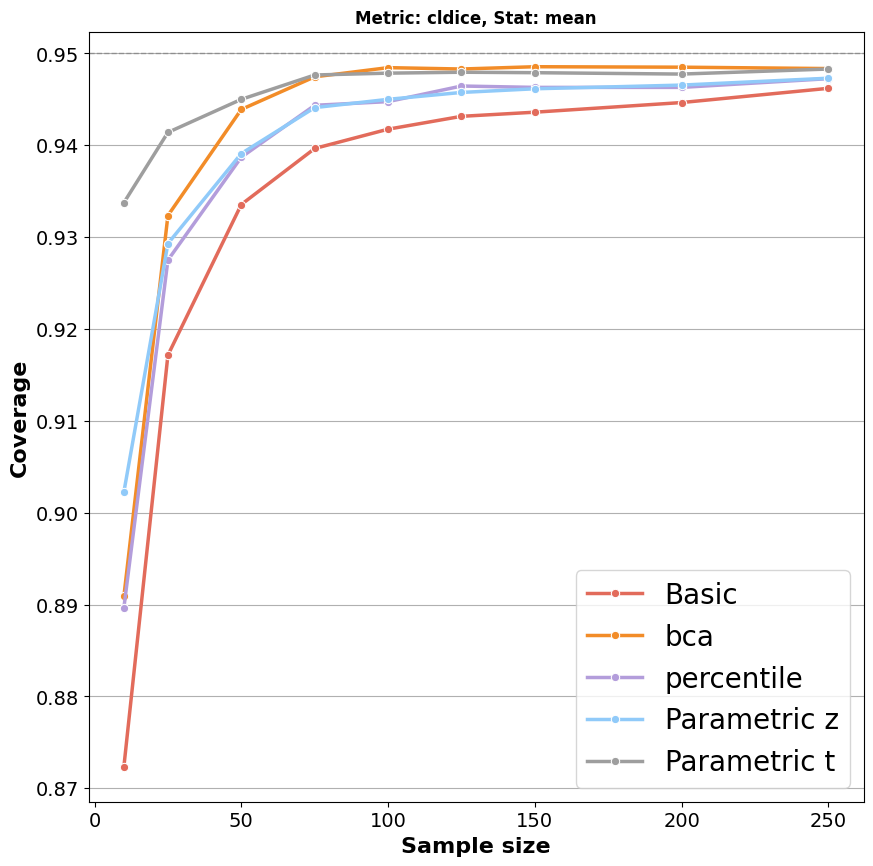

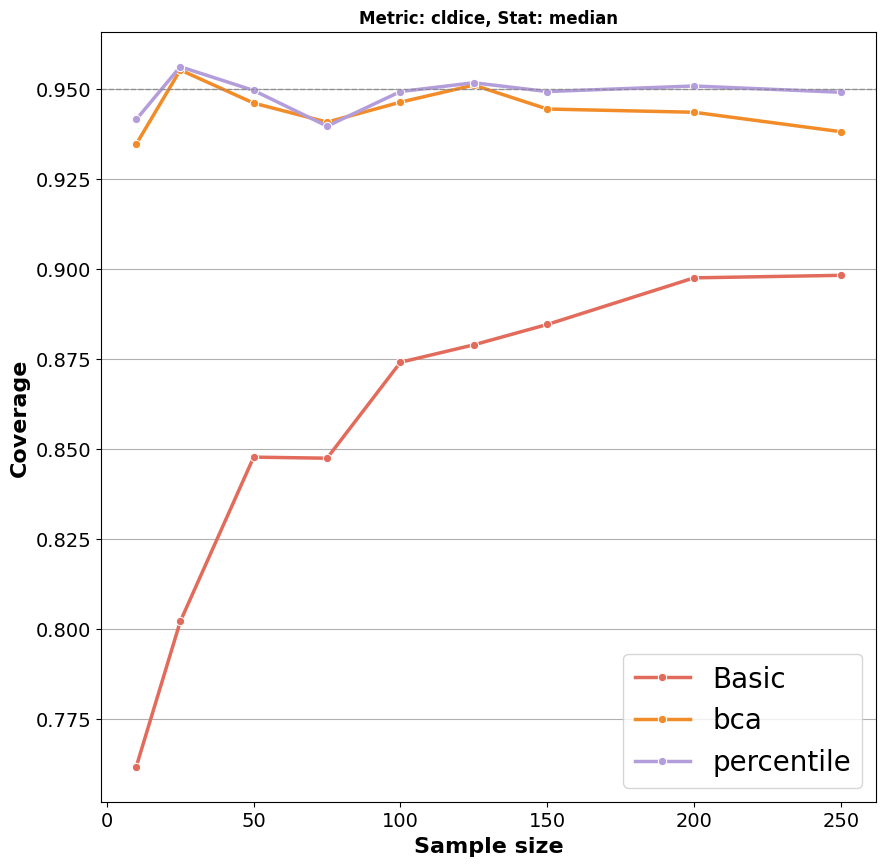

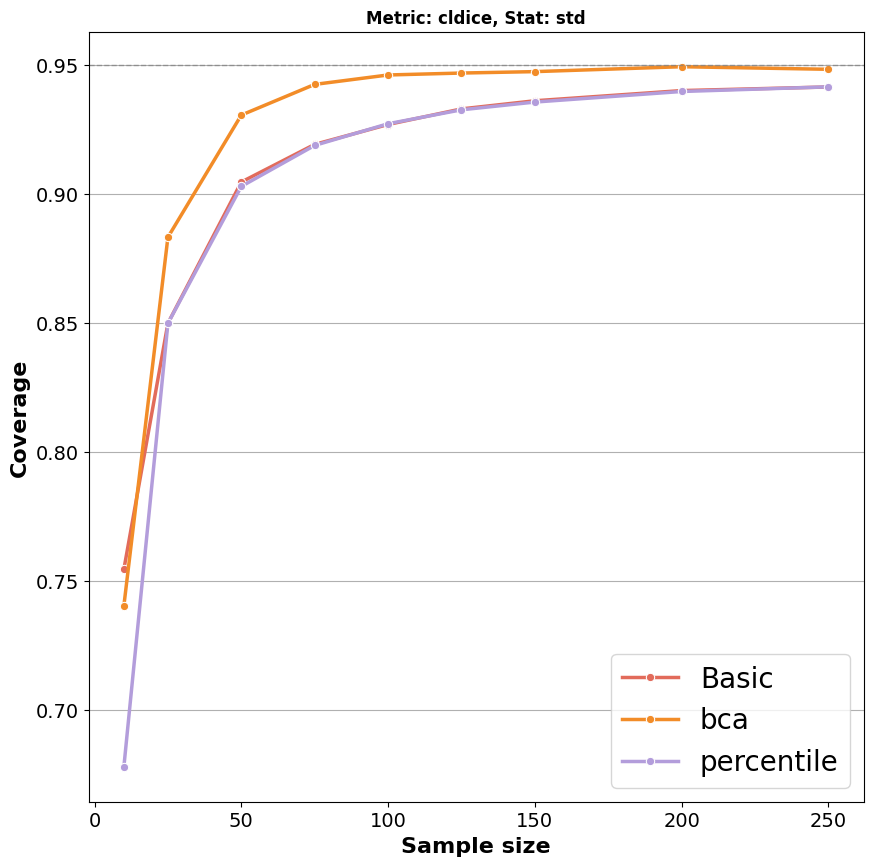

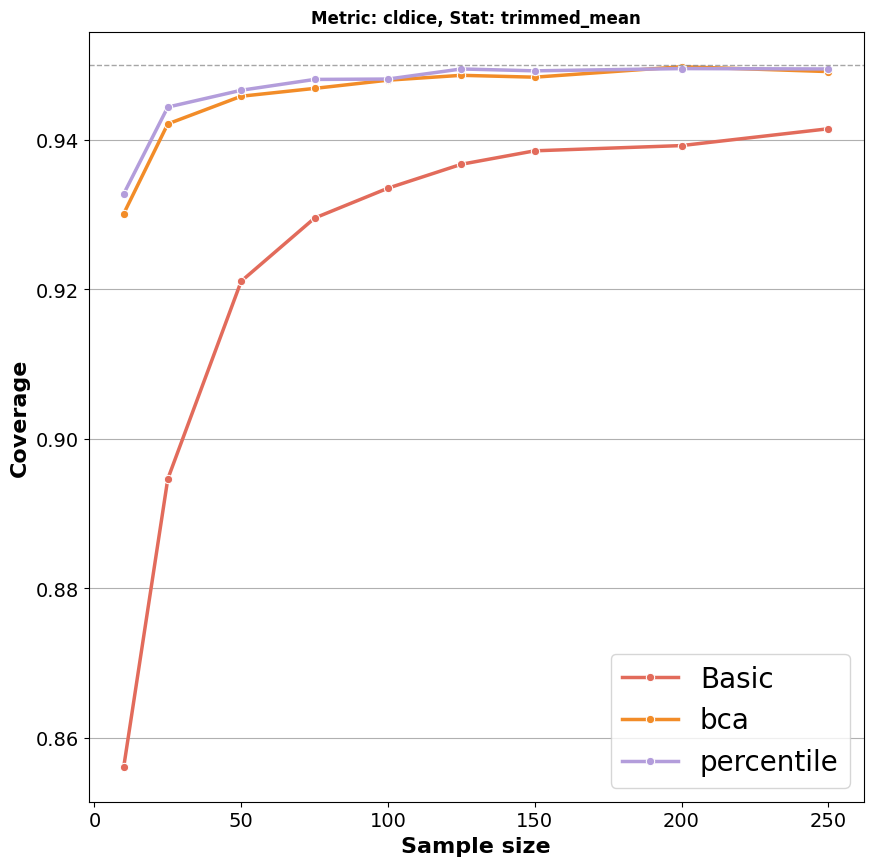

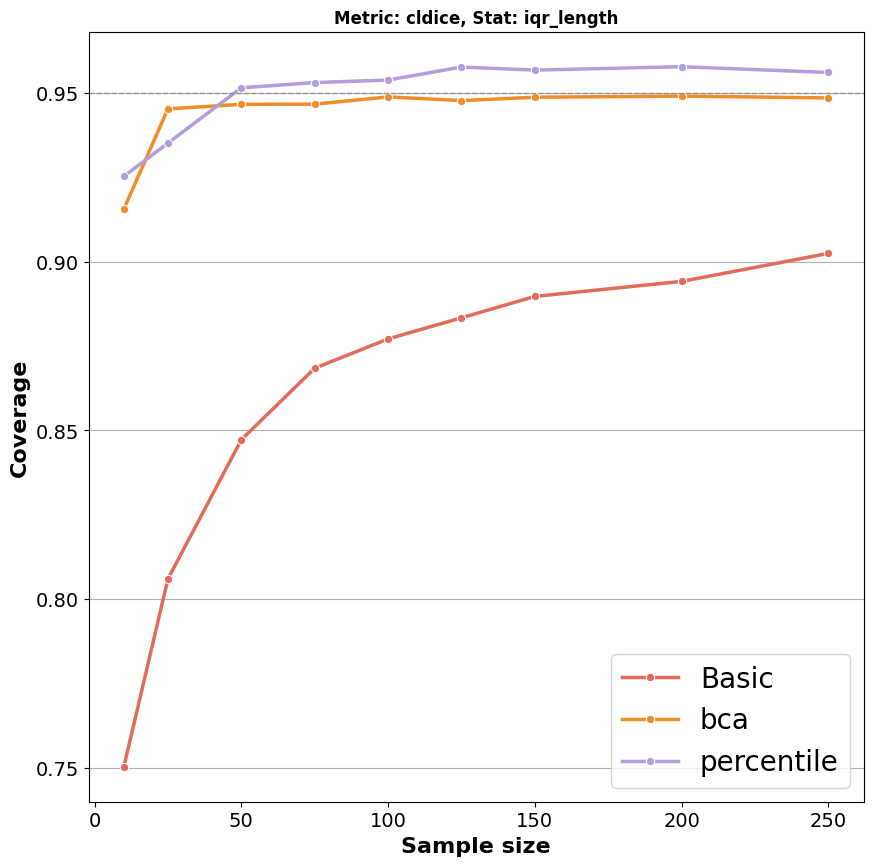

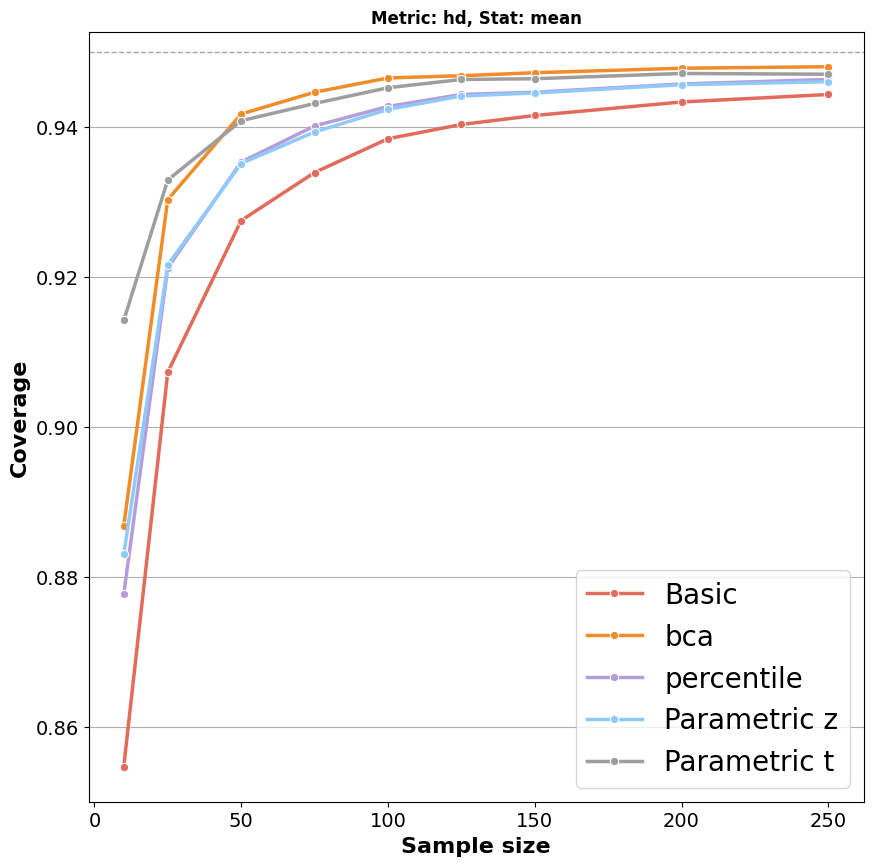

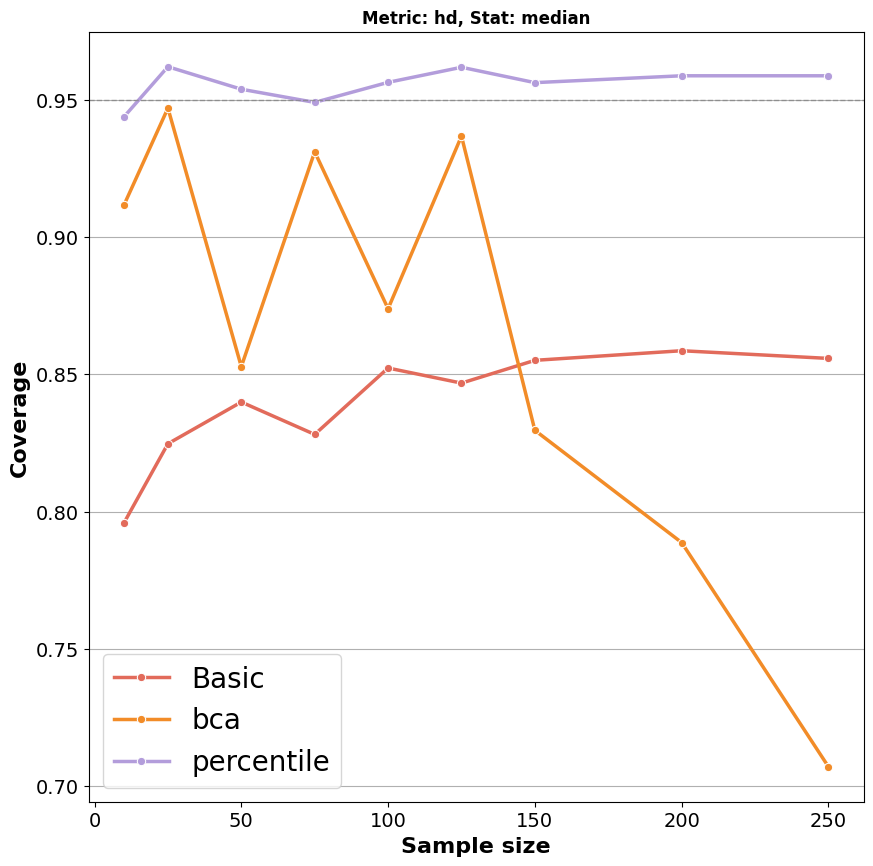

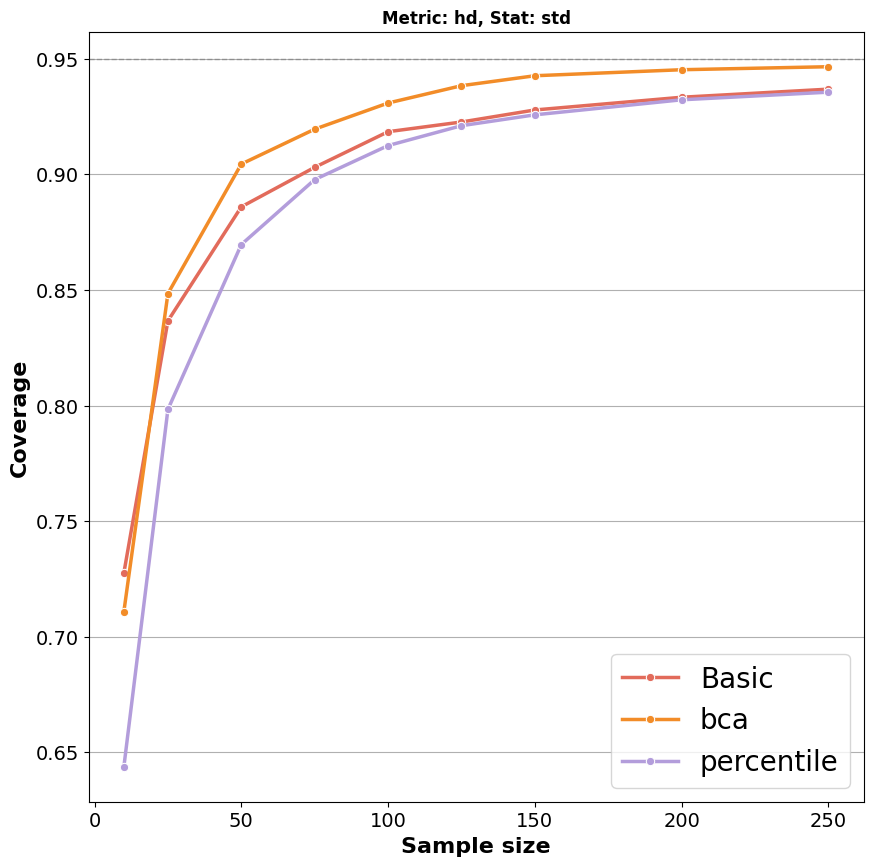

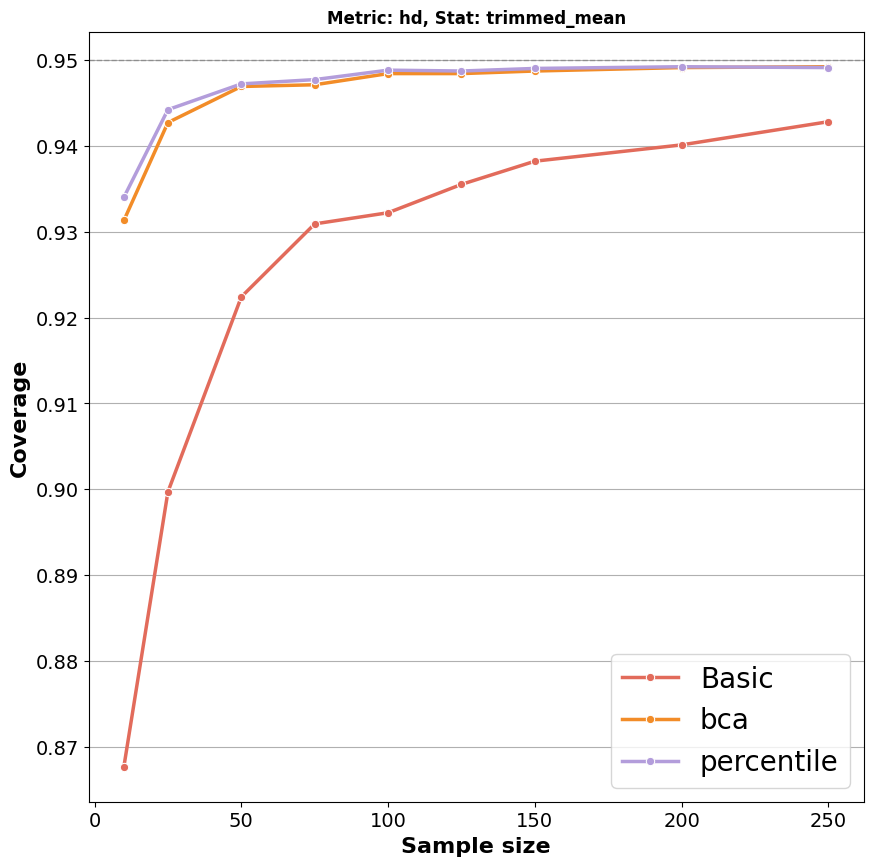

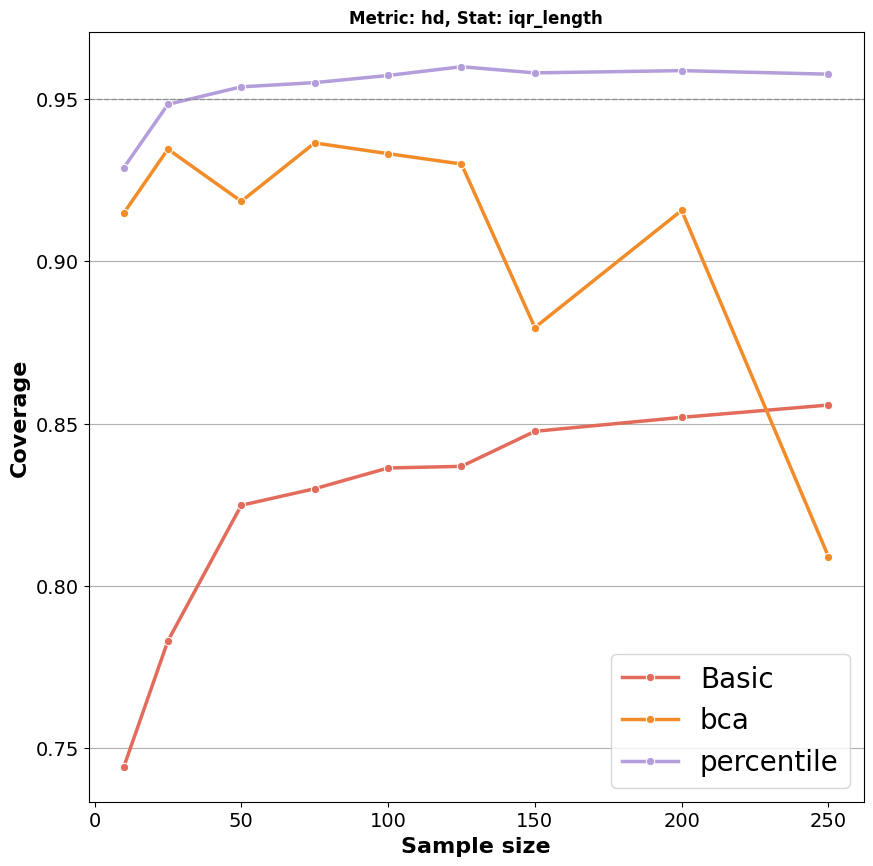

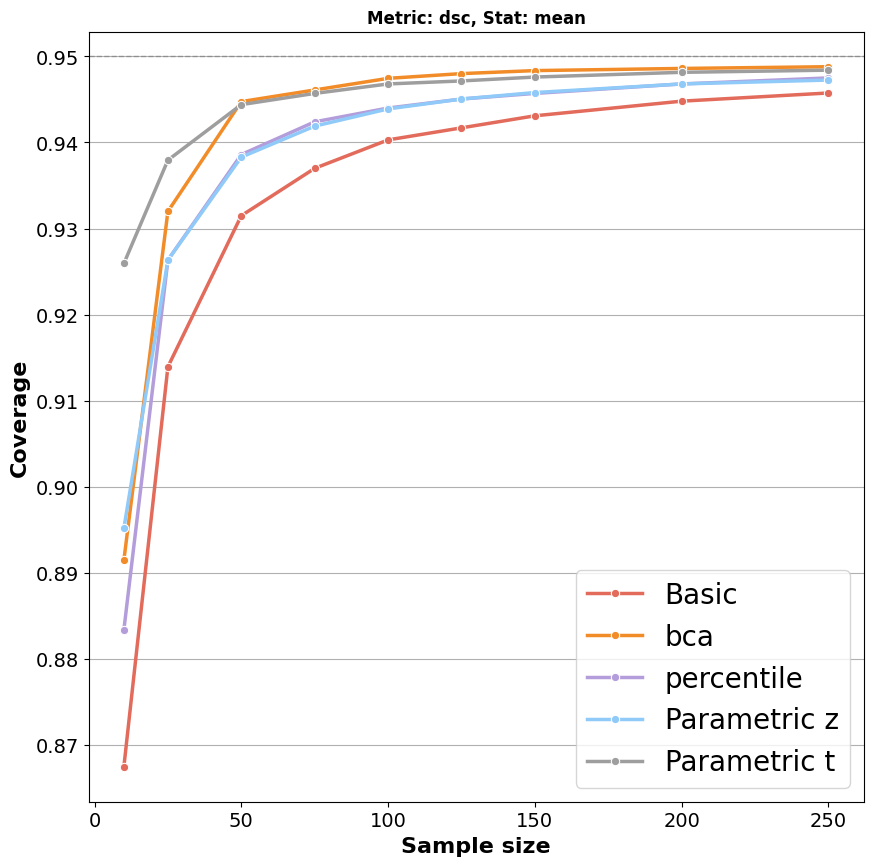

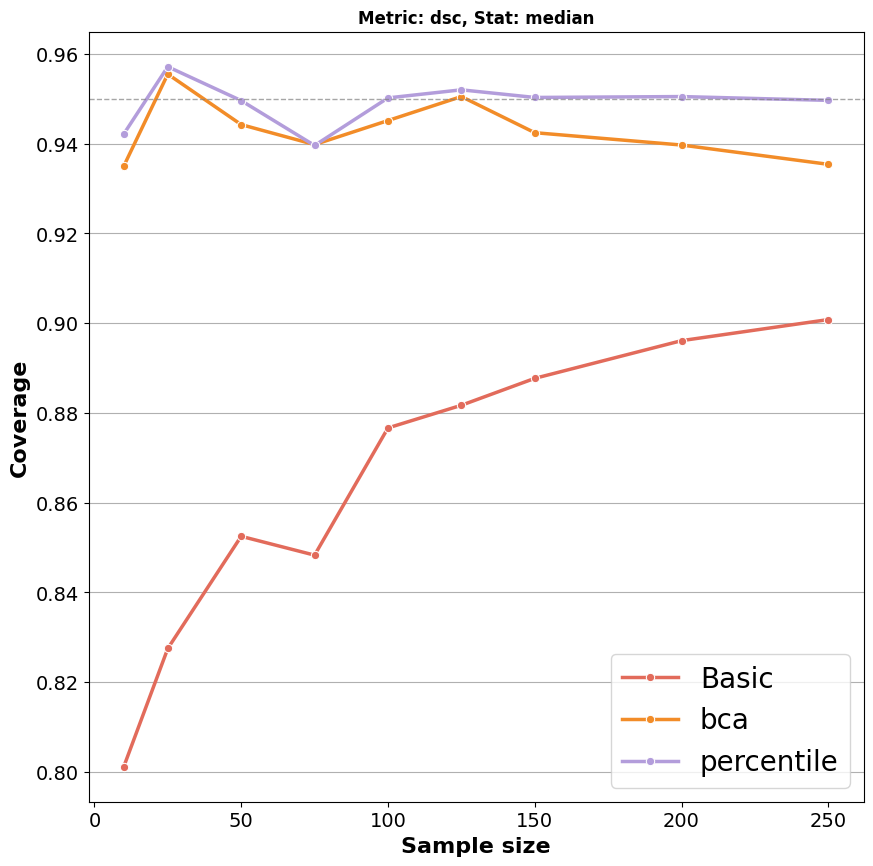

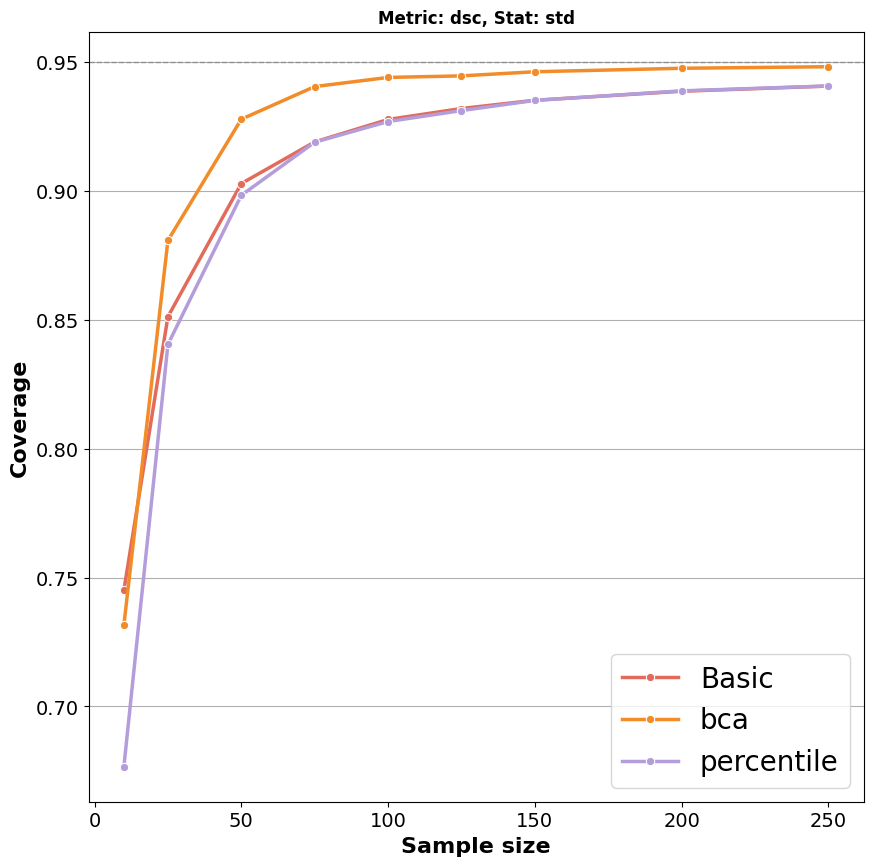

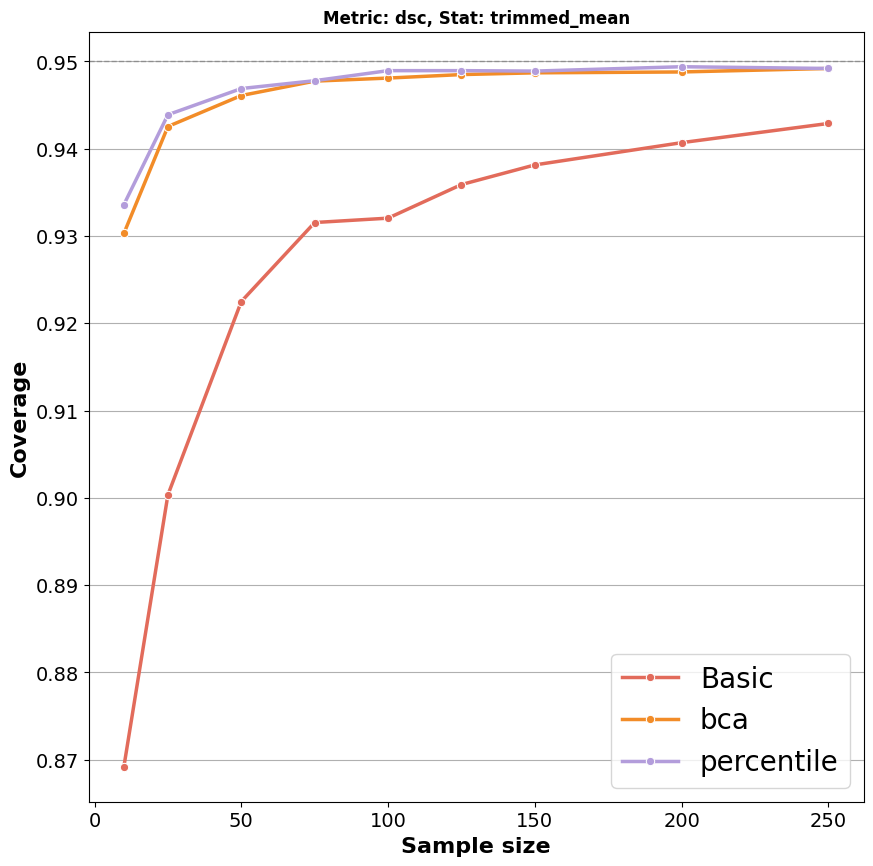

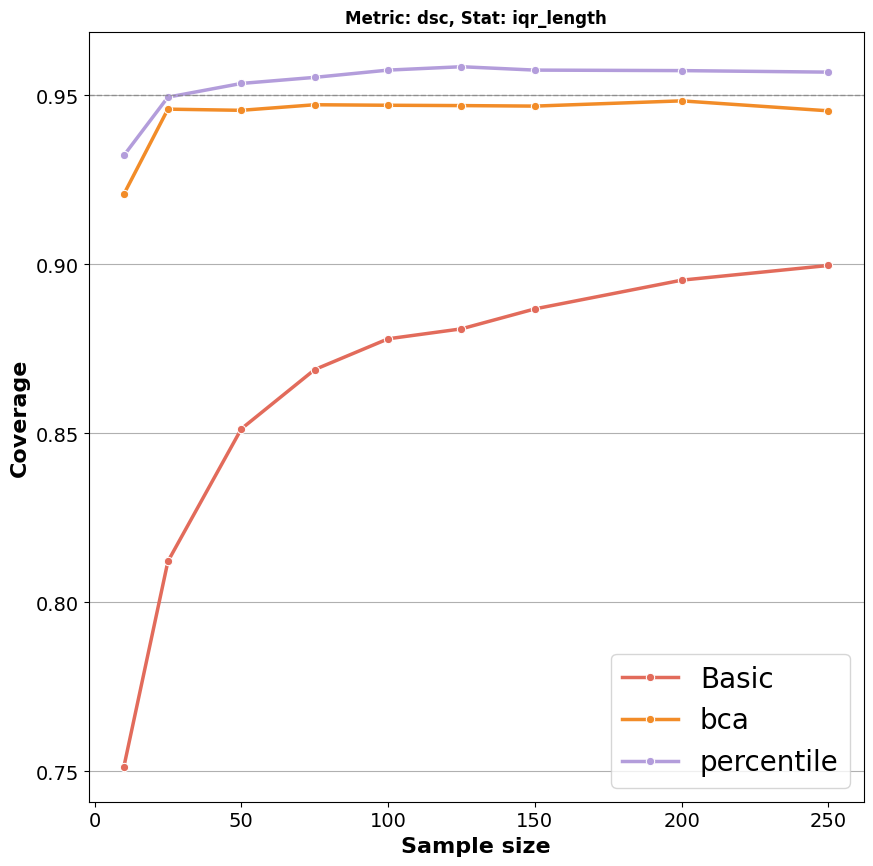

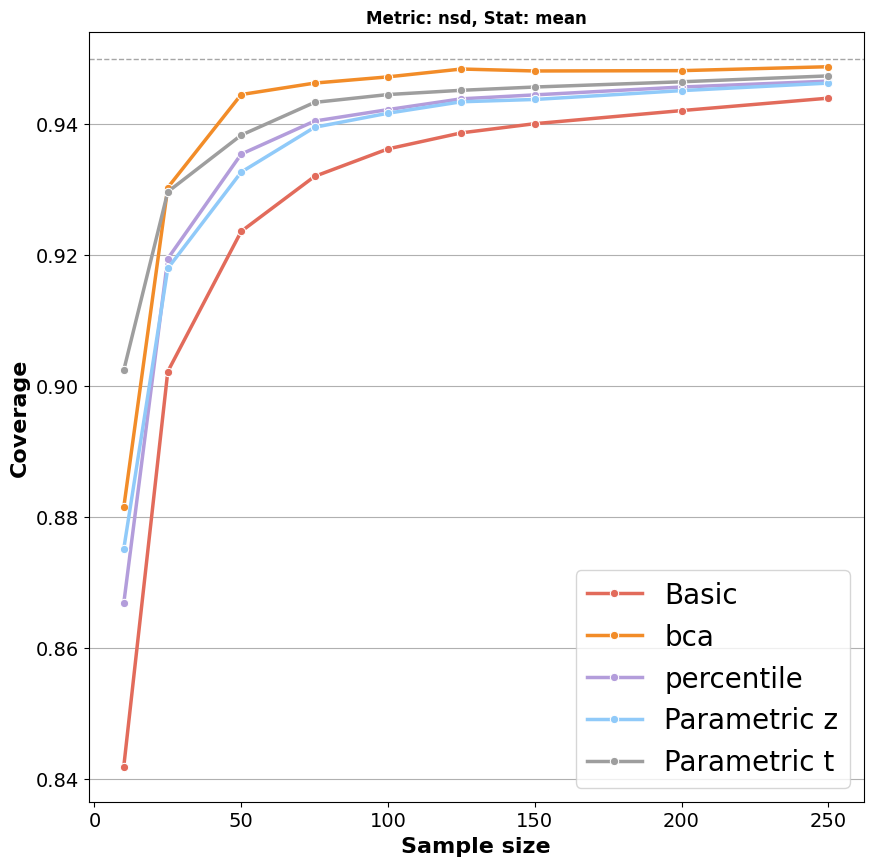

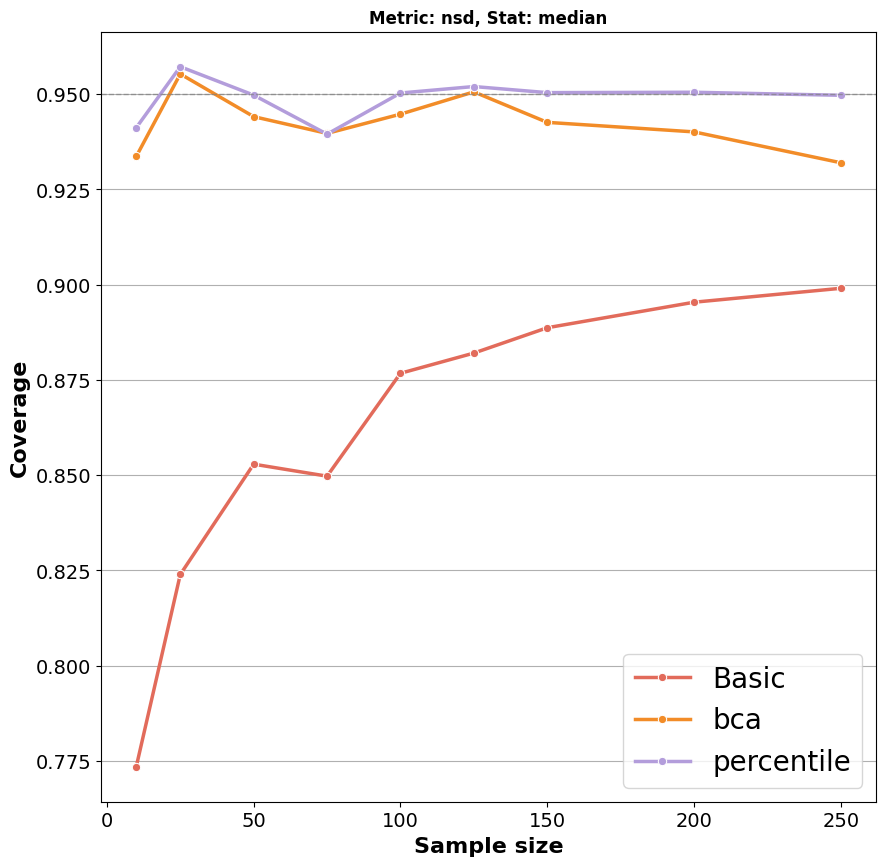

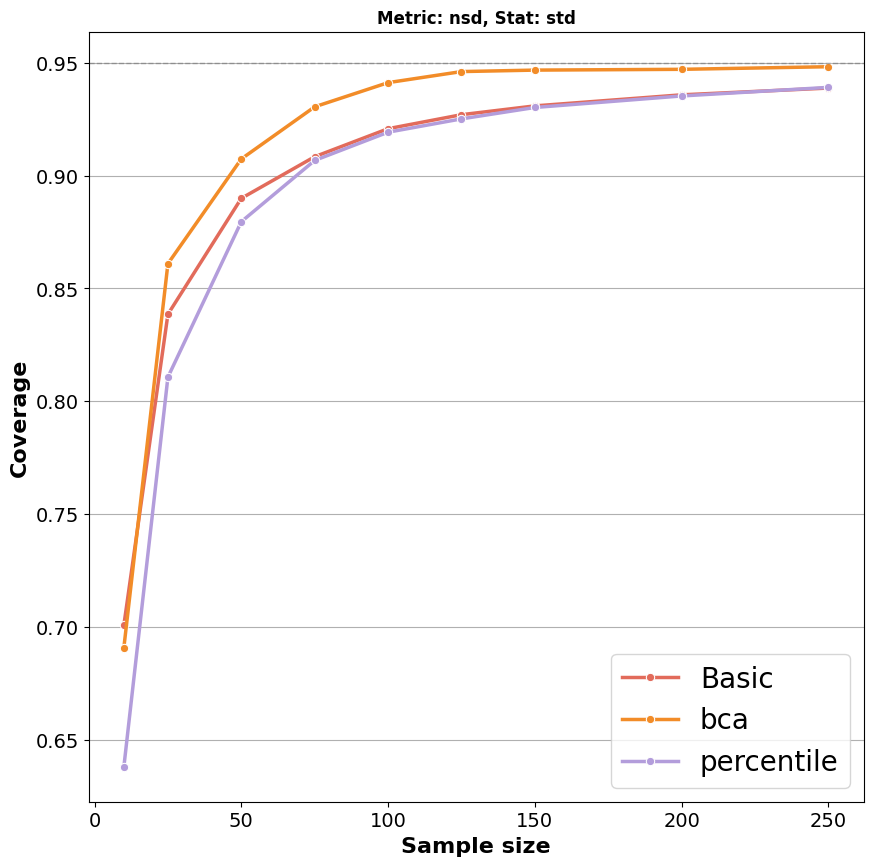

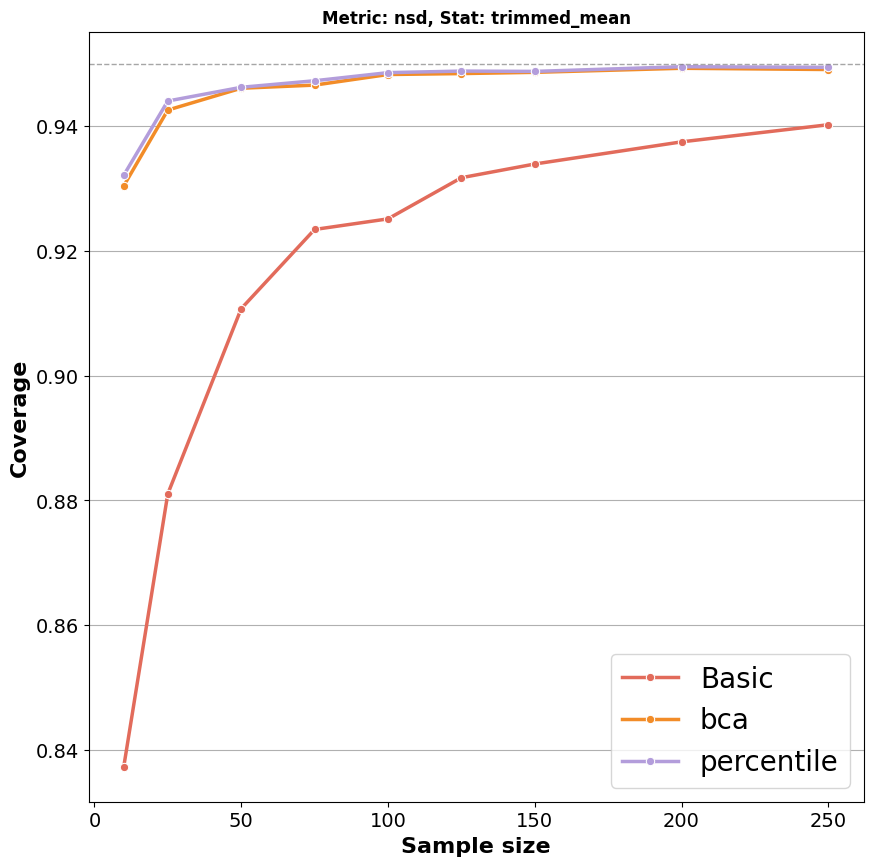

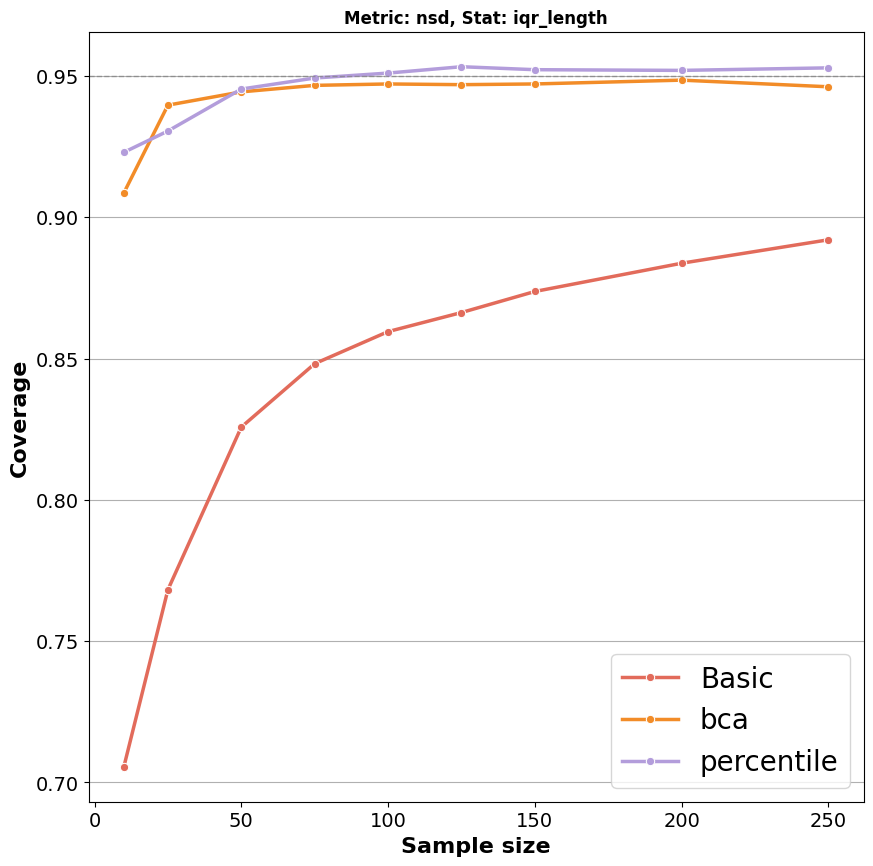

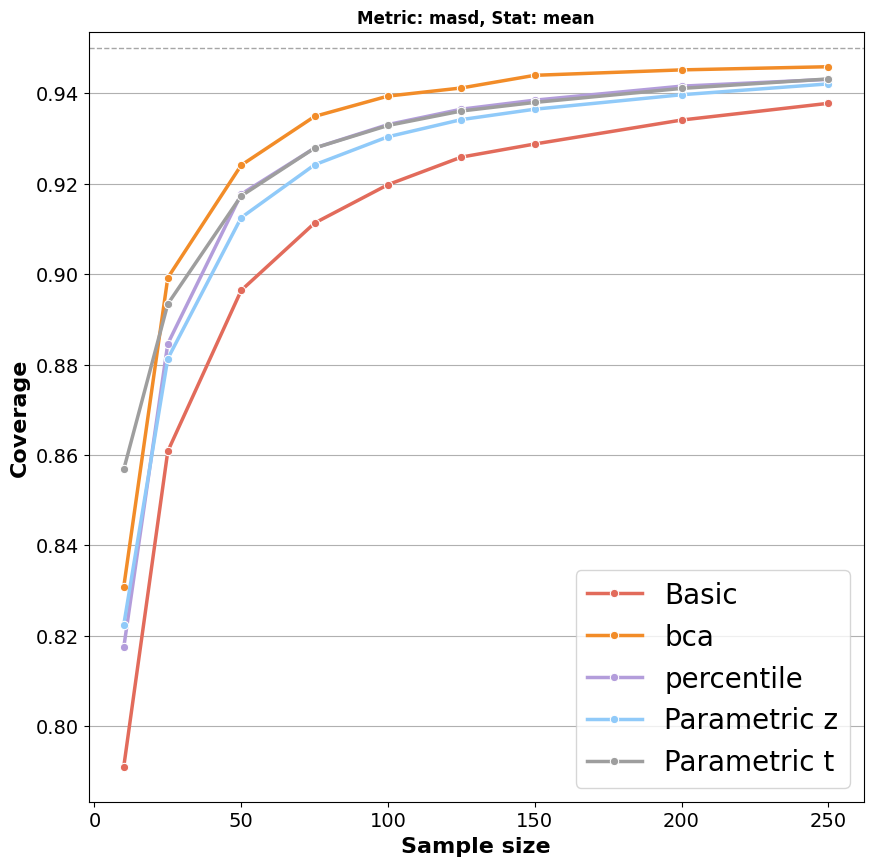

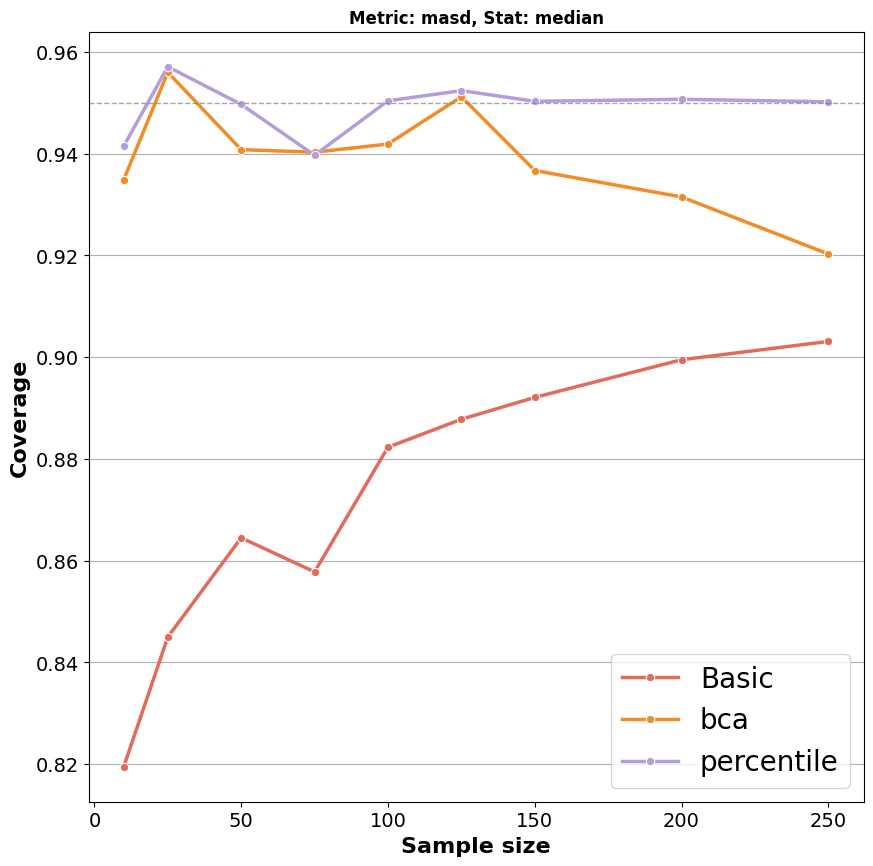

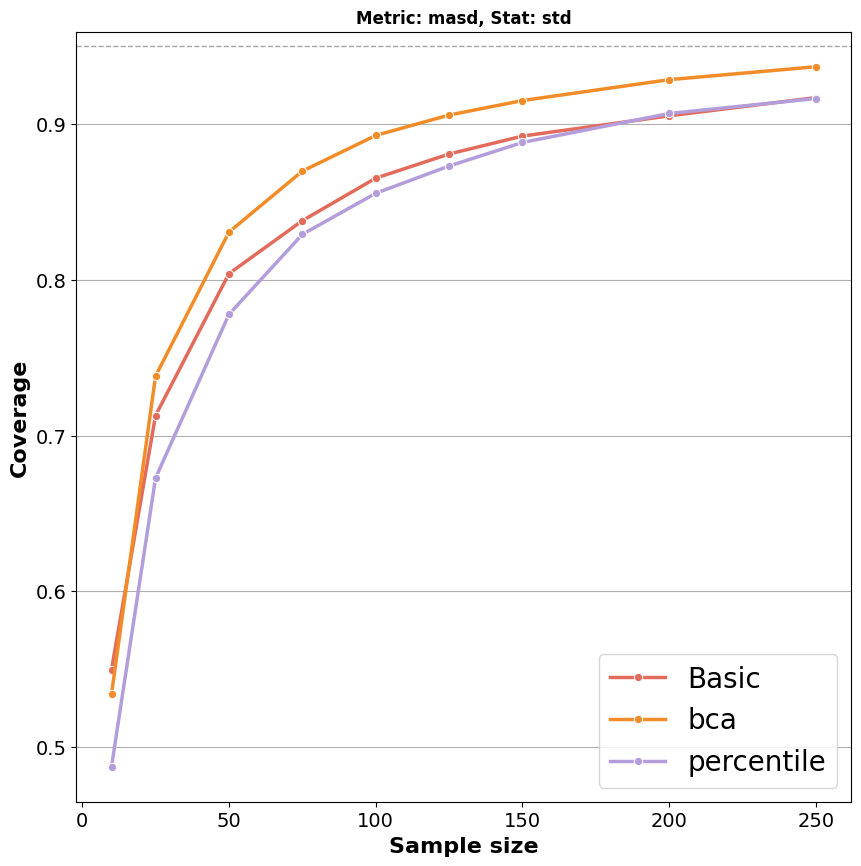

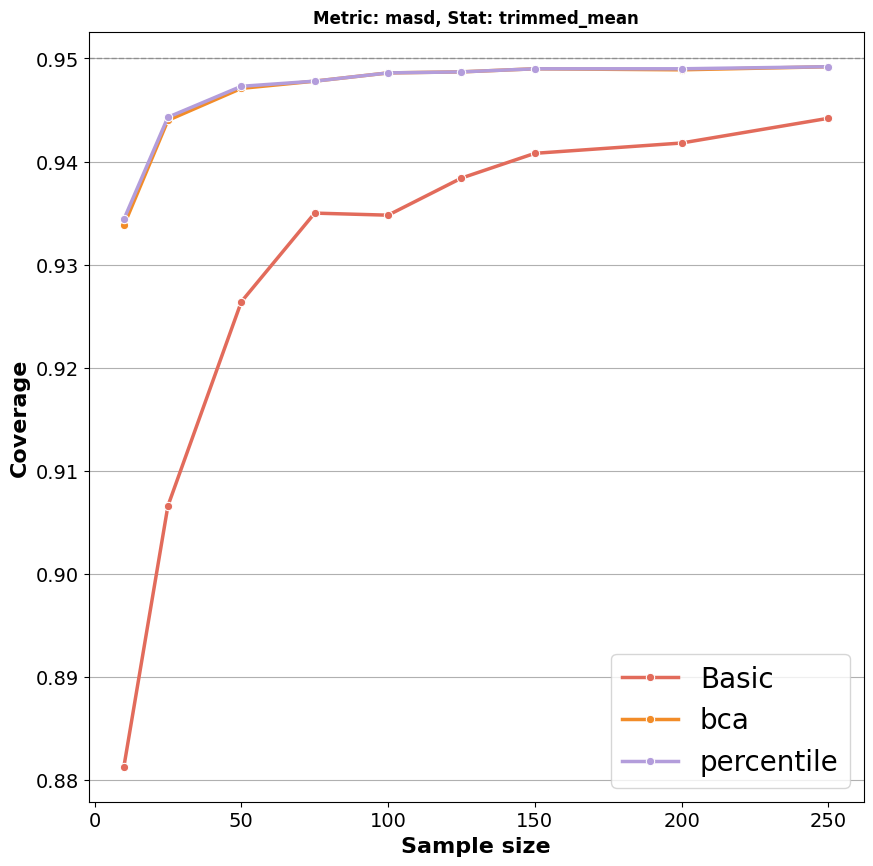

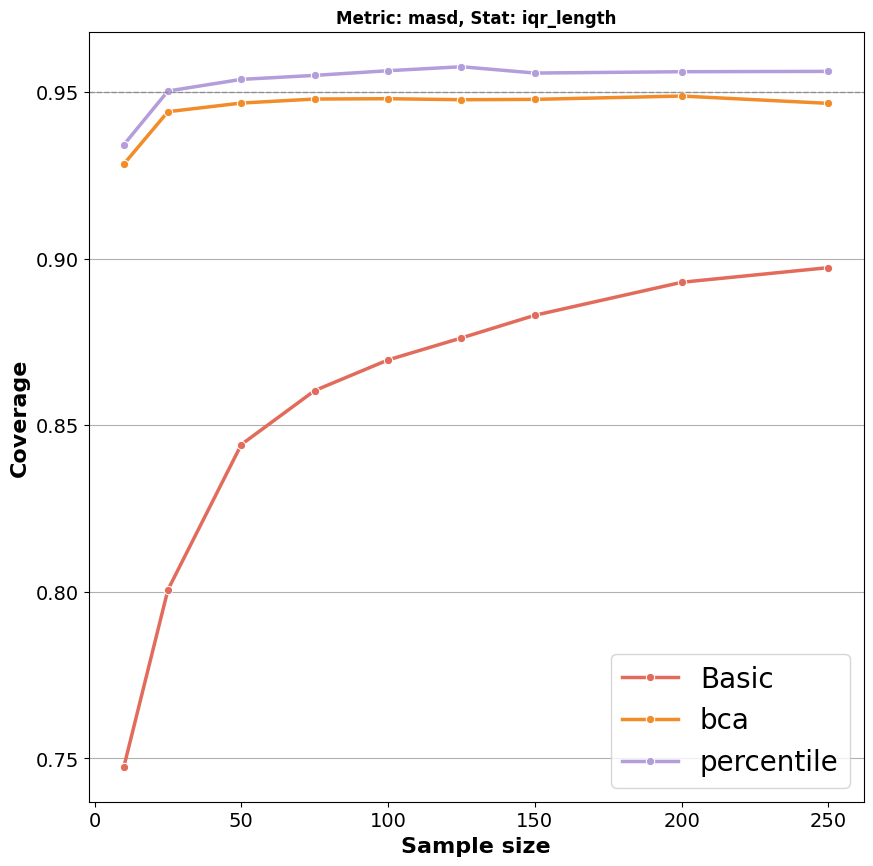

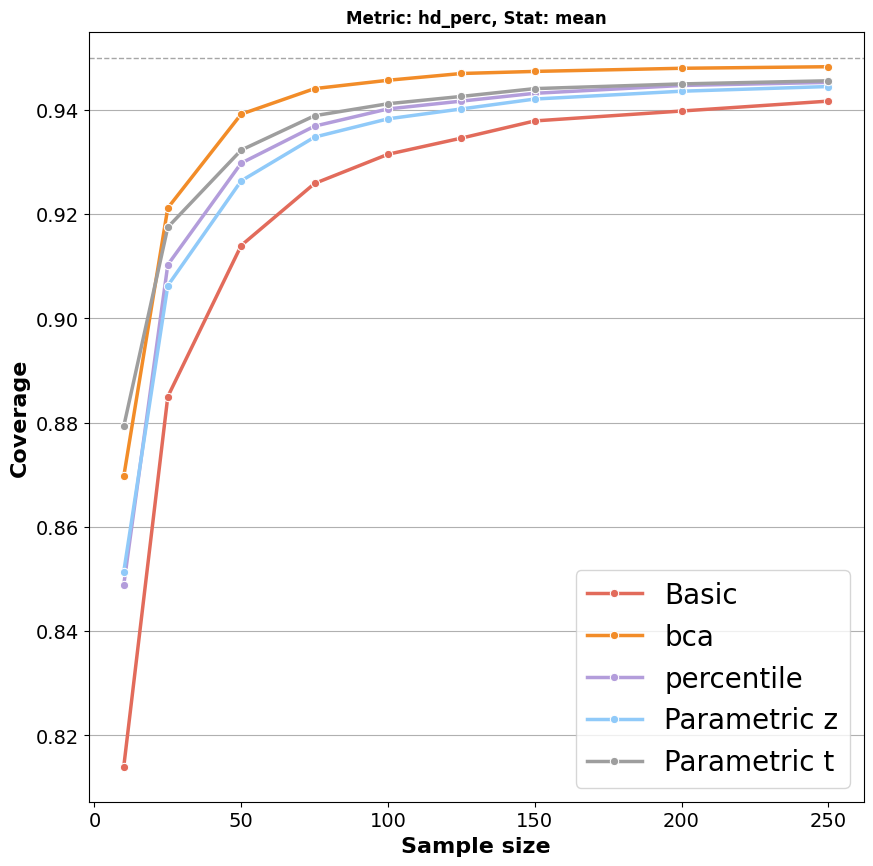

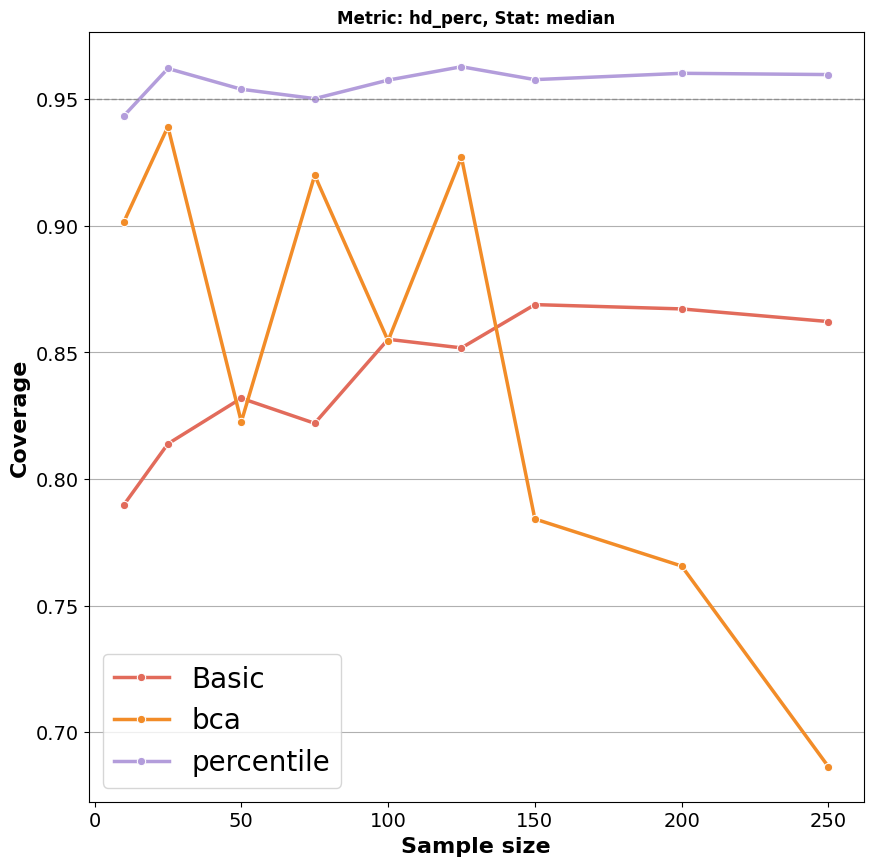

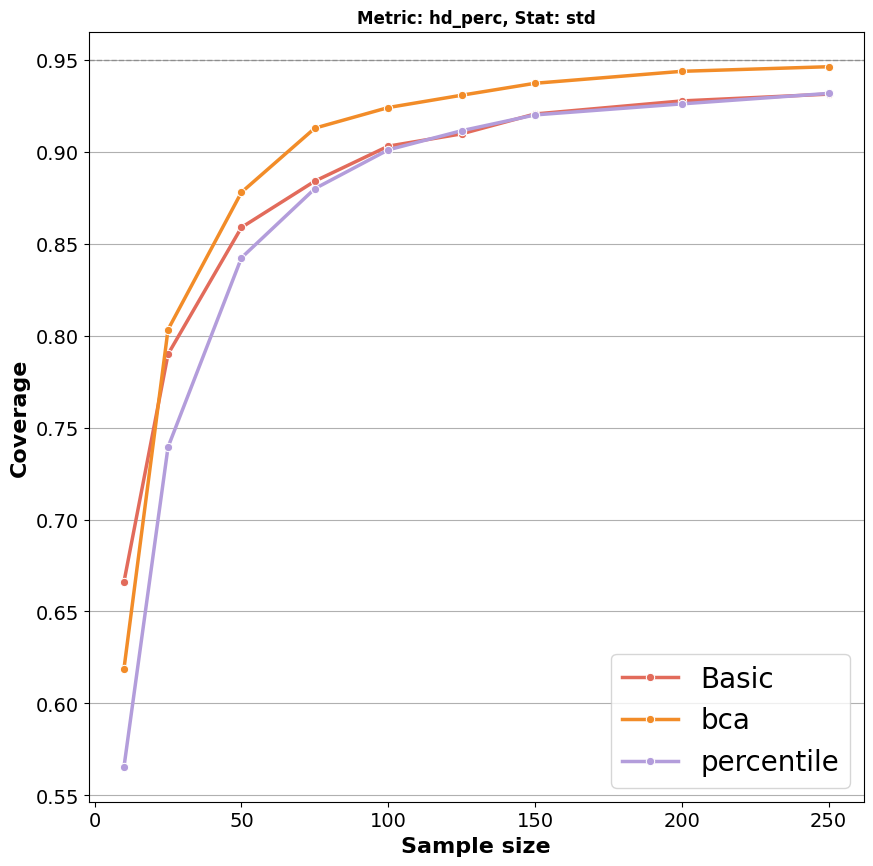

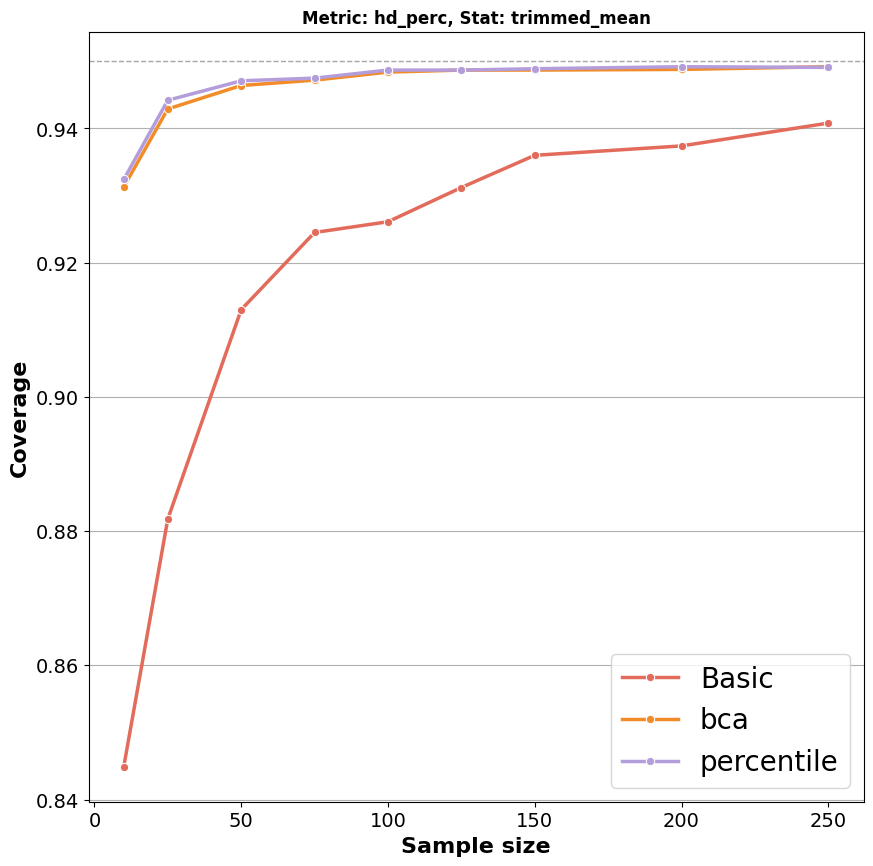

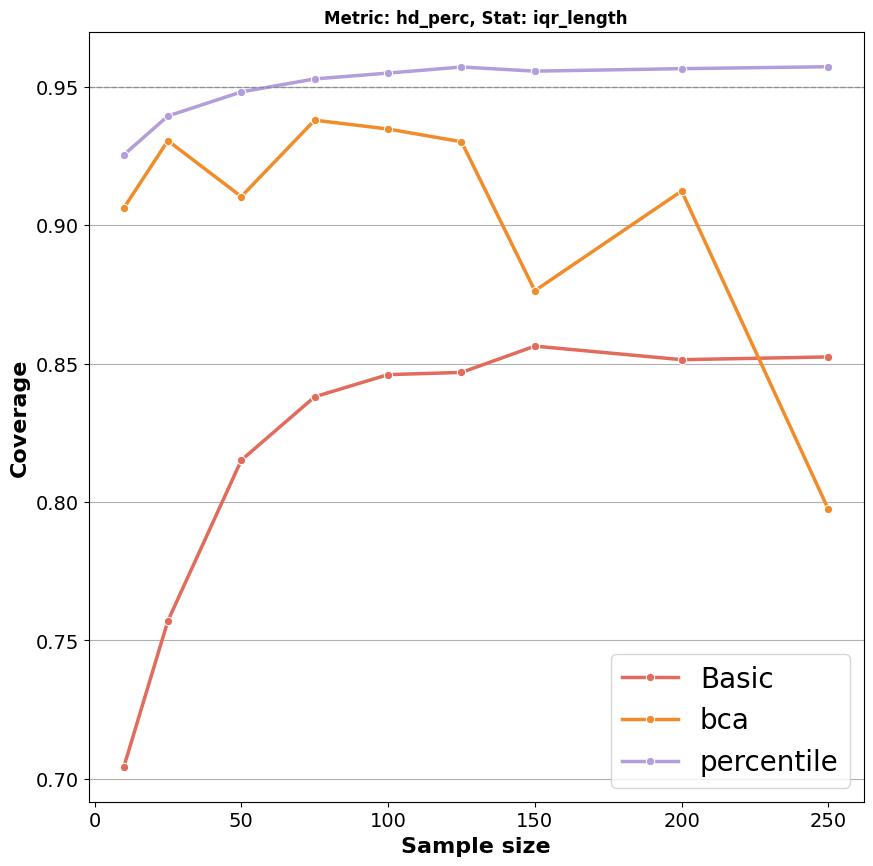

In [40]:

method_colors = {
    'Basic': '#e26b5b',
    'percentile': '#b39ddb',
    'bca': '#f28c28',
    'Parametric t': '#9e9e9e',
    'Parametric z': '#90caf9'
}

metrics = CI_segm['metric'].unique()
stats=CI_segm['stat'].unique()
for metric in metrics:
    df_metric=CI_segm[CI_segm['metric']==metric]
    for stat in stats: 
        df_stat=df_metric[df_metric['stat']==stat]
        fig, ax = plt.subplots(1, 1, figsize=(10, 10), sharey=True)

        sns.lineplot(
            data=df_stat,
            x='n', y='median', hue='method',
            marker='o', palette=method_colors, ax=ax, linewidth=2.5, errorbar=None
        )

        ax.axhline(0.95, linestyle='--', color='gray', linewidth=1, alpha=0.7)
        ax.set_title(f'Metric: {metric}, Stat: {stat}', weight='bold')
        ax.set_xlabel('Sample size',weight='bold', fontsize=16)
        ax.set_ylabel('Coverage', weight='bold', fontsize=16)
        ax.tick_params(axis='y', labelsize=14)
        ax.tick_params(axis='x', labelsize=14)

        ax.grid(True, axis='y')

        ax.legend(prop={'weight':'bold'}, fontsize= 20)
        plt.legend(fontsize= 20)

        plt.savefig(f"../../journal paper plots/segmentation/message 1 basic/fail_basic_{metric}_{stat}.pdf") # leave room for suptitle
        #plt.show()


### Same for classification micro

In [41]:
means_micro_df

n method    metric   median  lower_bound  upper_bound  median_width  \
0     10.0  Basic  accuracy  0.85480      0.84950      0.86200      0.553690   
1     10.0  Basic        ap  0.78735      0.77195      0.81480      0.399763   
2     10.0  Basic       auc  0.81310      0.80810      0.84360      0.476803   
3     10.0  Basic  f1_score  0.85495      0.84830      0.86480      0.551636   
4     10.0    bca  accuracy  0.88075      0.87585      0.88795      0.541235   
..     ...    ...       ...      ...          ...          ...           ...   
247  250.0  exact  f1_score      NaN          NaN          NaN           NaN   
248  250.0   wald  accuracy  0.94650      0.94620      0.94700      0.118202   
249  250.0   wald        ap      NaN          NaN          NaN           NaN   
250  250.0   wald       auc      NaN          NaN          NaN           NaN   
251  250.0   wald  f1_score      NaN          NaN          NaN           NaN   

     lower_bound_width  upper_bound_width           Aggregation  
0             0.537267           0.564649  Classification micro  
1             0.371372           0.438285  Classification micro  
2             0.460222           0.560102  Classification micro  
3             0.535793           0.565214  Classification micro  
4             0.519960           0.559320  Classification micro  
..                 ...                ...                   ...  
247                NaN                NaN  Classification micro  
248           0.115326           0.120255  Classification micro  
249                NaN                NaN  Classification micro  
250                NaN                NaN  Classification micro  
251                NaN                NaN  Classification micro  

[252 rows x 10 columns]

         n method    metric   median  lower_bound  upper_bound  median_width  \
0     10.0  Basic  accuracy  0.85480      0.84950      0.86200      0.553690   
1     10.0  Basic        ap  0.78735      0.77195      0.81480      0.399763   
2     10.0  Basic       auc  0.81310      0.80810      0.84360      0.476803   
3     10.0  Basic  f1_score  0.85495      0.84830      0.86480      0.551636   
4     10.0    bca  accuracy  0.88075      0.87585      0.88795      0.541235   
..     ...    ...       ...      ...          ...          ...           ...   
247  250.0  exact  f1_score      NaN          NaN          NaN           NaN   
248  250.0   wald  accuracy  0.94650      0.94620      0.94700      0.118202   
249  250.0   wald        ap      NaN          NaN          NaN           NaN   
250  250.0   wald       auc      NaN          NaN          NaN           NaN   
251  250.0   wald  f1_score      NaN          NaN          NaN           NaN   

     lower_bound_width  upper_bound_wid

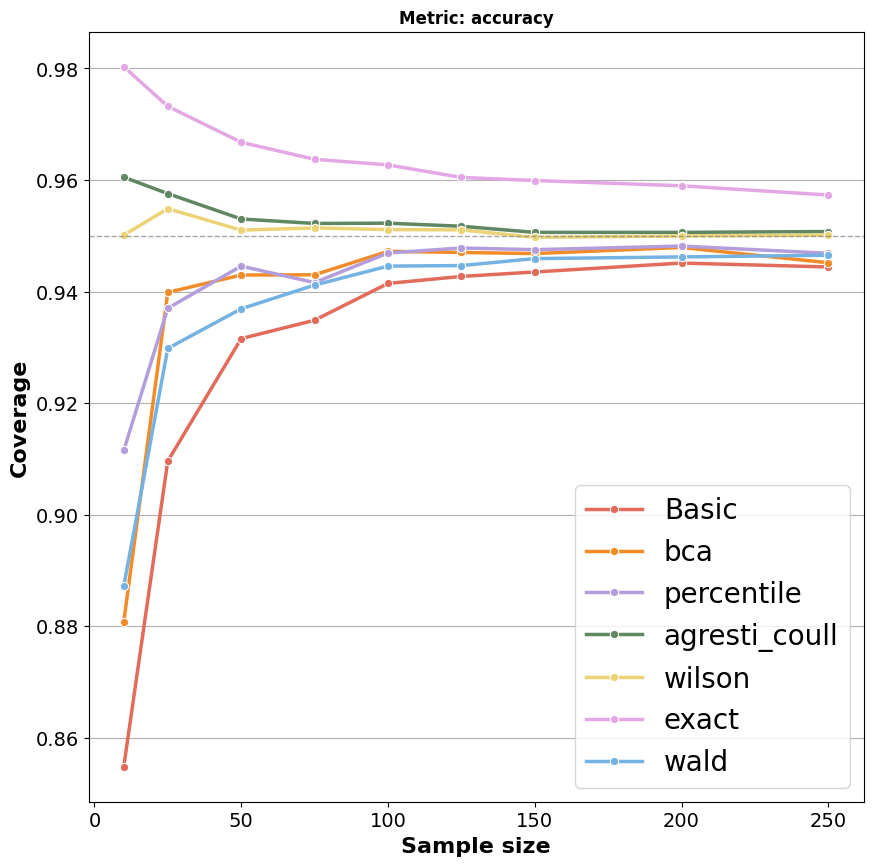

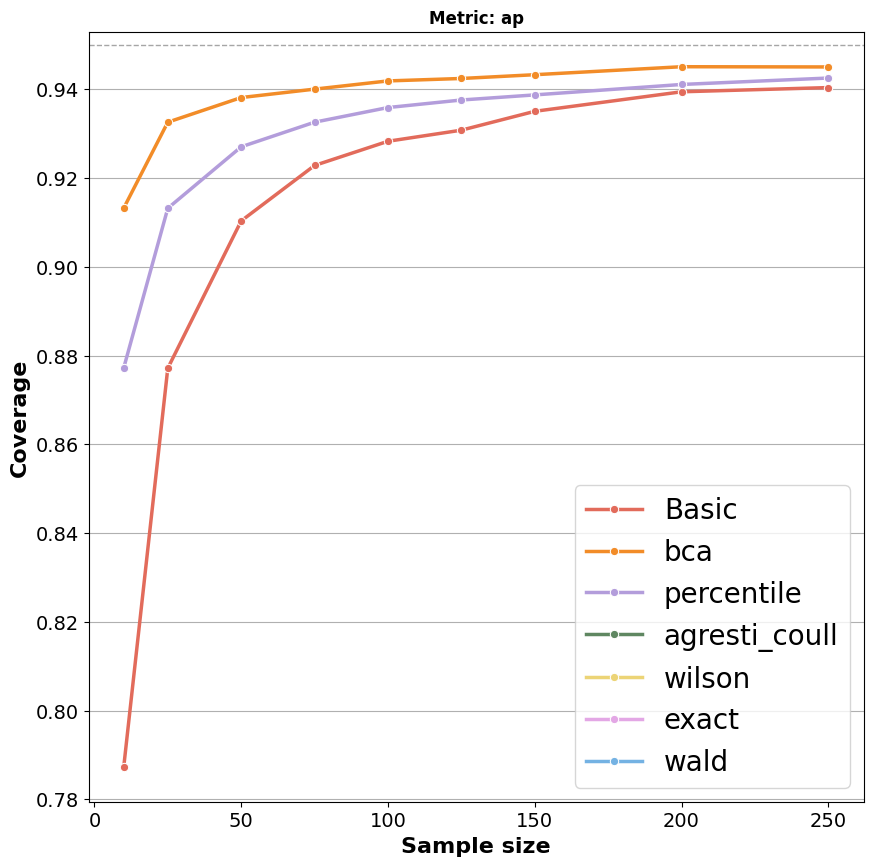

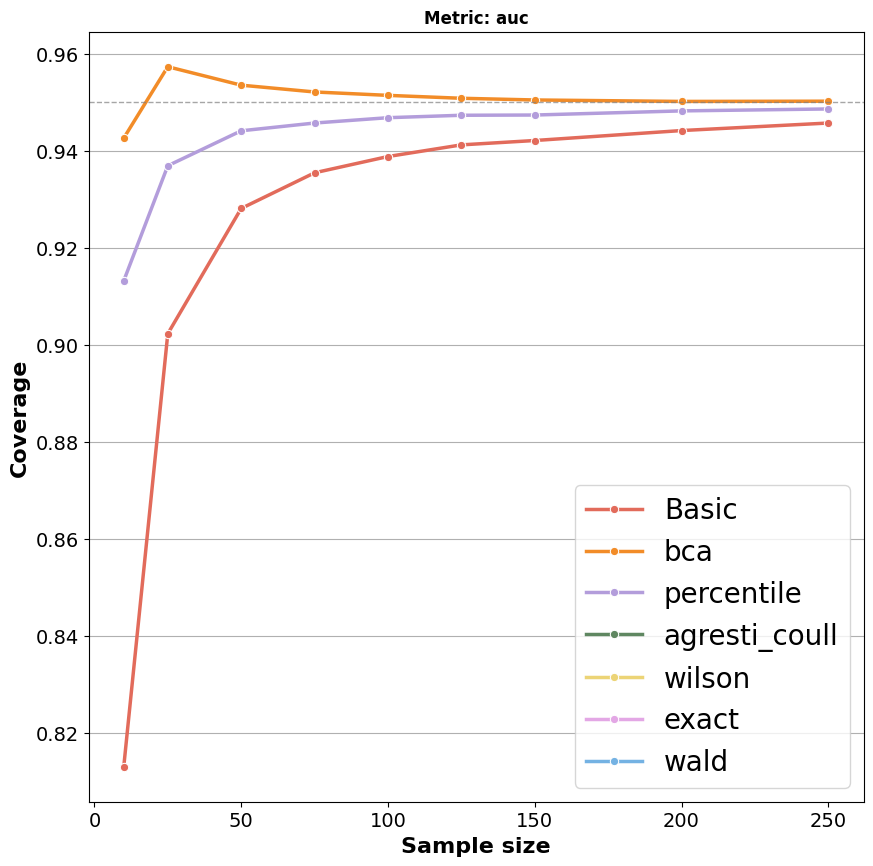

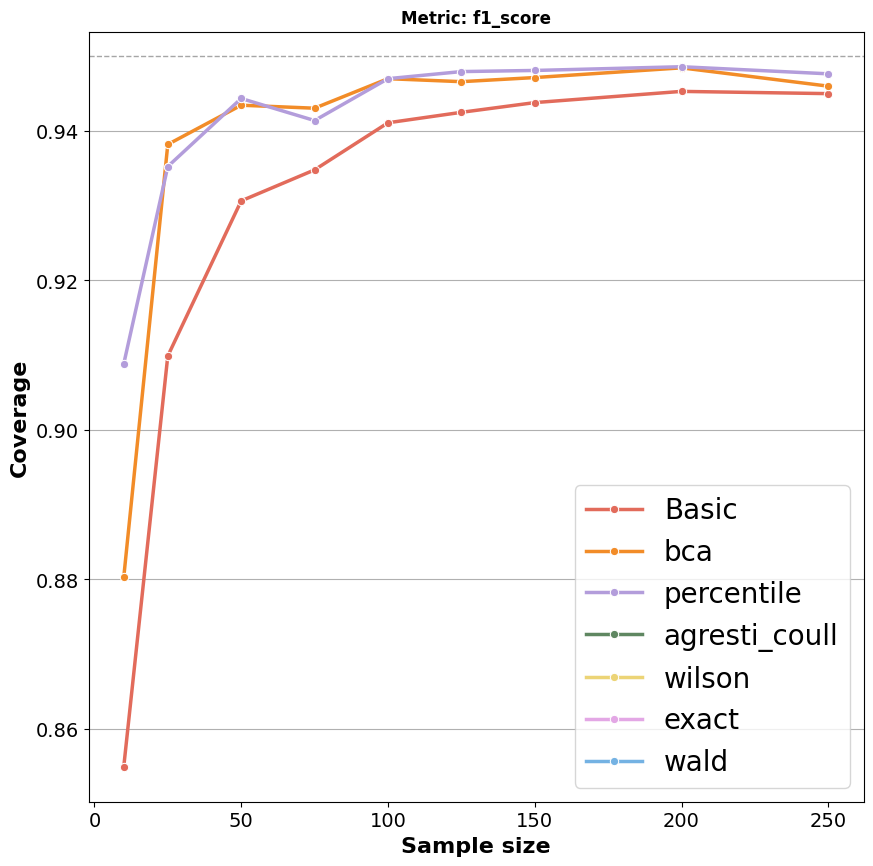

In [42]:

method_colors = {
    'Basic': '#e26b5b',
    'percentile': '#b39ddb',
    'bca': '#f28c28',
    'agresti_coull': "#5f8761",
    'wald': "#74b2e3",
    'wilson': "#ecd476", 
    'exact': "#e3a7e5",
    'delong':'#ffb3ba',
    'logit_transform':'#bae1ff',
}
metrics = means_micro_df['metric'].unique()
print(means_micro_df)
for metric in metrics:
    df_metric=means_micro_df[means_micro_df['metric']==metric]
    fig, ax = plt.subplots(1, 1, figsize=(10, 10), sharey=True)

    sns.lineplot(
        data=df_metric,
        x='n', y='median', hue='method',
        marker='o', palette=method_colors, ax=ax, linewidth=2.5, errorbar=None
    )

    ax.axhline(0.95, linestyle='--', color='gray', linewidth=1, alpha=0.7)
    ax.set_title(f'Metric: {metric}', weight='bold')
    ax.set_xlabel('Sample size',weight='bold', fontsize=16)
    ax.set_ylabel('Coverage', weight='bold', fontsize=16)
    ax.tick_params(axis='y', labelsize=14)
    ax.tick_params(axis='x', labelsize=14)

    ax.grid(True, axis='y')

    ax.legend(prop={'weight':'bold'}, fontsize= 20)
    plt.legend(fontsize= 20)

    plt.savefig(f"../../journal paper plots/classification/message 3 sample size/fail_basic_{metric}.pdf") # leave room for suptitle
    plt.show()


## Suppl dispersion stat 

### Plot median coverage of percentile method for mean and std, one plot by metric

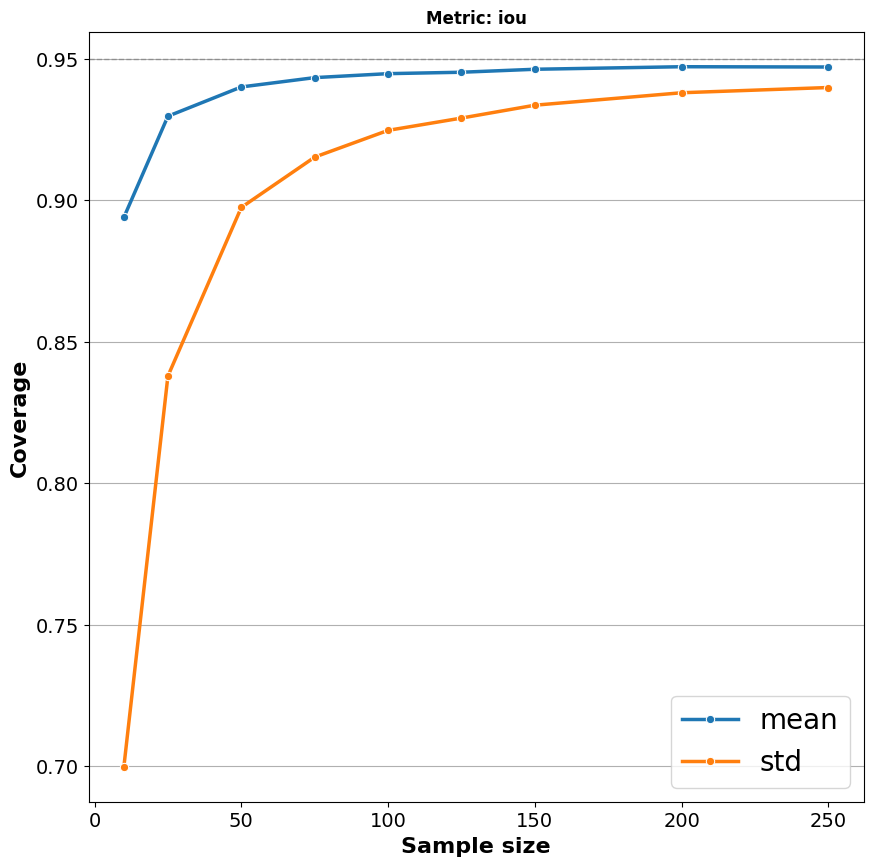

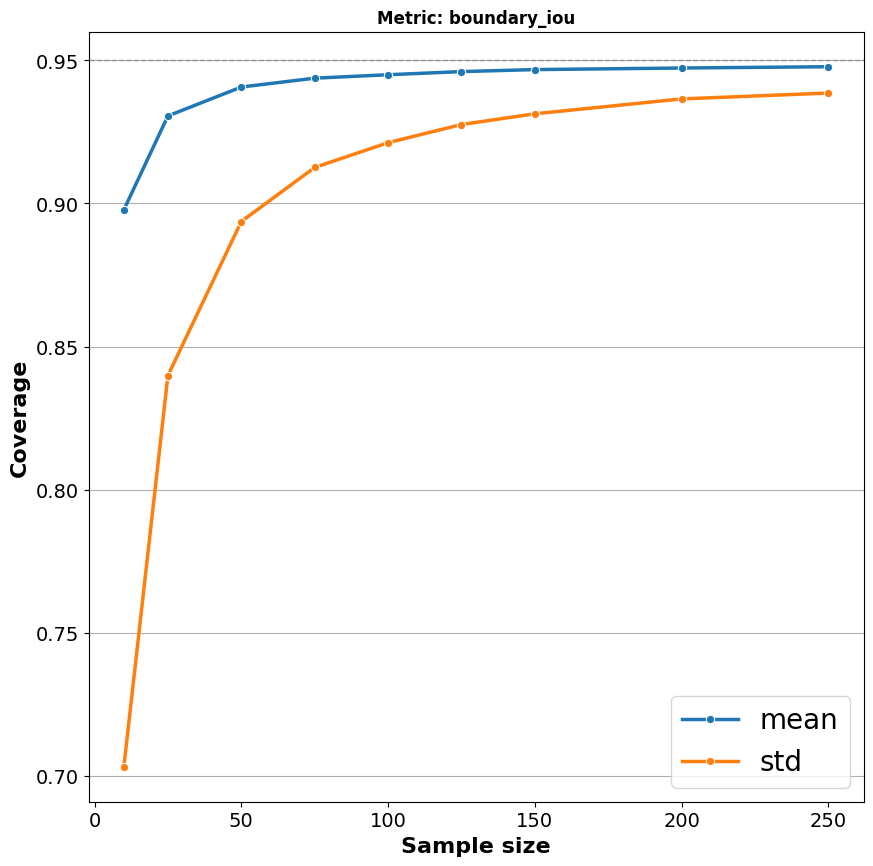

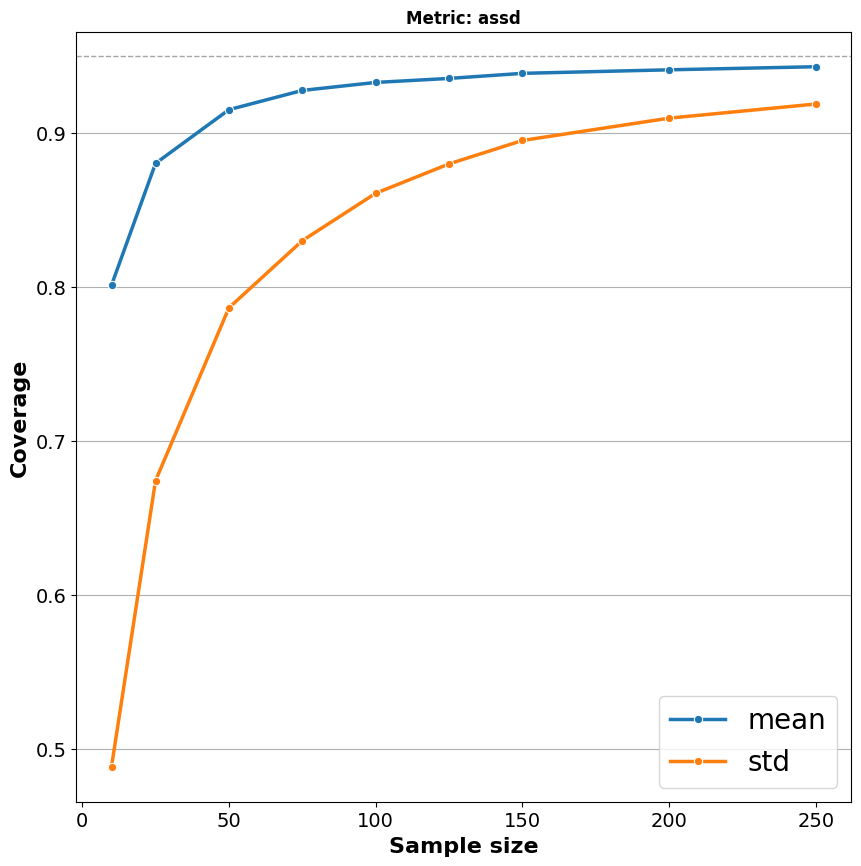

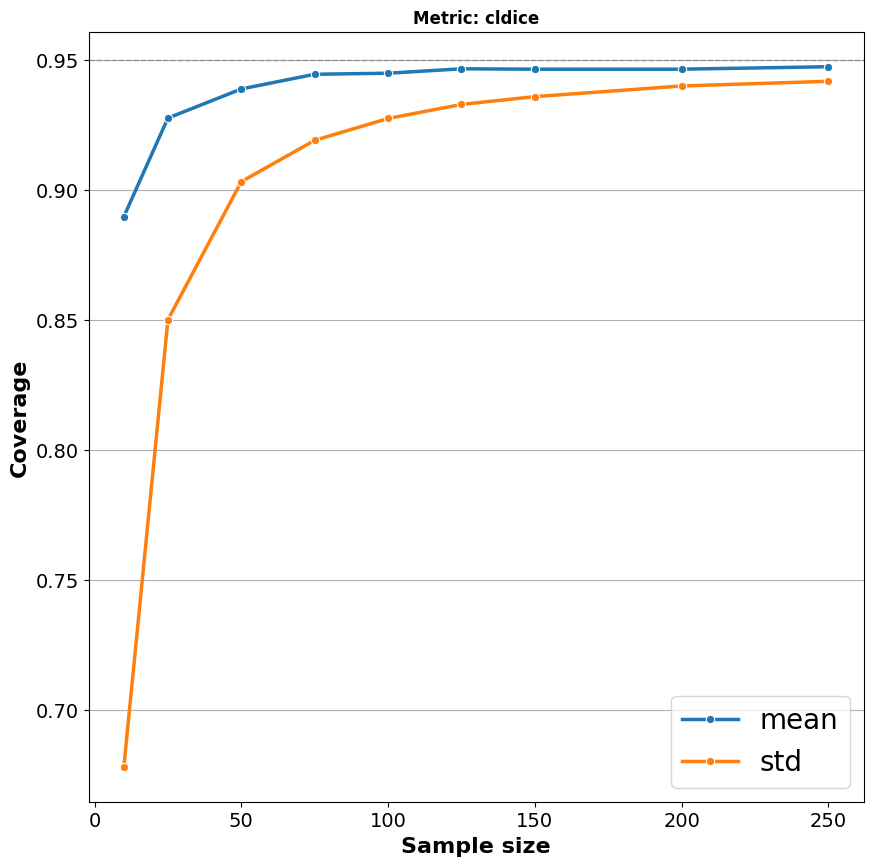

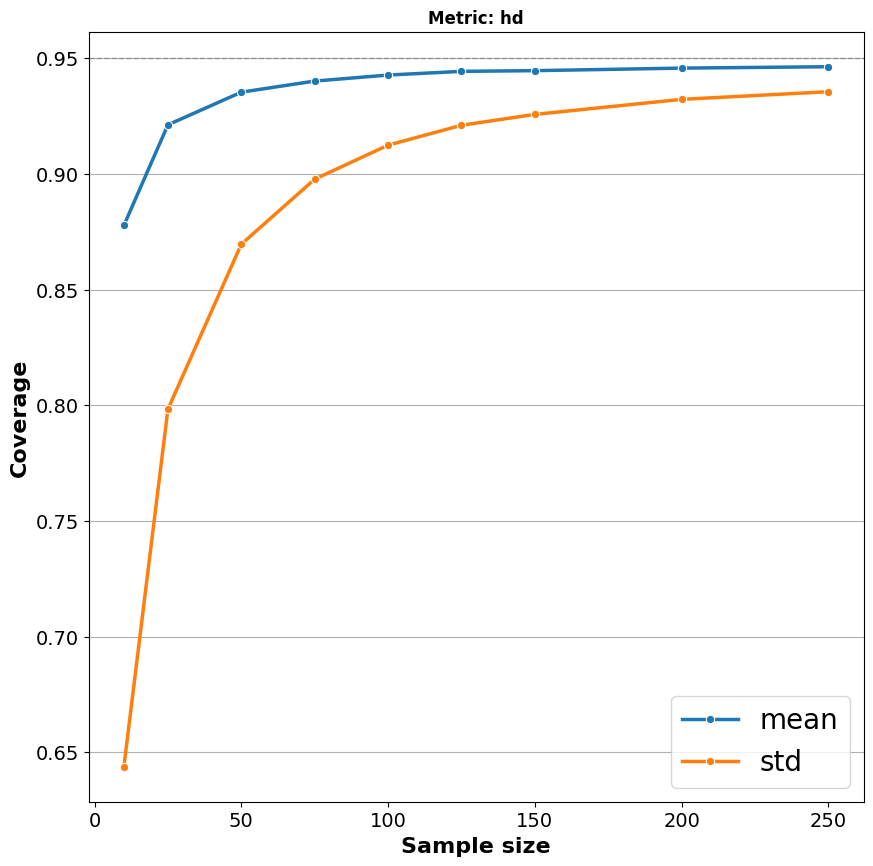

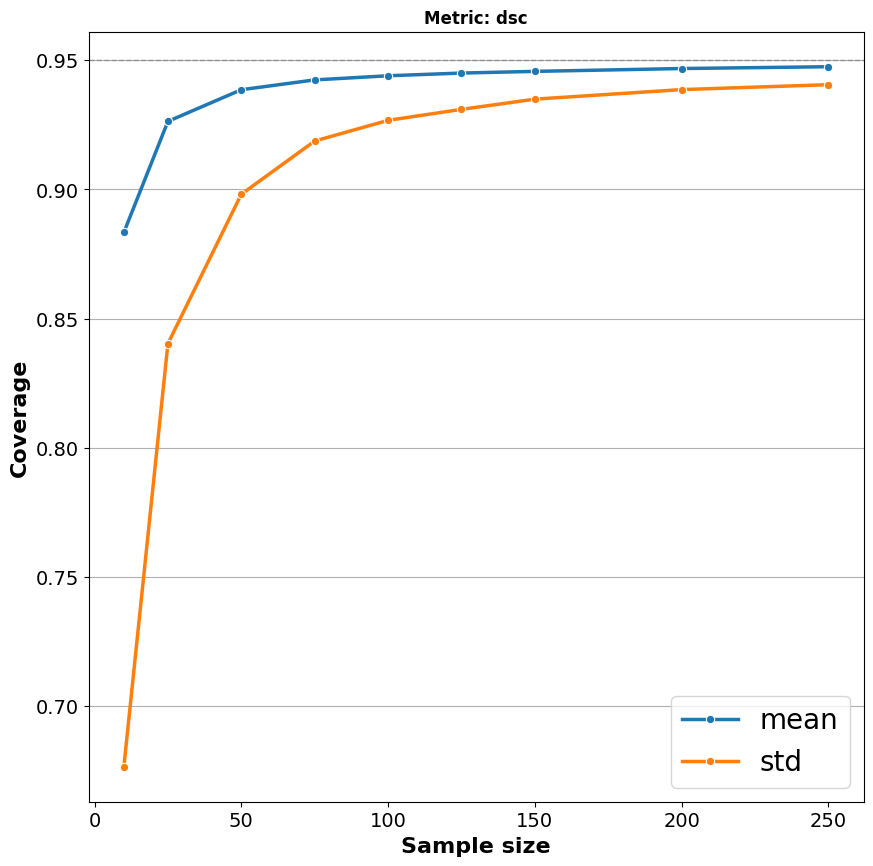

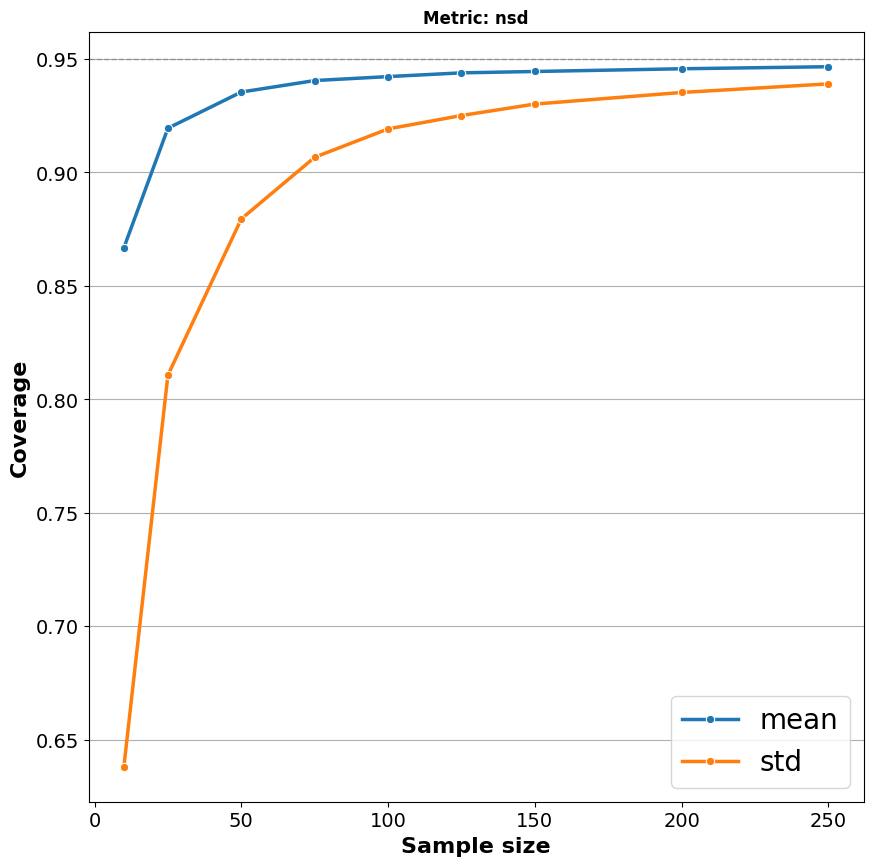

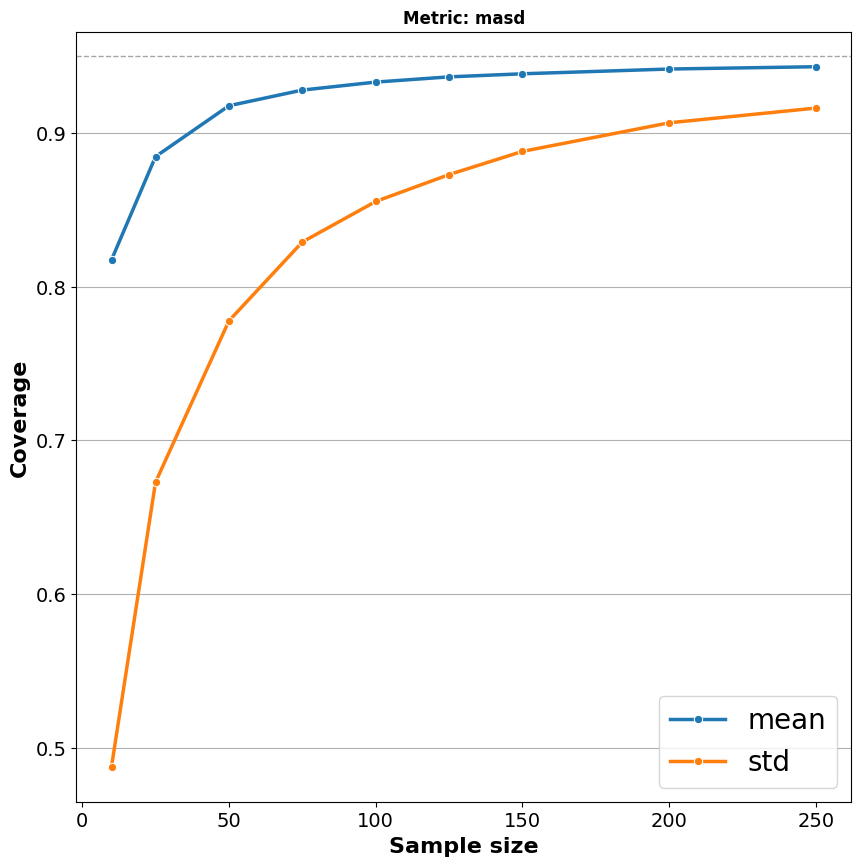

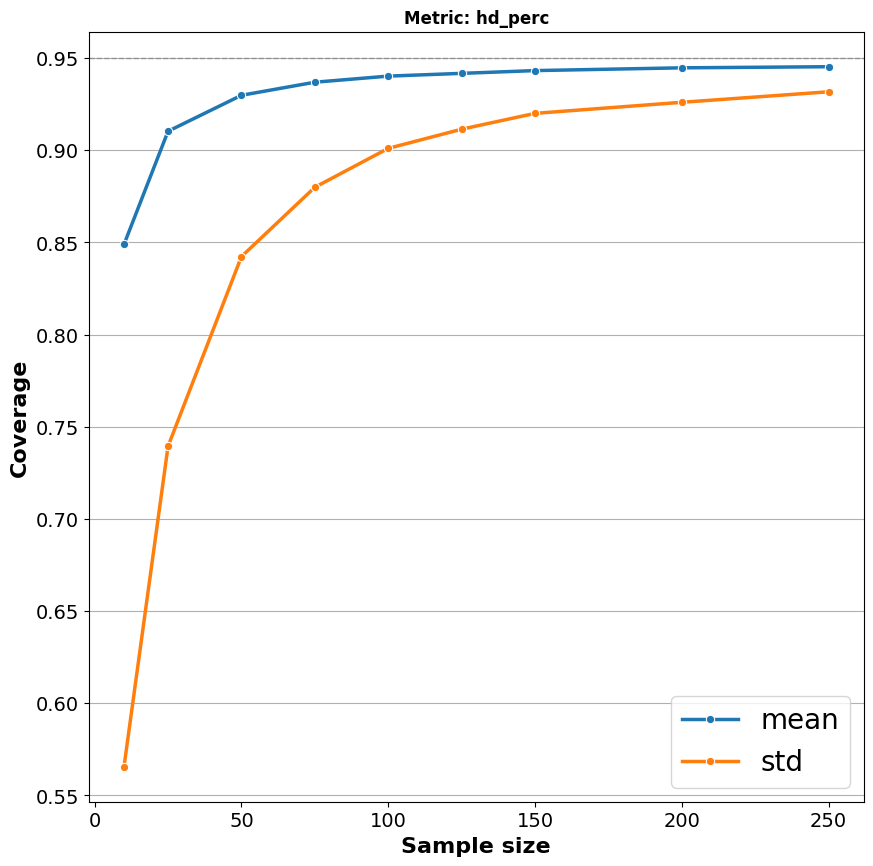

In [43]:


metrics = CI_segm['metric'].unique()
CI_segm_stat=CI_segm[CI_segm['stat'].isin(['mean', 'std'])]


for metric in metrics:
    df_all_metric=CI_segm_stat[CI_segm_stat['metric']==metric]
    data_method=df_all_metric[df_all_metric['method']=='percentile']
    fig, ax = plt.subplots(1, 1, figsize=(10, 10), sharey=True)


# central plot
    sns.lineplot(
        data=data_method,
        x='n', y='median',color='#b39ddb',
        marker='o', ax=ax, linewidth=2.5,  hue='stat', errorbar=None
    )

    ax.axhline(0.95, linestyle='--', color='gray', linewidth=1, alpha=0.7)
    ax.set_title(f'Metric: {metric}', weight='bold')
    ax.set_xlabel('Sample size',weight='bold', fontsize=16)
    ax.set_ylabel('Coverage', weight='bold', fontsize=16)
    ax.tick_params(axis='y', labelsize=14)
    ax.tick_params(axis='x', labelsize=14)

    ax.grid(True, axis='y')

    ax.legend(prop={'weight':'bold'}, fontsize= 20)
    plt.legend(fontsize= 20)

    plt.savefig(f"../../journal paper plots/segmentation/message 3 stats/fail_bca_{metric}.pdf") # leave room for suptitle
    plt.show()
